# <font color= "red"> **1 - ENTENDIMENTO DO NEGÓCIO**

📌 Descrição do Negócio

Este conjunto de dados de saúde foi construído com informações clínicas e demográficas de pacientes, com o objetivo de prever a probabilidade de ocorrência de Acidente Vascular Cerebral (AVC). Os registros incluem variáveis como idade, sexo, hipertensão, doenças cardíacas, tipo de trabalho, estilo de vida, entre outras.

---

🎯 Objetivo

Desenvolver um modelo preditivo que estime a probabilidade de um paciente sofrer um AVC, com base em variáveis clínicas e socioeconômicas. A intenção é auxiliar profissionais da saúde na identificação de grupos de risco para prevenção e priorização de atendimentos.

---

🧭 Contexto

O AVC é a segunda principal causa de morte no mundo, de acordo com a Organização Mundial da Saúde (OMS), sendo responsável por cerca de **11% de todas as mortes**.

A identificação precoce de indivíduos com maior risco de sofrer um AVC pode salvar vidas e reduzir os custos com internações e tratamentos.

Este conjunto de dados oferece registros de pacientes com atributos como idade, presença de hipertensão ou doença cardíaca, status de tabagismo, entre outros, possibilitando a construção de modelos que preveem a ocorrência de AVC.

Fonte: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

---

🔍 Causa Raiz do Problema

A ausência de ferramentas eficazes para prever riscos de AVC com base em características individuais dos pacientes dificulta a atuação preventiva por parte dos profissionais de saúde.

**Principais fatores associados:**
- Envelhecimento da população
- Hábitos de vida inadequados (tabagismo, sedentarismo)
- Doenças crônicas (hipertensão, diabetes)

---

👥 Stakeholders

- Profissionais e instituições da área da saúde (hospitais, clínicas, postos de saúde)
- Pacientes e a população em geral
- Secretarias e Ministérios da Saúde
- Gestores de planos de saúde e seguradoras
- Equipe de ciência de dados e tecnologia da informação

---

💡 Formato da Solução

**🔹 Granularidade:**  
Cada linha representa um paciente com características clínicas e demográficas.

**🔹 Tipo do Problema:**  
Classificação binária (1 = sofreu AVC, 0 = não sofreu AVC)

**🔹 Métodos Recomendados:**
- Regressão Logística  
- Árvores de Decisão  
- Random Forest  
- XGBoost  
- LightGBM  
- Redes Neurais  
- Técnicas de balanceamento como SMOTE (se necessário)

**🔹 Formato da Entrega:**
- Modelo preditivo treinado e validado  
- Relatório técnico (EDA, métricas, variáveis importantes)  
- Possível integração via API ou dashboard para uso clínico

---

🧱 Planejamento da Solução

O planejamento da solução para este projeto se baseia no método **CRISP-DM (Cross Industry Standard Process for Data Mining)**, que é uma metodologia cíclica e flexível voltada para a resolução de problemas que envolvem grande volume de dados. O CRISP-DM permite uma **entrega rápida de valor para os times de negócio** e é composto pelas seguintes etapas:

1. Compreensão do negócio  
2. Compreensão dos dados  
3. Preparação dos dados  
4. Modelagem  
5. Avaliação  
6. Implantação

Essa abordagem assegura uma estrutura clara para desenvolver soluções analíticas de maneira iterativa e orientada ao negócio.

---

📝 Resumo

Este projeto visa desenvolver um modelo de machine learning capaz de prever a probabilidade de um paciente sofrer um AVC, com base em dados clínicos e demográficos. A abordagem usa algoritmos de classificação para identificar grupos de risco e apoiar decisões médicas preventivas.

Dada a alta mortalidade do AVC, a solução proposta pode gerar grande impacto na área da saúde, ajudando a salvar vidas e otimizar recursos hospitalares.

---


# <font color="RED"> **2 - COLETA DOS DADOS**

## <font color='blue'> PASSO 0.0 - Biblioteca

In [1]:
# Biblioteca para medir tempo de execução de um trecho de código
import time
# Biblioteca para realizar interações com o sistema operacional
import os
# Biblioteca para manipulação de dados em formato de tabela
import pandas            as pd
# Biblioteca para trabalhar com arrays multidimensionais e realizar operações matemáticas
import numpy             as np
# Biblioteca para visualização de gráficos estáticos
import matplotlib.pyplot as plt
# Biblioteca para visualização de gráficos estáticos e dinâmicos mais elaborados
import seaborn           as sns
# Biblioteca para visualização de gráficos dinâmicos mais elaborados
import plotly.express    as px
# Biblioteca para ignorar avisos e alertas indesejados
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from scipy.stats import pearsonr
# Biblioteca para salvar modelos treinados em disco
import joblib

# Confiração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Biblioteca para realizar balanceamento de classes em dados desbalanceados
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Biblioteca para funções estatísticas
from scipy                   import stats              as ss

# Biblioteca para detecção de anomalias em dados
from pyod.models.knn         import KNN

# Biblioteca com diversas funções de aprendizado de máquina
from xgboost          import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost  as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from scipy.stats             import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Bibliotecas utilizadas na Avaliação das Máquinas
from sklearn.metrics         import classification_report
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import f1_score
from sklearn.metrics         import precision_score
from sklearn.metrics         import recall_score
#from yellowbrick.classifier  import ConfusionMatrix

# Biblioteca para seleção de variáveis mais importantes
from sklearn.ensemble          import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, mutual_info_classif

## <font color='blue'> PASSO 0.1 - Carregando dos dados

In [2]:
df = pd.read_csv("archive/healthcare-dataset-stroke-data.csv")

## <font color="blue"> PASSO 0.2 - FUNÇÕES AUXILIARES

In [3]:
# Criar pasta se não existir
os.makedirs('Imagens', exist_ok=True)

In [4]:
def show_null (df):
    # percentual de valores nulos
    null_col = (df.isnull().sum(axis=0) / len(df)).sort_values(ascending=False).index
    # DataFrame que contém valores nulos
    null_data = pd.concat([df.isnull().sum(axis=0), # QTD
                          (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False), # % null
                           df.nunique(), # Valores únicos
                           df.loc[:,df.columns.isin(list(null_col))].dtypes],axis=1) # seleciona apenas as colunas que contêm valores nulos
    null_data = null_data.rename(columns={0: 'QTD',
                                          1: '% null',
                                          2: 'Unique Values',
                                          3: 'Type'})
    
    return null_data

In [5]:
# Criando um detector de outliers

def outliers_test(data):
    n_cols = data.shape[1]
    for col in range(n_cols):
        x = data.iloc[:, col]
        
        n = len(x)
        mean_x = np.mean(x)
        sd_x = np.std(x)
        
        if sd_x == 0:
            print(f'A coluna {col + 1} não pode ser testada, pois a variância é zero.')
            continue
        
        numerator = max(abs(x - mean_x))
        g_calculated = numerator/sd_x
        print(f'Grubbs Valor Calculado - Coluna {col + 1}: {g_calculated}')
        
        t_value = ss.t.ppf(1 - 0.05 / (2 * n), n - 2)
        g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
        print(f'Grubbs Valor Crítico - Coluna {col + 1}: {g_critical}')
        
        if g_critical > g_calculated:
            print(f'Para a variável X na coluna {col + 1}, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers')
        else:
            print(f'Para a variável X na coluna {col + 1}, observamos que o valor calculado é Maior que o valor Crítico. Confirmamos a hipótese de que há outliers')

In [6]:
# Gráfico de barra

def plot_barra (df, df_x, df_y, title, subtitulo, porcentagem=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # Para que o título não fique cortado na figura.
    plt.subplots_adjust(top=0.9)
    
    # Defina o título do gráfico - CORRIGIDO
    plt.suptitle(title, fontsize=15, x=0.02, horizontalalignment='left')
    
    # Adicione o subtítulo ao gráfico - CORRIGIDO
    plt.title(subtitulo, fontsize=11, fontstyle="italic", loc="left", color="gray", x=0.02)
    
    # Crie o gráfico de barras
    plt.bar(df_x, df_y, color='blue')
    
    # Adicione rótulos nas barras - versão mais robusta
    for i, (x, y) in enumerate(zip(df_x, df_y)):
        if porcentagem:
            plt.text(i, y + max(df_y) * 0.01, f'{y:.1f}%', ha='center', fontsize=10)
        else:
            plt.text(i, y + max(df_y) * 0.01, str(y), ha='center', fontsize=10)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks([])
    plt.grid(False)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.savefig(f'Imagens/{title}.png', bbox_inches='tight')
    
    plt.show()

In [7]:
# Gráfico de linha

def plot_linha(df, df_x, df_y, title, subtitulo, 
               porcentagem=True, color="steelblue", figsize=(10, 6)):
    
    # Criar a figura
    plt.figure(figsize=figsize)
    
    # Para que o título não fique cortado na figura
    plt.subplots_adjust(top=0.9)
    
    # Título principal
    plt.suptitle(title, fontsize=15, x=0.02, horizontalalignment='left')
    
    # Subtítulo
    plt.title(subtitulo, fontsize=11, fontstyle="italic", loc="left", color="gray", x=0.02)
    
    # Criar o gráfico de linha
    plt.plot(df_x, df_y, marker='o', linewidth=3, markersize=8, color=color)
    
    # Adicionar rótulos nos pontos
    for i, (x, y) in enumerate(zip(df_x, df_y)):
        if porcentagem:
            label = f"{y:.1f}%"
        else:
            label = f"{int(y)}"
        
        plt.annotate(label, 
                    (x, y), 
                    textcoords="offset points", 
                    xytext=(0, 10), 
                    ha='center', 
                    fontsize=11, 
                    fontweight='bold',
                    color='black')
    
    # Configurações do gráfico
    plt.xticks(fontsize=12, rotation=45 if len(df_x) > 4 else 0)
    plt.yticks(fontsize=11)
    plt.ylabel("")
    plt.xlabel("")
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Remover bordas superiores e direitas
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Ajustar margens para melhor visualização
    plt.margins(x=0.05, y=0.1)
    
    # Salvar o gráfico
    plt.savefig(f'Imagens/{title}.png', bbox_inches='tight')
    
    # Mostrar o gráfico
    plt.show()

In [8]:
# Gráfico de barras agrupadas

def plot_barra_agrupada(df, x_col, hue_col, title, subtitulo, 
                        show_legend=True, legend_labels=None,
                        rate_labels=None, x_labels=None, palette="Set2", figsize=(10, 6)):
        
    # Criar a figura
    plt.figure(figsize=figsize)
    
    # Para que o título não fique cortado na figura
    plt.subplots_adjust(top=0.9)
    
    # Título principal
    plt.suptitle(title, fontsize=15, x=0.02, horizontalalignment='left')
    
    # Subtítulo
    plt.title(subtitulo, fontsize=11, fontstyle="italic", loc="left", color="gray", x=0.02)
    
    # Calcular proporções de AVC para cada grupo
    prop_avc = df.groupby(x_col)[hue_col].mean() * 100
    
    # Criar o gráfico de barras agrupadas
    plot = sns.countplot(x=x_col, hue=hue_col, data=df, palette=palette)
    
    # Personalizar labels do eixo X se fornecidos
    if x_labels:
        # Obter os valores únicos de x_col na ordem em que aparecem no gráfico
        x_values = sorted(df[x_col].unique())
        
        # Verificar se o número de labels corresponde ao número de valores únicos
        if len(x_labels) == len(x_values):
            # Usar plt.xticks() para definir tanto as posições quanto os labels
            tick_positions = range(len(x_values))
            plt.xticks(ticks=tick_positions, labels=x_labels)
    
    # Adicionar rótulos nas barras (apenas se a altura for maior que 0)
    for i in plot.patches:
        height = int(i.get_height())
        if height > 0:  # Só adiciona rótulo se a barra tiver altura
            plot.annotate(height, # Texto (convertido para inteiro)
                          (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                          ha='center', va='baseline', fontsize=10,
                          color='black', xytext=(0, 5),
                          textcoords='offset points')
    
    # Configurações do gráfico
    plt.yticks([])  # Remove ticks do eixo Y
    
    # Personalizar a legenda (se solicitado)
    if show_legend:
        handles, labels = plot.get_legend_handles_labels()
        
        # Usar labels personalizados se fornecidos, senão usar padrão
        if legend_labels:
            new_labels = legend_labels
        else:
            new_labels = ['Sem AVC' if label == '0' else 'Com AVC' for label in labels]
        
        plt.legend(handles, new_labels, facecolor="white", fontsize=12, loc='upper right')
    else:
        # Remove a legenda se show_legend for False
        plot.get_legend().remove()
    
    plt.xticks(fontsize=12)
    plt.ylabel("")
    plt.xlabel("")
    plt.grid(False)
    
    # Remover bordas
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Adicionar texto com as taxas de AVC no gráfico (se rate_labels fornecidos)
    if rate_labels and len(rate_labels) >= 2:
        # Obter os valores únicos de x_col na ordem em que aparecem
        x_values = df[x_col].unique()
        
        # Posicionar o texto no canto superior direito, abaixo da legenda
        plt.text(0.98, 0.75, f"{rate_labels[0]} {prop_avc[x_values[0]]:.1f}%", 
                 transform=plt.gca().transAxes, fontsize=10, ha='right',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
        
        plt.text(0.98, 0.68, f"{rate_labels[1]} {prop_avc[x_values[1]]:.1f}%", 
                 transform=plt.gca().transAxes, fontsize=10, ha='right',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    
    # Salvar o gráfico
    plt.savefig(f'Imagens/{title}.png', bbox_inches='tight')
    
    # Mostrar o gráfico
    plt.show()

# <font color='red'> **3 - LIMPEZA DOS DADOS**

## <font color='blue'> PASSO 3 - Análise Descritiva dos Dados

### <font color='#F37126'> 1.1. Leitura dos dados

In [9]:
# Importar e visualizar a base de dados
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Dicionário de Variáveis:**

- id → identificador: Identificador único de cada paciente no dataset
- gender → sexo: Sexo do paciente ("Male" = Masculino, "Female" = Feminino ou "Other" = Outro)
- age → idade: Idade do paciente em anos
- hypertension → hipertensão: Indica se o paciente tem hipertensão (0 = não tem, 1 = tem hipertensão)
- heart_disease → doença_cardíaca: Indica se o paciente tem alguma doença do coração (0 = não tem, 1 = tem doença cardíaca)
- ever_married → já_casou: Indica se o paciente já foi casado alguma vez ("No" = Não, "Yes" = Sim)
- work_type → tipo_trabalho: Tipo de trabalho do paciente:

    - "children" = crianças
    - "Govt_job" = funcionário público
    - "Never_worked" = nunca trabalhou
    - "Private" = setor privado
- "Self-employed" = autônomo

- Residence_type → tipo_residência: Tipo de área onde reside ("Rural" = Rural, "Urban" = Urbana)
- avg_glucose_level → nível_glicose_médio: Nível médio de glicose no sangue
- bmi → imc: Índice de Massa Corporal (peso/altura²)
- smoking_status → status_tabagismo: Status em relação ao tabagismo:

    - "formerly smoked" = ex-fumante
    - "never smoked" = nunca fumou
    - "smokes" = fumante atual
    - "Unknown" = informação não disponível

- stroke → avc: Variável alvo - indica se o paciente teve AVC (0 = não teve, 1 = teve AVC)

### <font color='#F37126'> 1.2. Colunas

In [10]:
# Visualizando cabeçalho do dataframe
print(df.columns.to_list())

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


### <font color='#F37126'> 1.3. Dimensões de dados

In [11]:
# Verificando informações sobre o dataframe: linhas e colunas
df.shape

(5110, 12)

In [12]:
# Verificando informações sobre o dataframe: tipo, valores nulos e valores únicos
show_null(df)

,QTD,% null,Unique Values,Type
id,0,0.000000,5110,int64
gender,0,0.000000,3,object
age,0,0.000000,104,float64
hypertension,0,0.000000,2,int64
heart_disease,0,0.000000,2,int64
ever_married,0,0.000000,2,object
work_type,0,0.000000,5,object
Residence_type,0,0.000000,2,object
avg_glucose_level,0,0.000000,3979,float64
bmi,201,0.039335,418,float64


**Qualidade dos Dados:**

- O dataset tem 5.110 registros únicos (baseado nos IDs)
- Apenas a variável bmi tem valores missing (201 casos, ~3,9%), todas as outras estão completas
- Boa qualidade geral dos dados com baixo percentual de valores ausentes

**Características das Variáveis:**

- Idade: 104 valores únicos sugerem boa distribuição etária (provavelmente de 0 a 103+ anos)
- Glicose: 3.979 valores únicos indicam medições contínuas precisas
- IMC: 418 valores únicos mostram boa variabilidade, mas precisa tratar os 201 valores ausentes

**Distribuições Categóricas:**

- Gênero: 3 categorias (Male, Female, Other) - verificar se "Other" tem representação adequada
- Variáveis binárias (hipertensão, doença cardíaca, casamento, residência, AVC): distribuição a ser analisada
- Tipo de trabalho: 5 categorias balanceadas para análise
- Tabagismo: 4 status diferentes incluindo "Unknown"

In [13]:
# Verificando informações sobre o dataframe: quantidade de colunas por tipo
df.dtypes.value_counts()

object     5
int64      4
float64    3
Name: count, dtype: int64

**Distribuição dos Tipos de Dados:**

- 5 variáveis categóricas (object): gender, ever_married, work_type, Residence_type, smoking_status
- 4 variáveis numéricas inteiras (int64): id, hypertension, heart_disease, stroke
- 3 variáveis numéricas contínuas (float64): age, avg_glucose_level, bmi

**Insights para Análise:**
- Variáveis Categóricas (5):

    - Precisarão de encoding (One-Hot ou Label Encoding) para modelos de ML
    - Ideais para análises de frequência e tabelas de contingência
    - Boas para análises de associação com a variável target (stroke)

- Variáveis Binárias (3):

    - hypertension, heart_disease, stroke são binárias (0/1)
    - Facilitam análises de correlação e odds ratio
    - Prontas para modelos de ML sem transformação

- Variáveis Contínuas (3):

    - age, avg_glucose_level, bmi permitem análises estatísticas robustas
    - Podem precisar de normalização/padronização para alguns algoritmos
    - Ideais para análises de distribuição, outliers e correlações

### <font color='#F37126'> 1.4. Check dados nulos

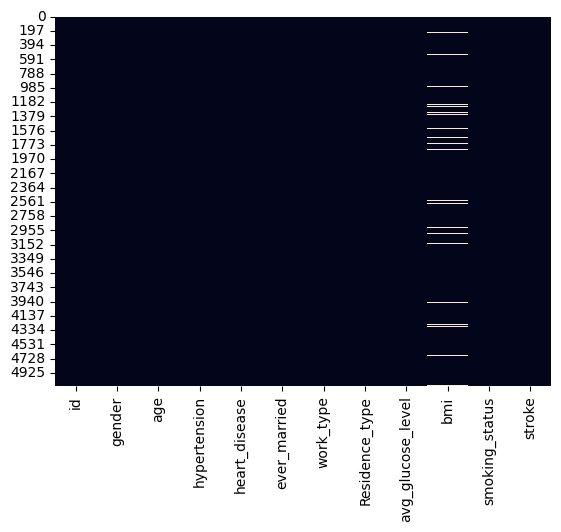

In [14]:
# Verificando os valores faltantes
sns.heatmap(df.isnull(),cbar=False);

In [15]:
# # Verificando a quantidade de valores faltantes
df.bmi.isnull().sum()

np.int64(201)

**Qualidade Geral dos Dados:**

- O dataset tem excelente qualidade - apenas uma variável com valores ausentes
- Das 12 variáveis, 11 estão 100% completas

**Problema Específico:**

- Apenas BMI apresenta valores ausentes (as linhas brancas horizontais no gráfico)
- Os valores ausentes do BMI aparecem distribuídos ao longo de todo o dataset (não concentrados em um período específico)
- Ausência aleatória: Os valores ausentes não seguem um padrão específico por ID

### <font color='#F37126'> 1.5. Estatística descritiva

#### Separando os tipos de variáveis

In [16]:
# Colunas númericas
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
# Colunas Categoricas
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### Colunas númericas

In [17]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

In [18]:
# dispersion - std, min, max, range, skew, kurtosis

# Desvio Padrão
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
# Mínimo
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
# Máximo
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
# Range
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
# Skew
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
# Kurtosis
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

In [19]:
# Juntando as metricas em uma tabela
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
# Colocando os nomes nas colunas
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,67.00,72940.00,72873.00,36517.829354,36932.000,21159.650905,-0.019913,-1.212368
1,age,0.08,82.00,81.92,43.226614,45.000,22.610434,-0.137059,-0.991010
2,hypertension,0.00,1.00,1.00,0.097456,0.000,0.296578,2.715392,5.375456
3,heart_disease,0.00,1.00,1.00,0.054012,0.000,0.226041,3.947244,13.586052
4,avg_glucose_level,55.12,271.74,216.62,106.147677,91.885,45.279129,1.572284,1.680479
5,bmi,10.30,97.60,87.30,28.893237,NaN,7.853267,1.055340,3.362659
6,stroke,0.00,1.00,1.00,0.048728,0.000,0.215299,4.193284,15.589736


In [20]:
# Visualizando a estatísticas descritivas
df.describe().round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


**Variável Target (Stroke):**

- Dataset muito desbalanceado: média de 0.05 indica que apenas ~5% dos pacientes tiveram AVC
- Problema de classificação desbalanceada que precisará de técnicas específicas (SMOTE, class weights, etc.)

**Características Demográficas:**

- Idade: Média de 43.2 anos, distribuição ampla (0.1 a 82 anos)
- 75% dos pacientes têm até 61 anos, sugerindo população relativamente jovem
- Boa representação etária para análise de risco por faixa etária

**Fatores de Risco Cardiovascular:**

- Hipertensão: ~10% dos pacientes (baixa prevalência)
- Doença cardíaca: ~5% dos pacientes (muito baixa)
- Glicose: Média 106.1 mg/dL (limite superior normal), variação grande (55.1 a 271.7)
- IMC: Média 28.9 (sobrepeso), com casos de obesidade severa (até 97.6)

**Insights Clínicos:**

- Níveis glicêmicos: 25% dos pacientes com glicose ≤77.2 (normal), mas alguns com valores muito altos
- Obesidade: 50% dos pacientes com IMC ≥28.1 (sobrepeso/obesidade)
- Fatores de risco baixos: Poucos pacientes com hipertensão/doença cardíaca pode indicar população jovem

**Implicações para Modelagem:**

- Balanceamento necessário para a variável stroke
- Outliers em glicose e IMC precisam de investigação
- Boas variáveis preditoras com distribuições adequadas
- Segmentação por idade pode ser interessante dado o range amplo

**O dataset parece representativo para análise de fatores de risco de AVC.**

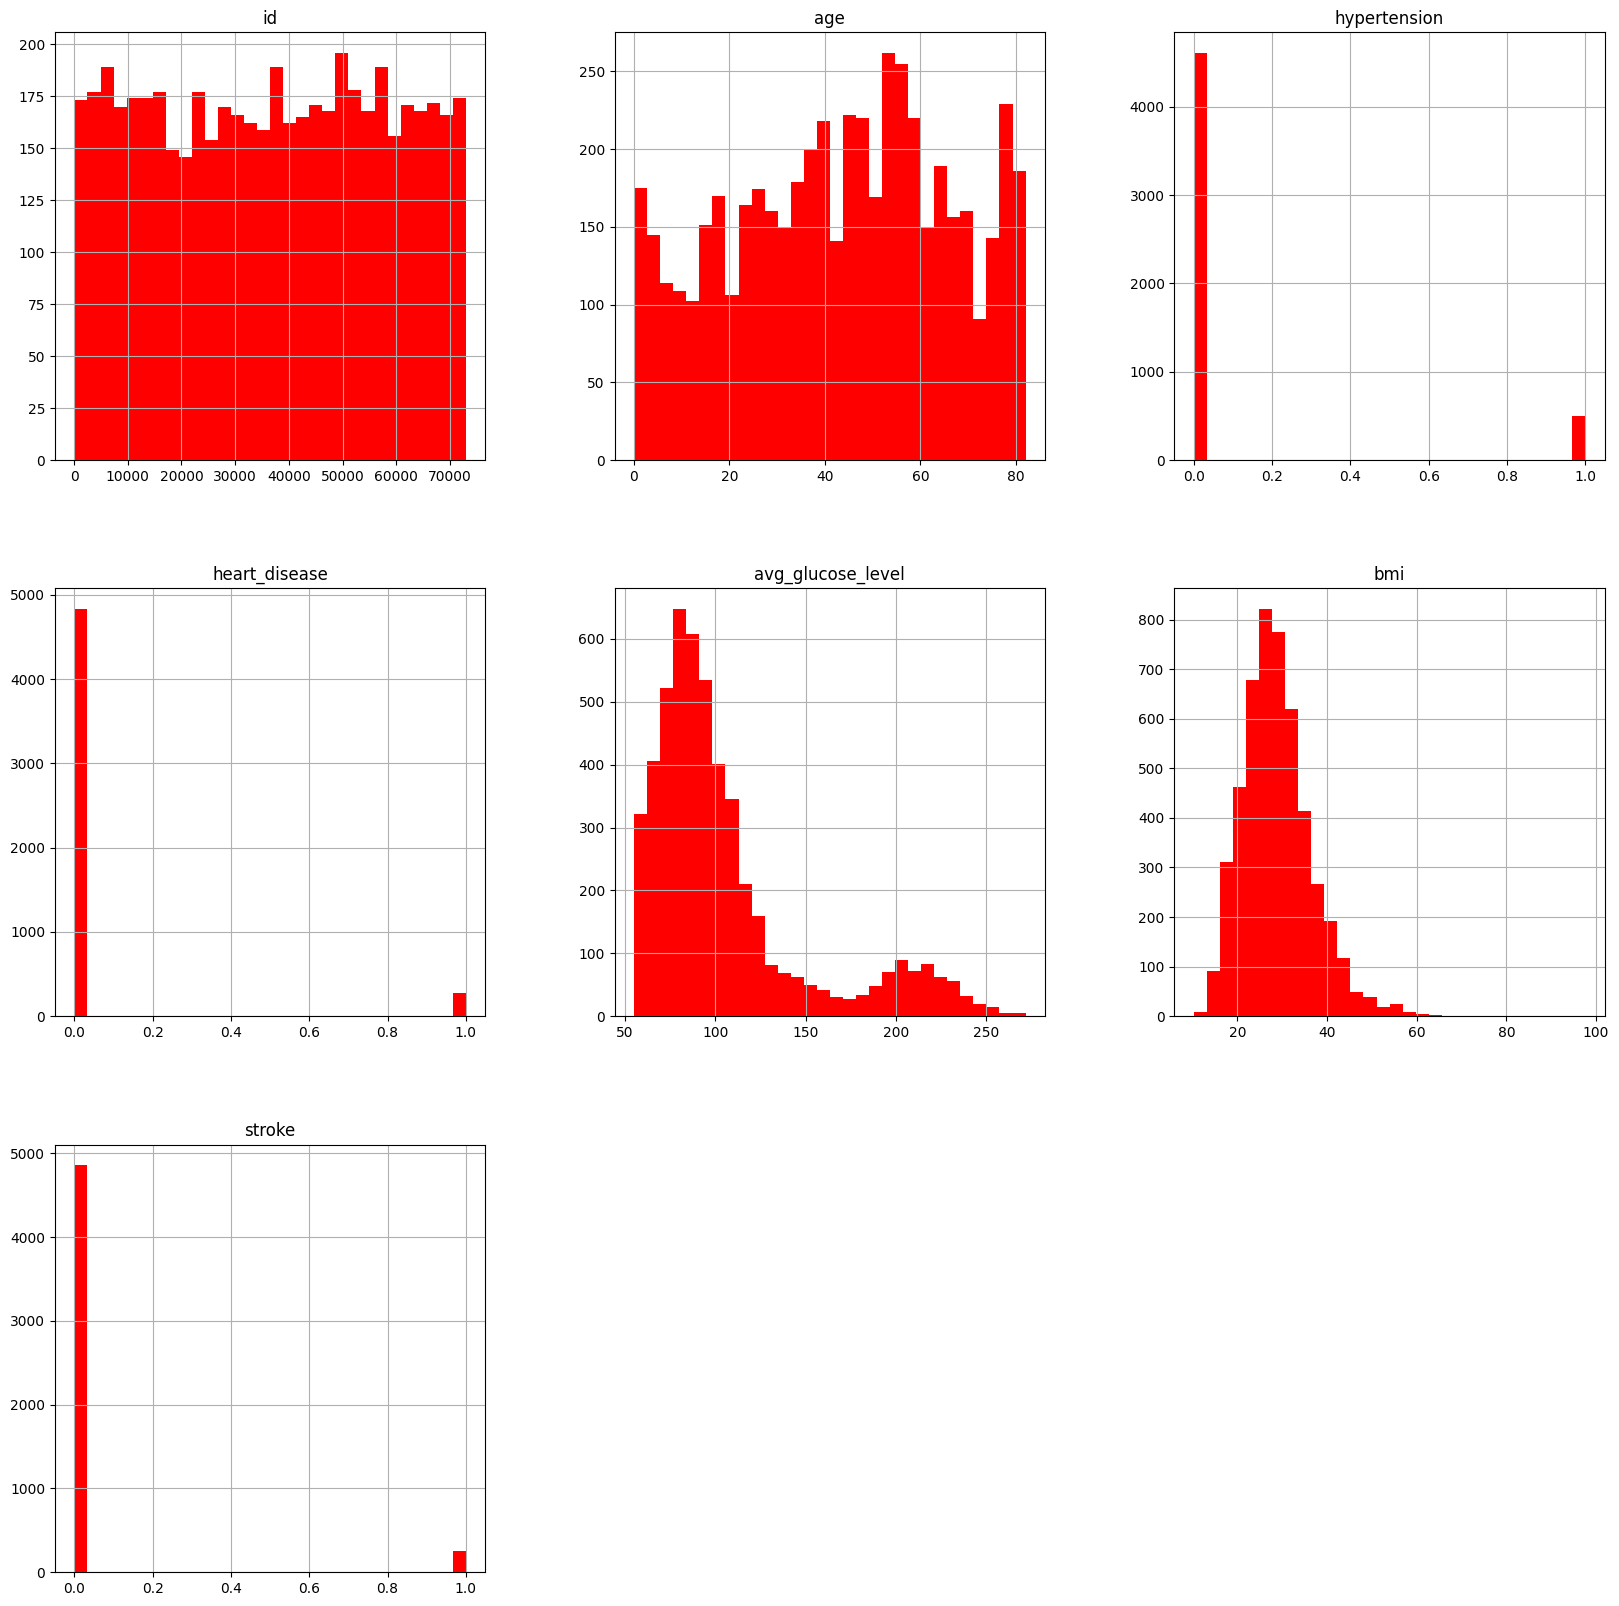

In [21]:
# Histograma para ver a distribuição dos dados
num_attributes.hist(bins = 30, figsize=(20,20), color = 'r');

**Distribuições das Variáveis:**

- ID: Distribuição uniforme - confirma que os IDs são sequenciais e bem distribuídos (boa amostragem)

**Idade:**

- Distribuição bimodal com picos em ~10 anos e ~50-60 anos
- Sugere duas populações distintas (jovens e adultos/idosos)
- Importante para segmentação etária na análise

**Variáveis Binárias (Hipertensão, Doença Cardíaca, Stroke):**

- Extremamente desbalanceadas - praticamente todos os casos são "0" (não têm a condição)
- Stroke: ~95% não tiveram AVC (confirma o desbalanceamento severo)
- Hipertensão e Doença Cardíaca: ~90-95% não têm essas condições

**Glicose:**

- Distribuição assimétrica positiva com cauda longa à direita
- Pico em ~80-100 mg/dL (valores normais)
- Outliers importantes acima de 200 mg/dL (possíveis diabéticos)
- Segunda elevação em ~200+ pode indicar subpopulação diabética

**IMC:**

- Distribuição próxima à normal com leve assimetria positiva
- Pico em ~25-30 (sobrepeso/obesidade leve)
- Cauda longa indicando casos de obesidade severa

**Implicações Críticas:**

- Problema de classes desbalanceadas será o maior desafio
- Segmentação por idade pode revelar padrões diferentes
- Outliers de glicose merecem investigação (diabéticos?)
- Distribuições não-normais podem precisar de transformações
- Poucas ocorrências positivas dificultarão a modelagem

**Recomendações:**

- Usar técnicas de balanceamento (SMOTE, undersampling)
- Analisar correlações entre idade e outras variáveis
- Investigar subgrupos de risco (diabéticos, idosos)

#### Colunas Categóricas

In [22]:
# Verificando os valores únicos das colunas
cat_attributes.apply( lambda x: x.unique().shape[0] )

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [23]:
# Verificando os valores únicos das colunas
cat_attributes.apply( lambda x: x.unique() )

gender                                        [Male, Female, Other]
ever_married                                              [Yes, No]
work_type         [Private, Self-employed, Govt_job, children, N...
Residence_type                                       [Urban, Rural]
smoking_status     [formerly smoked, never smoked, smokes, Unknown]
dtype: object

### <font color='#F37126'> 1.6. Verificando outliers

In [24]:
# Filtrar os tipos de colunas
num_dados = df.select_dtypes( include= ['int64','float64'] )

<font color="#F37126"> Identificando os registros que são Outliers com a Biblioteca PYOD.

O algoritmo KNN é usado nesta biblioteca para medir as distância e calcular outilers.

In [25]:
# Instanciando o objeto KNN 
detector = KNN()

# Remover todas as linhas que contêm NaN
num_dados_clean = num_dados.dropna()

# Treinando um detector de OUTLIERS
detector.fit(num_dados_clean)

# A probiedade LABELS_ retorna um ARRAY com 0 e 1 - 0 significa que NÃO é outlier / 1 significa que É outlier
previsoes = detector.labels_

In [26]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([4418,  491]))

In [27]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [28]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = num_dados_clean.iloc[outliers,:]
display(lista_outliers)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
4,1665,79.0,1,0,174.12,24.0,1
14,5317,79.0,0,1,214.09,28.2,1
17,34120,75.0,1,0,221.29,25.8,1
21,13861,52.0,1,0,233.29,48.9,1
...,...,...,...,...,...,...,...
5034,65405,79.0,0,0,253.86,28.8,0
5061,38009,41.0,0,0,223.78,32.3,0
5062,11184,82.0,0,0,211.58,36.9,0
5063,68967,39.0,0,0,179.38,27.7,0


In [29]:
num_dados_clean.shape,lista_outliers.shape

((4909, 7), (491, 7))

**Proporção de Outliers:**

- 491 outliers em 4.909 registros válidos = ~10% do dataset
- Proporção significativa que merece investigação detalhada
- Não é excessiva (não indica problema grave nos dados)

**Características dos Outliers Identificados:**

- Padrões Observados:

    - Idades elevadas (67, 79, 75, 82 anos) - idosos são mais propensos a serem outliers
    - Níveis de glicose altos (228, 214, 221, 233, 253 mg/dL) - bem acima do normal
    - Presença de comorbidades (hipertensão=1, heart_disease=1)
    - Mistura de casos com e sem stroke (tanto 0 quanto 1)

- Insights Clínicos:

    - Outliers não são apenas ruído - representam casos clínicos complexos
    - Pacientes de alto risco com múltiplos fatores (idade + glicose + comorbidades)
    - Combinações extremas de fatores de risco que o KNN detectou como atípicas

**Implicações para Análise:**

- Decisão Crítica:

    - NÃO remover automaticamente - podem ser os casos mais informativos para stroke
    - Investigar separadamente - podem representar subpopulação de alto risco
    - Análise segmentada - comparar características outliers vs não-outliers

In [30]:
# Obtendo o nome de todas as colunas
columns = num_dados.columns

# Loop para percorrer cada coluna
for column in columns:
    print("Testando a coluna:", column)
    temp = df[column]
    temp = temp.to_frame()
    outliers_test(temp)
    print("\n")

Testando a coluna: id
Grubbs Valor Calculado - Coluna 1: 1.7226574066806497
Grubbs Valor Crítico - Coluna 1: 4.417864103172576
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: age
Grubbs Valor Calculado - Coluna 1: 1.908261222658104
Grubbs Valor Crítico - Coluna 1: 4.417864103172576
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: hypertension
Grubbs Valor Calculado - Coluna 1: 3.0431963749825326
Grubbs Valor Crítico - Coluna 1: 4.417864103172576
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: heart_disease
Grubbs Valor Calculado - Coluna 1: 4.185031989557928
Grubbs Valor Crítico - Coluna 1: 4.417864103172576
Para a variável X na coluna 1, observamos que o valor c

id : int64
age : float64
hypertension : int64
heart_disease : int64
avg_glucose_level : float64
bmi : float64
stroke : int64


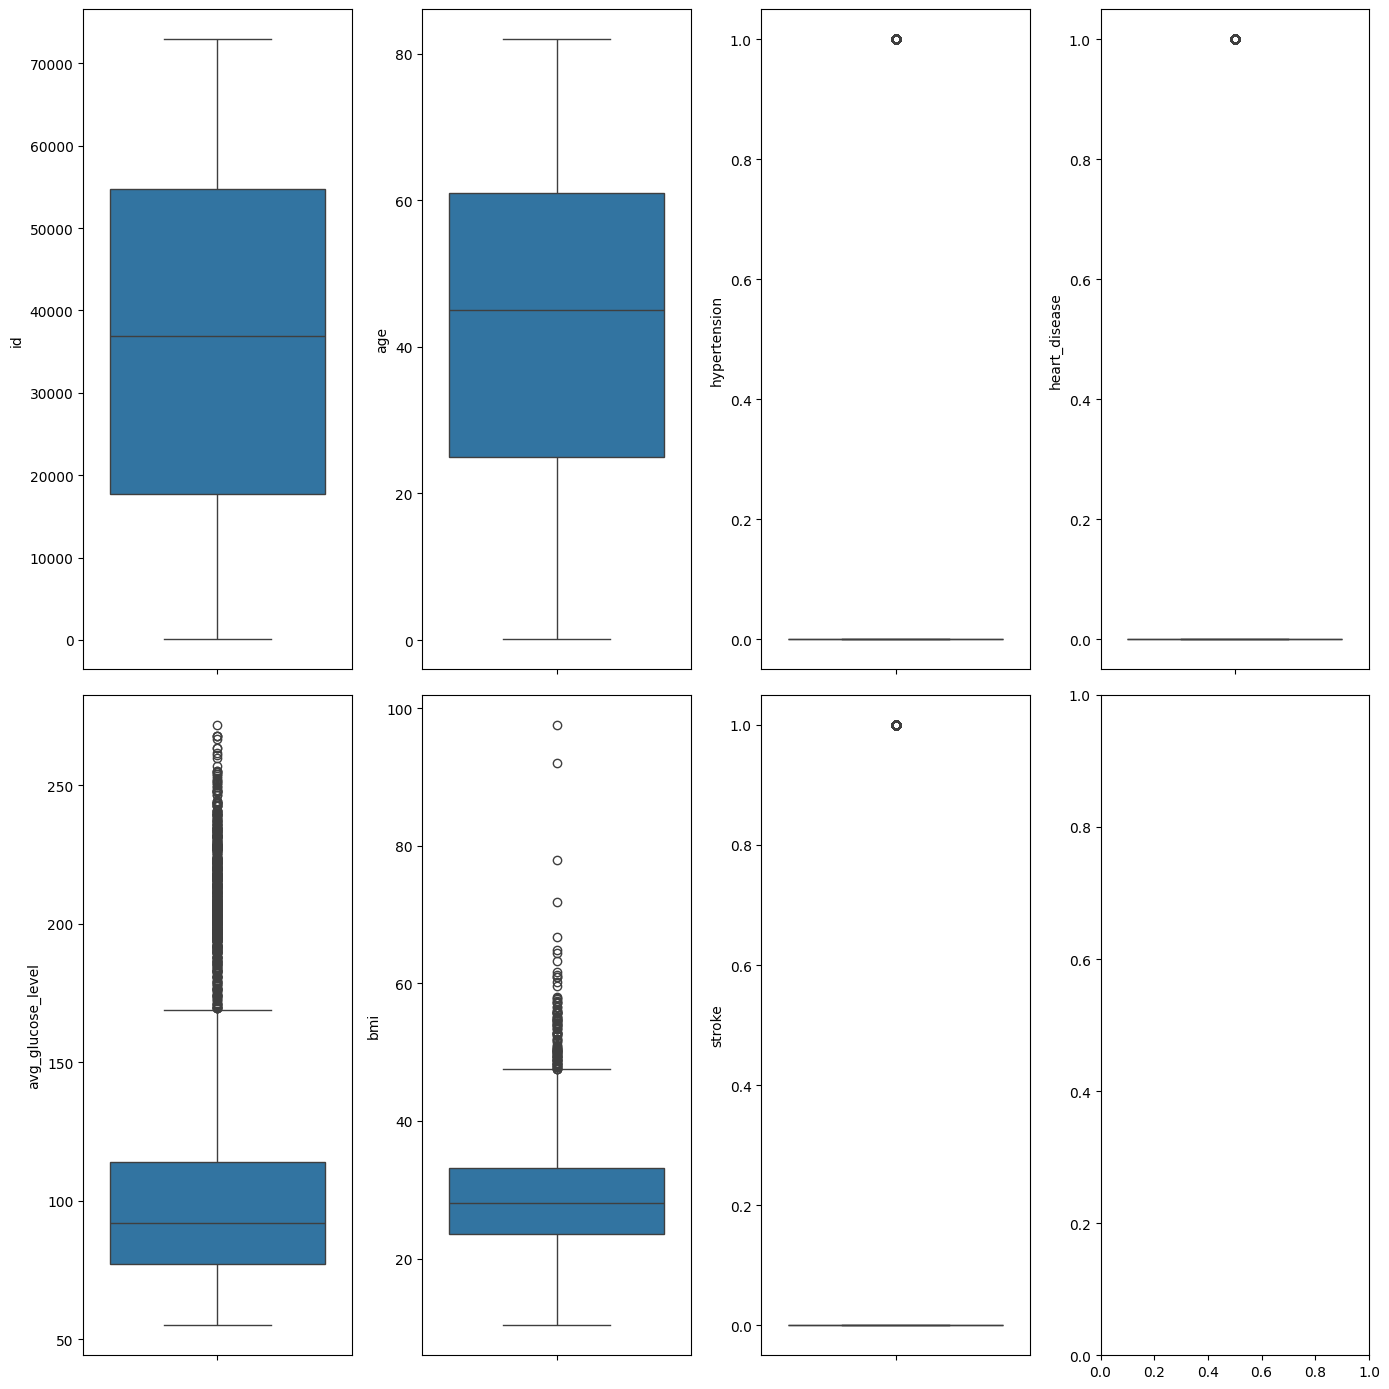

In [31]:
# Carregar variaveis para plot
variaveis_numericas = []
for i in num_dados:
        if num_dados.dtypes[i] == 'int64' or num_dados.dtypes[i] == 'float64':            
            print(i, ':' , num_dados.dtypes[i]) 
            variaveis_numericas.append(i)  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 4) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = num_attributes, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show()

**Análise de Outliers por Variável:**

- ID e Age:

    - ID: Distribuição uniforme sem outliers (esperado para identificadores)
    - Age: Poucos outliers nas idades mais avançadas (~80+ anos), distribuição bem comportada

- Variáveis Binárias (Hypertension, Heart_disease, Stroke):

    - Sem outliers aparentes (apenas valores 0 e 1)
    - Confirmam o desbalanceamento - mediana em 0 para todas
    - Stroke: Extremamente desbalanceado (quase todos os casos = 0)

**Variáveis Contínuas Críticas:**

- avg_glucose_level:

    - MUITOS outliers extremos acima de 200 mg/dL
    - Caixa concentrada entre ~75-115 mg/dL (valores normais)
    - Outliers representam casos diabéticos ou pré-diabéticos importantes
    - Maior concentração de outliers entre todas as variáveis

- BMI:

    - Outliers significativos acima de 60 (obesidade mórbida)
    - Alguns casos extremos próximos a 100
    - Distribuição principal entre ~23-35 (normal a obesidade leve)
    - Outliers clinicamente relevantes

**Insights Clínicos Importantes:**

- Glucose é a variável mais problemática:

    - Outliers não são erro de dados - são casos clínicos reais
    - Valores >200 mg/dL indicam diabetes descontrolado
    - Fator de risco crítico para stroke

- BMI outliers:

    - Obesidade extrema (BMI >60) é fator de risco cardiovascular
    - Casos raros mas clinicamente significativos

**Recomendações:**

1. NÃO remover outliers de glucose e BMI - são clinicamente informativos
2. Análise segmentada diabéticos vs não-diabéticos
3. Transformações robustas (log, winsorization) se necessário
4. Investigar correlação outliers com stroke
5. Considerar categorização de glucose (normal, pré-diabetes, diabetes)

**Os outliers são dados valiosos, não ruído - representam população de alto risco cardiovascular!**

### <font color='#F37126'> 1.7. Verificando o balanceamento da variável alvo

In [32]:
aux1 = df['stroke'].value_counts()
aux2 = (df['stroke'].value_counts(normalize=True) * 100).apply(lambda x: f"{x:.2f}%")

result = pd.concat([aux1,aux2],axis=1)

print(result)

        count proportion
stroke                  
0        4861     95.13%
1         249      4.87%


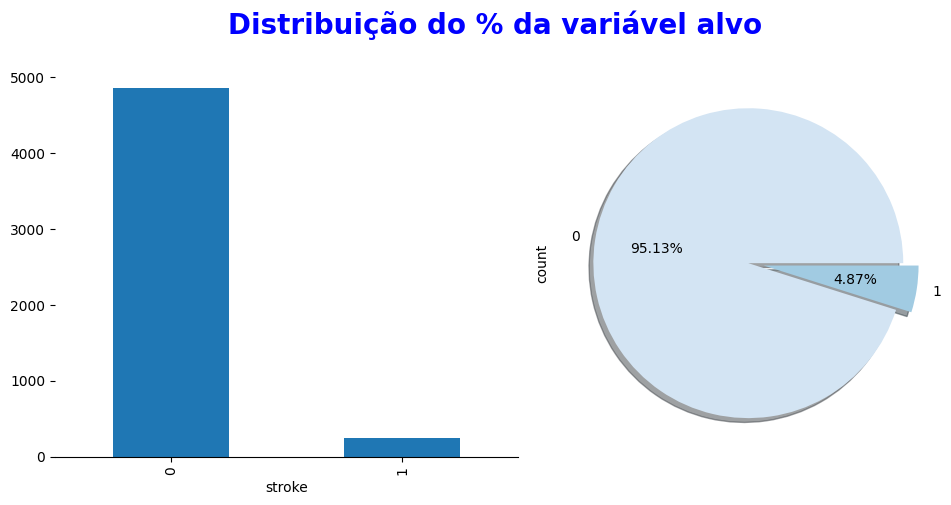

In [33]:
# Visualizando graficamente
plt.figure(figsize=(10,5))

sns.color_palette("Blues", as_cmap=True)
Blues_palette = sns.color_palette("Blues",10)

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)
# Título
plt.suptitle('Distribuição do % da variável alvo',fontsize=20, fontweight='bold', color='blue', y=1.00)

plt.subplot(1,2,1)
df.stroke.value_counts().plot.bar()

plt.gca().spines["top"].set_visible(False)  # remover borda superior
plt.gca().spines["right"].set_visible(False)  # remover borda direita
plt.gca().spines["left"].set_visible(False)  # remover borda esquerda

plt.subplot(1,2,2)
df.stroke.value_counts().plot.pie(explode=[0,0.1],autopct='%.2f%%',shadow=True, colors=[Blues_palette[1],Blues_palette[3]])

plt.savefig('imagens/Distribuicaoever_stroke.png', bbox_inches='tight')

plt.show()

**Desbalanceamento Extremo da Variável Target:**

- 95,13% não tiveram AVC (classe 0)
- Apenas 4,87% tiveram AVC (classe 1)
- Proporção de ~20:1 entre as classes

**Implicações Críticas para Modelagem:**

- Problema de Classificação Desbalanceada:

    - Algoritmos tradicionais tenderão a classificar tudo como "não-AVC"
    - Acurácia enganosa - modelo pode ter 95% de acurácia apenas "chutando" sempre 0
    - Métricas tradicionais (acurácia) serão inadequadas

- Desafios Específicos:

    - Poucos exemplos positivos para o modelo aprender padrões de AVC
    - Risco de overfitting na classe minoritária
    -Sensibilidade baixa - modelo pode não detectar casos reais de AVC

- Técnicas de Balanceamento:

    1. SMOTE (Synthetic Minority Oversampling)
    2. Random Undersampling da classe majoritária
    3. Ensemble methods (BalancedRandomForest)
    4. Class weights nos algoritmos

- Métricas Adequadas:

    - Precision, Recall, F1-Score (especialmente para classe 1)
    - AUC-ROC e AUC-PR
    - Sensitivity/Specificity
    - Confusion Matrix detalhada

# <font color= "red"> **4 - ANÁLISE EXPLORATÓRIA DOS DADOS**

## <font color='blue'> PASSO 4 - Análise Descritiva dos Dados

### <font color='#F37126'> 4.1. Criação das Hipóteses

#### Hipóteses Individuais (colunas isoladas)

**Gênero**

- Hipótese 1: Pacientes do gênero masculino têm maior incidência de AVC do que os do gênero feminino.

**Idade**

- Hipótese 2: A chance de sofrer um AVC aumenta com a idade.

- Hipótese 3: Pacientes com menos de 40 anos têm probabilidade muito baixa de sofrer AVC.

**Hipertensão**

- Hipótese 4: Pacientes com hipertensão têm maior probabilidade de ter sofrido AVC.

**Doença cardíaca**

- Hipótese 5: Ter doença cardíaca está fortemente associado a AVC.

**Sempre casado**

- Hipótese 6: Pacientes que são/foram casados têm incidência maior de AVC devido à correlação com idade mais avançada.

**Tipo de trabalho**

- Hipótese 7: O tipo de trabalho não influência na chance de AVC.

**Tipo de residência**

- Hipótese 8: O tipo de residência (rural ou urbano) não influencia significativamente a incidência de AVC.

**Status de tabagismo**

- Hipótese 9: Fumantes ativos ou ex-fumantes têm maior risco de AVC em comparação com não fumantes.

#### Hipóteses Combinadas (entre colunas)

**Idade + hipertensão**

- Hipótese 10: Pacientes com mais de 60 anos e hipertensão têm risco significativamente maior de AVC.

**IMC + glicose**

- Hipótese 11: Pacientes com IMC acima de 30 e glicose acima de 140 mg/dL têm maior incidência de AVC (síndrome metabólica).

**Gênero + tabagismo**

- Hipótese 12: Homens fumantes têm maior risco de AVC do que mulheres fumantes.

### <font color='#F37126'> 4.2. Hipóteses Individuais (colunas isoladas)

#### Gênero

- Hipótese 1: Pacientes do gênero masculino têm maior incidência de AVC do que os do gênero feminino.

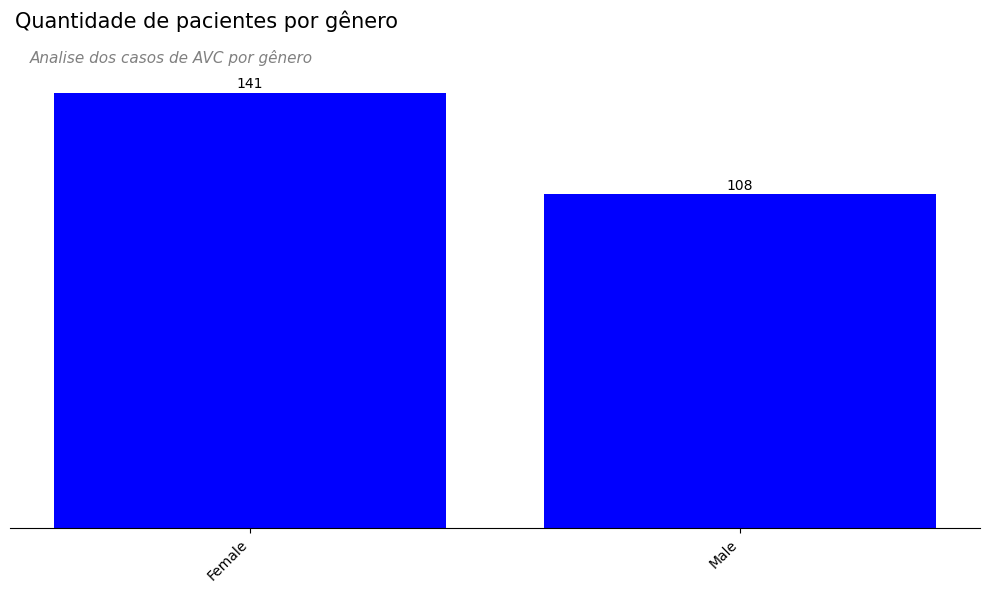

In [34]:
gender_counts = df[df["stroke"] == 1]["gender"].value_counts()

plot_barra (df = df,
            df_x = gender_counts.index,
            df_y = gender_counts.values,
            title = 'Quantidade de pacientes por gênero',
            subtitulo= 'Analise dos casos de AVC por gênero')

**Observações principais:**

- Há mais casos de AVC em mulheres (141) do que em homens (108) no dataset
- A diferença é de aproximadamente 30% a mais de casos femininos
- Distribuição relativamente equilibrada entre os gêneros, o que é positivo para o modelo

**Implicações para o modelo:**

- Não há desbalanceamento extremo por gênero
- O gênero pode ser uma variável preditiva relevante, mas será necessário analisar se essa diferença é estatisticamente significativa

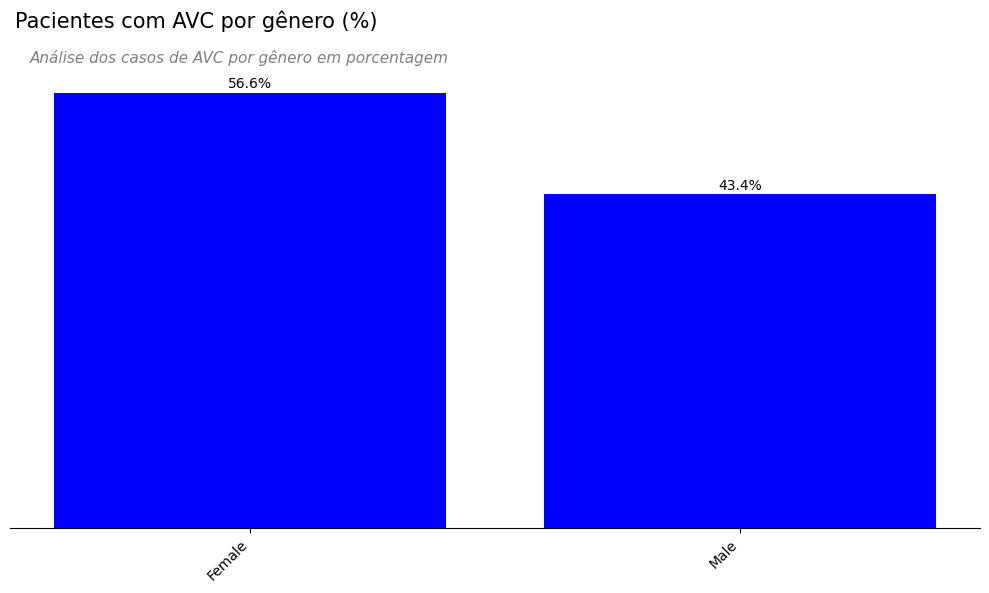

In [35]:
gender_percent = df[df['stroke'] == 1]['gender'].value_counts()
gender_percent = (gender_counts / gender_counts.sum()) * 100

plot_barra (df = df,
            df_x = gender_percent.index,
            df_y = gender_percent.values,
            title = 'Pacientes com AVC por gênero (%)',
            subtitulo = 'Análise dos casos de AVC por gênero em porcentagem',
            porcentagem = True)

**Observações principais:**

- 56,6% dos casos de AVC são em mulheres vs 43,4% em homens
- Diferença de aproximadamente 13 pontos percentuais favorecendo o sexo feminino
- Confirma a tendência observada no gráfico anterior

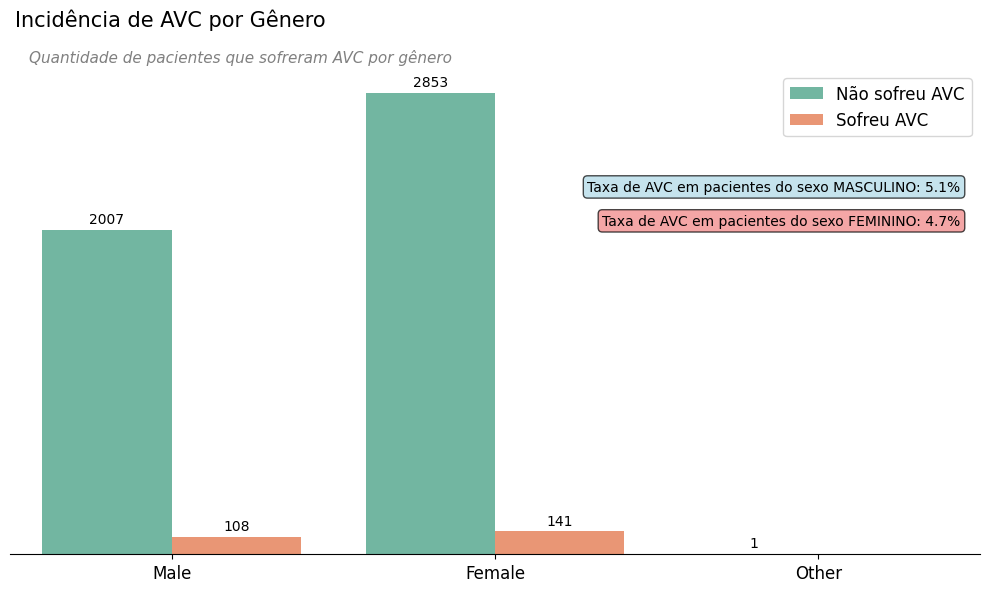

In [36]:
plot_barra_agrupada(df=df, 
                   x_col='gender', 
                   hue_col='stroke',
                   title='Incidência de AVC por Gênero', 
                   subtitulo='Quantidade de pacientes que sofreram AVC por gênero',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Feminino', 'Masculino'],
                   rate_labels=["Taxa de AVC em pacientes do sexo MASCULINO:", 
                               "Taxa de AVC em pacientes do sexo FEMININO:"])

**Insight crucial - correção da análise anterior:**

- Homens têm maior taxa de AVC: 5,1% vs 4,7% em mulheres
- Apesar do número absoluto de mulheres com AVC ser maior (141), a incidência proporcional é menor
- Isso ocorre porque há muito mais mulheres no dataset total (2.994 vs 2.115 homens)
- Gênero masculino é um fator de risco ligeiramente maior para AVC neste dataset
- Gênero masculino deve ter peso ligeiramente positivo na predição de AVC

In [37]:
print("=== TESTANDO HIPÓTESE 1: GÊNERO x AVC ===\n")

# Análise estatística básica
print("=== ANÁLISE ESTATÍSTICA ===")

# Calcular proporções usando groupby
prop_avc = df.groupby('gender')['stroke'].mean() * 100

print(f"Taxa de AVC em pacientes do sexo FEMININO: {prop_avc['Female']:.1f}%")
print(f"Taxa de AVC em pacientes do sexo MASCULINO: {prop_avc['Male']:.1f}%")
print(f"Diferença: {prop_avc['Male'] - prop_avc['Female']:.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_grupo = df.groupby('gender')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo['Male'] / odds_por_grupo['Female']

print(f"Odds Ratio (Masculino vs Feminino): {odds_ratio_groupby:.2f}")

# Contagem absoluta para contexto
contagem = df.groupby(['gender', 'stroke']).size().unstack(fill_value=0)
print(f"\n=== CONTAGEM ABSOLUTA ===")
print(contagem)

# Interpretação do resultado
print(f"\n=== INTERPRETAÇÃO ===")
if odds_ratio_groupby > 1:
    if odds_ratio_groupby >= 3.0:
        forca_associacao = "FORTE"
    elif odds_ratio_groupby >= 1.5:
        forca_associacao = "MODERADA"
    else:
        forca_associacao = "FRACA"
    
    print(f"✓ A HIPÓTESE É CONFIRMADA: Homens têm maior risco de AVC que mulheres")
    print(f"📊 Força da associação: {forca_associacao} (OR = {odds_ratio_groupby:.2f})")
    
    # Verificar magnitude da diferença
    diferenca_percentual = ((prop_avc['Male'] / prop_avc['Female']) - 1) * 100
    print(f"📈 Homens têm {diferenca_percentual:.1f}% mais risco de AVC que mulheres")
    
    # Classificar a força da associação
    if odds_ratio_groupby >= 3.0:
        print("🎯 CONCLUSÃO: O gênero masculino está FORTEMENTE associado ao AVC")
    else:
        print("⚠️  CONCLUSÃO: O gênero masculino está associado ao AVC, mas não FORTEMENTE")
        
elif odds_ratio_groupby < 1:
    print("✗ A HIPÓTESE É REJEITADA: Mulheres têm MAIOR risco de AVC que homens")
    print(f"📊 OR = {odds_ratio_groupby:.2f} (< 1 indica proteção para homens)")
    
else:
    print("➖ RESULTADO NEUTRO: Não há diferença significativa entre os gêneros")

# Classificação da força da associação (referência)
print(f"\n=== REFERÊNCIA DE INTERPRETAÇÃO ===")
print("OR = 1.0: Sem associação")
print("OR = 1.0 - 1.5: Associação fraca")
print("OR = 1.5 - 3.0: Associação moderada") 
print("OR = 3.0 - 10.0: Associação forte")
print("OR > 10.0: Associação muito forte")
print("OR < 1.0: Fator protetor (menor risco)")

# Resumo da hipótese
print(f"\n=== RESUMO DA HIPÓTESE 1 ===")
print("Hipótese testada: 'Pacientes do gênero masculino têm maior incidência de AVC'")
if odds_ratio_groupby > 1:
    print("✅ STATUS: CONFIRMADA")
    print(f"📊 Evidência: OR = {odds_ratio_groupby:.2f}")
else:
    print("❌ STATUS: REJEITADA")
    print(f"📊 Evidência: OR = {odds_ratio_groupby:.2f}")

=== TESTANDO HIPÓTESE 1: GÊNERO x AVC ===

=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em pacientes do sexo FEMININO: 4.7%
Taxa de AVC em pacientes do sexo MASCULINO: 5.1%
Diferença: 0.4 pontos percentuais
Odds Ratio (Masculino vs Feminino): 1.09

=== CONTAGEM ABSOLUTA ===
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0

=== INTERPRETAÇÃO ===
✓ A HIPÓTESE É CONFIRMADA: Homens têm maior risco de AVC que mulheres
📊 Força da associação: FRACA (OR = 1.09)
📈 Homens têm 8.4% mais risco de AVC que mulheres
⚠️  CONCLUSÃO: O gênero masculino está associado ao AVC, mas não FORTEMENTE

=== REFERÊNCIA DE INTERPRETAÇÃO ===
OR = 1.0: Sem associação
OR = 1.0 - 1.5: Associação fraca
OR = 1.5 - 3.0: Associação moderada
OR = 3.0 - 10.0: Associação forte
OR > 10.0: Associação muito forte
OR < 1.0: Fator protetor (menor risco)

=== RESUMO DA HIPÓTESE 1 ===
Hipótese testada: 'Pacientes do gênero masculino têm maior incidência de AVC'
✅ STATUS: CONFIRMADA
📊 Evidência: O

#### Idade

- Hipótese 2: A chance de sofrer um AVC aumenta com a idade.

- Hipótese 3: Pacientes com menos de 40 anos têm probabilidade muito baixa de sofrer AVC.

In [38]:
def categorizar_idade(idade):
    if idade < 30:
        return '<30'
    elif 30 <= idade <= 39:
        return '30-39'
    elif 40 <= idade <= 49:
        return '40-49'
    elif 50 <= idade <= 59:
        return '50-59'
    elif 60 <= idade <= 69:
        return '60-69'
    else:  # idade >= 70
        return '70+'

# Aplicar a função para criar a coluna faixa_etaria
df['faixa_etaria'] = df['age'].apply(categorizar_idade)
# Definir a ordem das categorias para manter a sequência lógica
ordem_faixas = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
df['faixa_etaria'] = pd.Categorical(df['faixa_etaria'], categories=ordem_faixas, ordered=True)

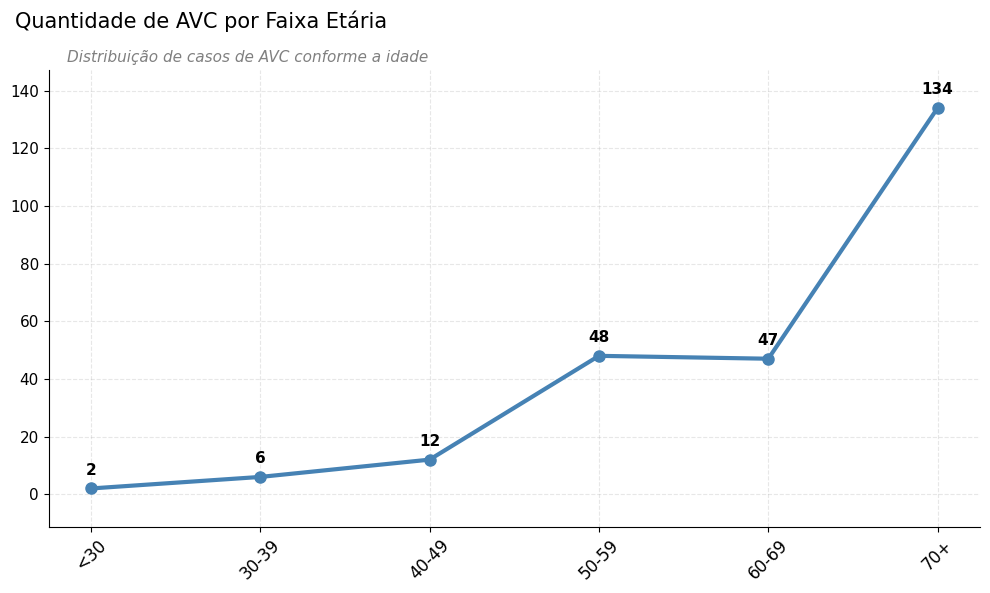

In [39]:
# Calcular QUANTIDADE de AVC por faixa etária (não porcentagem)
quantidade_avc = df[df['stroke'] == 1].groupby('faixa_etaria', observed=False).size()

plot_linha(df=df,
           df_x=quantidade_avc.index,
           df_y=quantidade_avc.values,
           title='Quantidade de AVC por Faixa Etária',
           subtitulo='Distribuição de casos de AVC conforme a idade',
           porcentagem=False)  # Para mostrar números absolutos

**Padrão claro de aumento com a idade:**

- Casos raríssimos antes dos 40 anos (2 e 6 casos)
- Crescimento gradual dos 40-59 anos (12 → 48 casos)
- Explosão após os 70 anos: 134 casos (quase 3x mais que qualquer outra faixa)

**Insights importantes:**

- Idade é claramente o fator de risco mais forte no dataset
- A faixa 70+ concentra 53,8% de todos os casos de AVC
- Padrão esperado e consistente com literatura médica

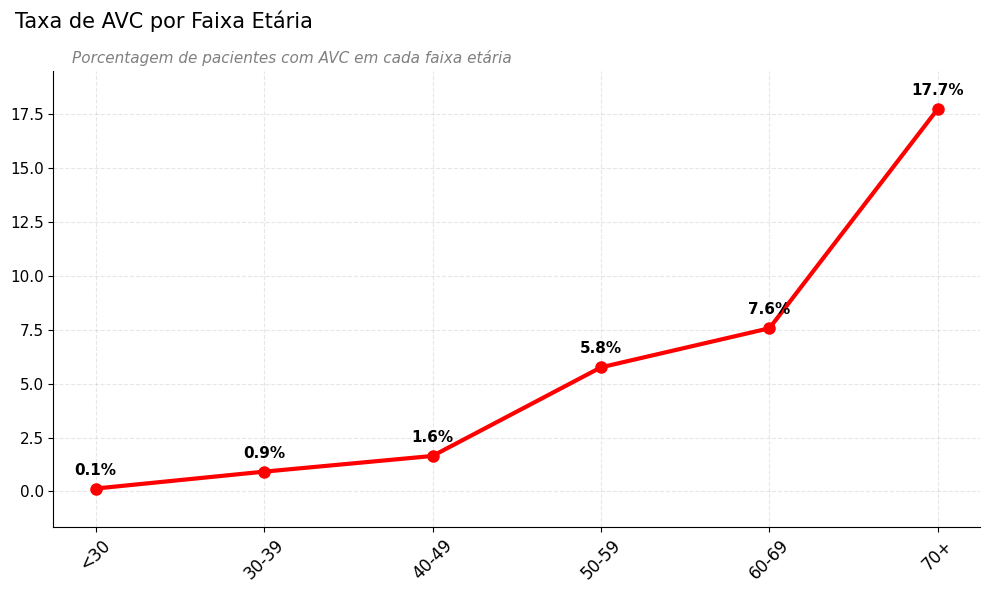

In [40]:
# Exemplo adicional para mostrar TAXA de AVC (em porcentagem):
taxa_avc = df.groupby('faixa_etaria', observed=False)['stroke'].mean() * 100

plot_linha(df=df,
           df_x=taxa_avc.index,
           df_y=taxa_avc.values,
           title='Taxa de AVC por Faixa Etária',
           subtitulo='Porcentagem de pacientes com AVC em cada faixa etária',
           porcentagem=True,  # Para mostrar como porcentagem
           color="red")

**Crescimento exponencial muito claro:**

- Risco praticamente nulo antes dos 30 anos (0,1%)
- Crescimento gradual até os 49 anos (0,9% → 1,6%)
- Aceleração dramática após os 50:
    - 50-59: 5,8% (3,6x maior que faixa anterior)
    - 60-69: 7,6%
    - 70+: 17,7% (mais que dobra novamente)
- Idade >70 = risco de quase 1 em 5 pessoas (17,7%)

**Implicações para o modelo:**

- Idade será definitivamente a variável mais importante
- Considerar transformações logarítmicas ou exponenciais da idade

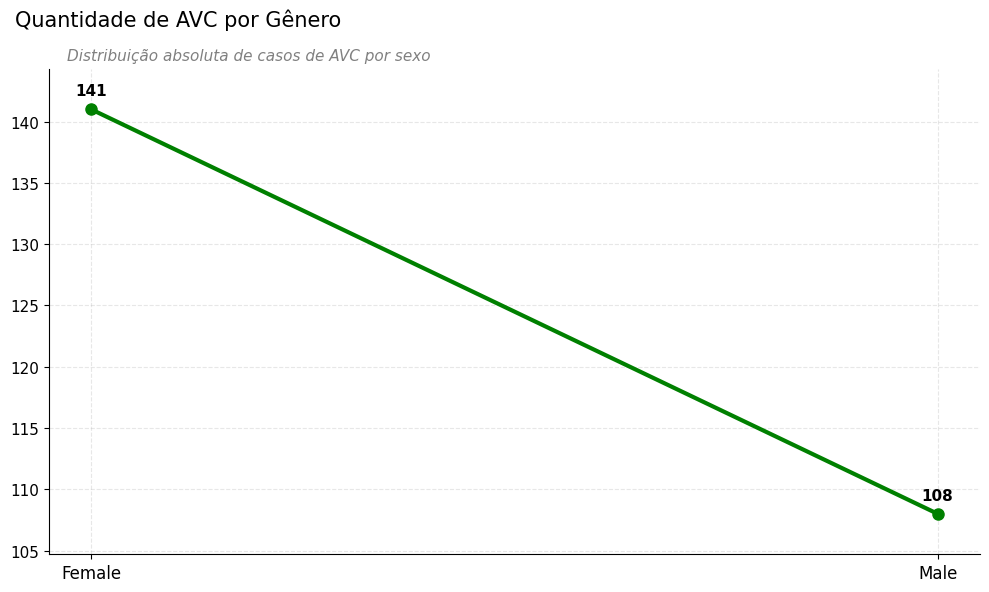

In [41]:
# Quantidade de AVC por gênero
quantidade_genero = df[df['stroke'] == 1].groupby('gender').size()

plot_linha(df=df,
           df_x=quantidade_genero.index,
           df_y=quantidade_genero.values,
           title='Quantidade de AVC por Gênero',
           subtitulo='Distribuição absoluta de casos de AVC por sexo',
           porcentagem=False,
           color="green")

**Confirmação dos dados anteriores:**

- 141 casos femininos vs 108 masculinos (diferença de 33 casos)
- Representa os mesmos números já analisados nos gráficos iniciais

**Observação sobre a visualização:**

- A linha descendente enfatiza visualmente a diferença absoluta
- Formato simples e direto para mostrar a distribuição bruta

**Para o modelo:**

- Confirma que gênero masculino deve ter peso positivo na predição

In [42]:
# =============================================================================
# HIPÓTESE 2: A chance de sofrer um AVC aumenta com a idade
# =============================================================================

print("=== HIPÓTESE 2: RELAÇÃO IDADE x AVC ===")

# Calcular correlação entre idade e AVC
correlacao, p_valor = pearsonr(df['age'], df['stroke'])
print(f"Correlação idade x AVC: {correlacao:.4f}")
print(f"P-valor: {p_valor:.6f}")

# Criar faixas etárias para análise mais detalhada
df['faixa_etaria'] = pd.cut(df['age'], 
                           bins=[0, 30, 40, 50, 60, 70, 100], 
                           labels=['<30', '30-39', '40-49', '50-59', '60-69', '70+'])

# Calcular taxa de AVC por faixa etária
taxa_por_faixa = df.groupby('faixa_etaria', observed=False)['stroke'].agg(['count', 'sum', 'mean']).round(3)
taxa_por_faixa['taxa_percentual'] = (taxa_por_faixa['mean'] * 100).round(1)
taxa_por_faixa.columns = ['Total_Pacientes', 'Com_AVC', 'Taxa_Decimal', 'Taxa_Percentual']

print(f"\n=== TAXA DE AVC POR FAIXA ETÁRIA ===")
print(taxa_por_faixa)

# Verificar tendência crescente
taxas_percentuais = taxa_por_faixa['Taxa_Percentual'].values
tendencia_crescente = all(taxas_percentuais[i] <= taxas_percentuais[i+1] for i in range(len(taxas_percentuais)-1))

print(f"\n=== INTERPRETAÇÃO HIPÓTESE 2 ===")
if correlacao > 0 and p_valor < 0.05:
    print(f"✓ CORRELAÇÃO SIGNIFICATIVA: r = {correlacao:.4f} (p < 0.05)")
    
    if correlacao >= 0.7:
        forca_correlacao = "FORTE"
    elif correlacao >= 0.5:
        forca_correlacao = "MODERADA"
    elif correlacao >= 0.3:
        forca_correlacao = "FRACA a MODERADA"
    else:
        forca_correlacao = "FRACA"
    
    print(f"📊 Força da correlação: {forca_correlacao}")
    
    if tendencia_crescente:
        print("📈 TENDÊNCIA: Taxa de AVC cresce consistentemente com a idade")
        print("✅ HIPÓTESE 2: CONFIRMADA - A chance de AVC aumenta com a idade")
    else:
        print("⚠️  TENDÊNCIA: Correlação positiva, mas nem sempre crescente entre faixas")
        print("⚡ HIPÓTESE 2: PARCIALMENTE CONFIRMADA")
        
else:
    print(f"✗ Correlação não significativa: r = {correlacao:.4f} (p = {p_valor:.6f})")
    print("❌ HIPÓTESE 2: REJEITADA")

=== HIPÓTESE 2: RELAÇÃO IDADE x AVC ===
Correlação idade x AVC: 0.2453
P-valor: 0.000000

=== TAXA DE AVC POR FAIXA ETÁRIA ===
              Total_Pacientes  Com_AVC  Taxa_Decimal  Taxa_Percentual
faixa_etaria                                                         
<30                      1570        2         0.001              0.1
30-39                     674        6         0.009              0.9
40-49                     739       15         0.020              2.0
50-59                     823       49         0.060              6.0
60-69                     594       49         0.082              8.2
70+                       710      128         0.180             18.0

=== INTERPRETAÇÃO HIPÓTESE 2 ===
✓ CORRELAÇÃO SIGNIFICATIVA: r = 0.2453 (p < 0.05)
📊 Força da correlação: FRACA
📈 TENDÊNCIA: Taxa de AVC cresce consistentemente com a idade
✅ HIPÓTESE 2: CONFIRMADA - A chance de AVC aumenta com a idade


In [43]:
# =============================================================================
# HIPÓTESE 3: Pacientes com menos de 40 anos têm probabilidade muito baixa de sofrer AVC
# =============================================================================

print(f"\n=== HIPÓTESE 3: AVC EM JOVENS (<40 ANOS) ===")

# Filtrar pacientes com menos de 40 anos
jovens = df[df['age'] < 40]
idosos = df[df['age'] >= 60]  # Para comparação

# Calcular estatísticas
taxa_jovens = jovens['stroke'].mean() * 100
taxa_idosos = idosos['stroke'].mean() * 100
taxa_geral = df['stroke'].mean() * 100

total_jovens = len(jovens)
avc_jovens = jovens['stroke'].sum()

print(f"Pacientes < 40 anos: {total_jovens}")
print(f"AVCs em < 40 anos: {avc_jovens}")
print(f"Taxa de AVC em < 40 anos: {taxa_jovens:.1f}%")
print(f"Taxa de AVC em ≥ 60 anos: {taxa_idosos:.1f}%")
print(f"Taxa geral de AVC: {taxa_geral:.1f}%")

# Comparar com outras faixas
taxa_30_39 = taxa_por_faixa.loc['30-39', 'Taxa_Percentual'] if '30-39' in taxa_por_faixa.index else 0
taxa_menor_30 = taxa_por_faixa.loc['<30', 'Taxa_Percentual'] if '<30' in taxa_por_faixa.index else 0

print(f"\nDetalhamento:")
print(f"Taxa < 30 anos: {taxa_menor_30:.1f}%")
print(f"Taxa 30-39 anos: {taxa_30_39:.1f}%")

# Definir critério para "muito baixa" (arbitrário: < 5% ou muito menor que a média)
criterio_muito_baixa = 5.0  # 5%
razao_vs_geral = taxa_jovens / taxa_geral if taxa_geral > 0 else 0

print(f"\n=== INTERPRETAÇÃO HIPÓTESE 3 ===")
print(f"Critério 'muito baixa': < {criterio_muito_baixa}%")
print(f"Taxa jovens vs taxa geral: {razao_vs_geral:.2f}x")

if taxa_jovens < criterio_muito_baixa:
    print(f"✅ CRITÉRIO 1 ATENDIDO: {taxa_jovens:.1f}% < {criterio_muito_baixa}%")
    criterio1 = True
else:
    print(f"❌ CRITÉRIO 1 NÃO ATENDIDO: {taxa_jovens:.1f}% ≥ {criterio_muito_baixa}%")
    criterio1 = False

if razao_vs_geral < 0.5:  # Menos da metade da taxa geral
    print(f"✅ CRITÉRIO 2 ATENDIDO: Taxa é {razao_vs_geral:.2f}x da taxa geral (muito menor)")
    criterio2 = True
else:
    print(f"❌ CRITÉRIO 2 NÃO ATENDIDO: Taxa é {razao_vs_geral:.2f}x da taxa geral")
    criterio2 = False

# Conclusão da Hipótese 4
if criterio1 and criterio2:
    print("✅ HIPÓTESE 3: CONFIRMADA - Jovens têm probabilidade MUITO BAIXA de AVC")
elif criterio1 or criterio2:
    print("⚡ HIPÓTESE 3: PARCIALMENTE CONFIRMADA - Jovens têm baixa probabilidade")
else:
    print("❌ HIPÓTESE 3: REJEITADA - Probabilidade não é 'muito baixa'")


=== HIPÓTESE 3: AVC EM JOVENS (<40 ANOS) ===
Pacientes < 40 anos: 2170
AVCs em < 40 anos: 8
Taxa de AVC em < 40 anos: 0.4%
Taxa de AVC em ≥ 60 anos: 13.2%
Taxa geral de AVC: 4.9%

Detalhamento:
Taxa < 30 anos: 0.1%
Taxa 30-39 anos: 0.9%

=== INTERPRETAÇÃO HIPÓTESE 3 ===
Critério 'muito baixa': < 5.0%
Taxa jovens vs taxa geral: 0.08x
✅ CRITÉRIO 1 ATENDIDO: 0.4% < 5.0%
✅ CRITÉRIO 2 ATENDIDO: Taxa é 0.08x da taxa geral (muito menor)
✅ HIPÓTESE 3: CONFIRMADA - Jovens têm probabilidade MUITO BAIXA de AVC


In [44]:
# =============================================================================
# RESUMO FINAL
# =============================================================================

print(f"\n=== RESUMO DAS HIPÓTESES ===")
print(f"Hipótese 2: 'A chance de AVC aumenta com a idade'")
if correlacao > 0 and p_valor < 0.05 and tendencia_crescente:
    print("✅ STATUS: CONFIRMADA")
else:
    print("❌ STATUS: REJEITADA ou PARCIALMENTE CONFIRMADA")

print(f"\nHipótese 3: 'Pacientes < 40 anos têm probabilidade muito baixa de AVC'")
if criterio1 and criterio2:
    print("✅ STATUS: CONFIRMADA")
elif criterio1 or criterio2:
    print("⚡ STATUS: PARCIALMENTE CONFIRMADA")
else:
    print("❌ STATUS: REJEITADA")

print(f"\n=== DADOS-CHAVE ===")
print(f"📊 Correlação idade x AVC: {correlacao:.4f}")
print(f"📊 Taxa AVC < 40 anos: {taxa_jovens:.1f}%")
print(f"📊 Taxa AVC ≥ 60 anos: {taxa_idosos:.1f}%")
print(f"📊 Diferença: {taxa_idosos - taxa_jovens:.1f} pontos percentuais")


=== RESUMO DAS HIPÓTESES ===
Hipótese 2: 'A chance de AVC aumenta com a idade'
✅ STATUS: CONFIRMADA

Hipótese 3: 'Pacientes < 40 anos têm probabilidade muito baixa de AVC'
✅ STATUS: CONFIRMADA

=== DADOS-CHAVE ===
📊 Correlação idade x AVC: 0.2453
📊 Taxa AVC < 40 anos: 0.4%
📊 Taxa AVC ≥ 60 anos: 13.2%
📊 Diferença: 12.8 pontos percentuais


#### Hipertensão

- Hipótese 4: Pacientes com hipertensão têm maior probabilidade de ter sofrido AVC.

In [45]:
# Criar dois DataFrames: um para pacientes com hipertensão e outro sem hipertensão
df_hipertensos = df[df['hypertension'] == 1]
df_nao_hipertensos = df[df['hypertension'] == 0]

# Dentro de cada grupo, separar pacientes com AVC e sem AVC
# Pacientes com hipertensão
com_avc_hipertensos = df_hipertensos[df_hipertensos['stroke'] == 1]
sem_avc_hipertensos = df_hipertensos[df_hipertensos['stroke'] == 0]

# Pacientes sem hipertensão
com_avc_nao_hipertensos = df_nao_hipertensos[df_nao_hipertensos['stroke'] == 1]
sem_avc_nao_hipertensos = df_nao_hipertensos[df_nao_hipertensos['stroke'] == 0]

# Exemplo de contagem
print("Com hipertensão - Com AVC:", len(com_avc_hipertensos))
print("Com hipertensão - Sem AVC:", len(sem_avc_hipertensos))
print("Sem hipertensão - Com AVC:", len(com_avc_nao_hipertensos))
print("Sem hipertensão - Sem AVC:", len(sem_avc_nao_hipertensos))

Com hipertensão - Com AVC: 66
Com hipertensão - Sem AVC: 432
Sem hipertensão - Com AVC: 183
Sem hipertensão - Sem AVC: 4429


In [46]:
# Taxa de AVC em pacientes SEM hipertensão
taxa_sem_hipertensao = df_nao_hipertensos['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes SEM hipertensão: {taxa_sem_hipertensao:.2f}%")

# Taxa de AVC em pacientes COM hipertensão
taxa_com_hipertensao = df_hipertensos['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes COM hipertensão: {taxa_com_hipertensao:.2f}%")

Taxa de AVC em pacientes SEM hipertensão: 3.97%
Taxa de AVC em pacientes COM hipertensão: 13.25%


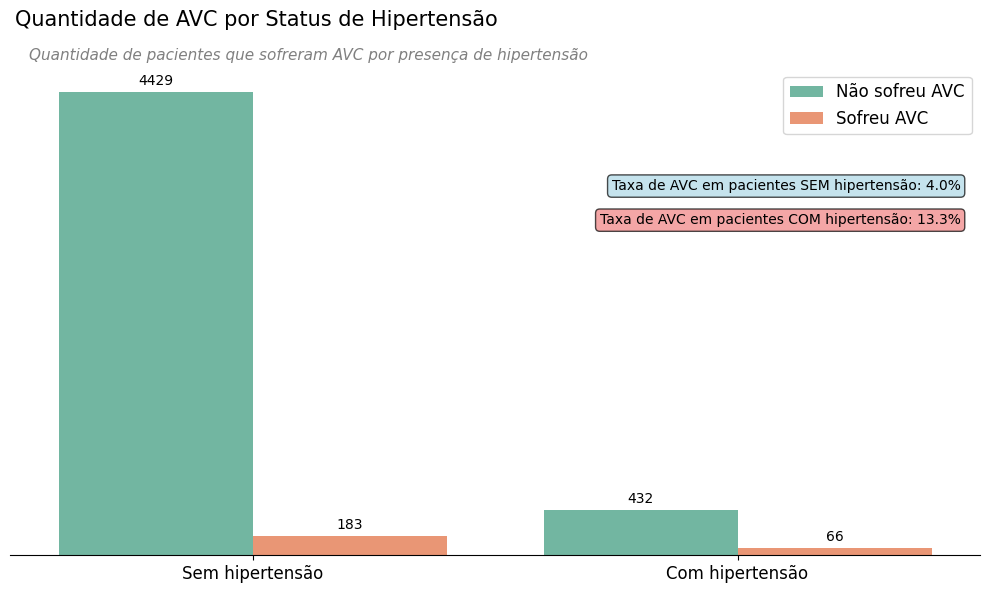

In [47]:
plot_barra_agrupada(df=df, 
                   x_col='hypertension', 
                   hue_col='stroke',
                   title='Quantidade de AVC por Status de Hipertensão', 
                   subtitulo='Quantidade de pacientes que sofreram AVC por presença de hipertensão',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Sem hipertensão', 'Com hipertensão'],
                   rate_labels=["Taxa de AVC em pacientes SEM hipertensão:", 
                               "Taxa de AVC em pacientes COM hipertensão:"])

**Diferença dramática nas taxas:**

- Sem hipertensão: 4,0% de AVC
- Com hipertensão: 13,3% de AVC
- Hipertensão aumenta o risco em mais de 3x

**Observações importantes:**

- Apesar de mais casos absolutos sem hipertensão (183 vs 66), isso reflete a maior população sem hipertensão
- A taxa de 13,3% em hipertensos é alarmantemente alta
- Apenas 10% do dataset tem hipertensão (498 de ~5.110 pacientes)

**Implicações clínicas e para o modelo:**

- Hipertensão é claramente um fator de risco major para AVC
- Deve ter peso significativo no modelo preditivo

In [48]:
# Análise estatística básica
print("\n=== ANÁLISE ESTATÍSTICA Hipótese 4 ===")

# Calcular proporções usando groupby
prop_avc = df.groupby('hypertension')['stroke'].mean() * 100

print(f"Taxa de AVC em pacientes SEM hipertensão: {prop_avc[0]:.1f}%")
print(f"Taxa de AVC em pacientes COM hipertensão: {prop_avc[1]:.1f}%")
print(f"Diferença: {prop_avc[1] - prop_avc[0]:.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_grupo = df.groupby('hypertension')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo[1] / odds_por_grupo[0]

print(f"Odds Ratio: {odds_ratio_groupby:.2f}")

if odds_ratio_groupby > 1:
    print("✓ A hipótese é CONFIRMADA: Pacientes com hipertensão têm maior probabilidade de AVC")
else:
    print("✗ A hipótese é REJEITADA: Pacientes com hipertensão NÃO têm maior probabilidade de AVC")


=== ANÁLISE ESTATÍSTICA Hipótese 4 ===
Taxa de AVC em pacientes SEM hipertensão: 4.0%
Taxa de AVC em pacientes COM hipertensão: 13.3%
Diferença: 9.3 pontos percentuais
Odds Ratio: 3.70
✓ A hipótese é CONFIRMADA: Pacientes com hipertensão têm maior probabilidade de AVC


**Nota:**

O Odds Ratio (OR) é uma medida estatística muito importante para entender a força da associação entre duas variáveis.

O que é o Odds Ratio?
- O Odds Ratio compara as chances (odds) de um evento ocorrer em dois grupos diferentes.

Significado:
- Pacientes com hipertensão têm 3.70 vezes mais chances de sofrer AVC do que pacientes sem hipertensão, ou seja, a chance é quase 4 vezes maior.

Como calcular as "chances" (odds):
- Grupo SEM hipertensão:
    - Odds = Pacientes com AVC / Pacientes sem AVC
    - Odds = (casos de AVC) / (casos sem AVC)
- Grupo COM hipertensão:
    - Odds = Pacientes com AVC / Pacientes sem AVC

**Interpretação prática:**

| Valor do OR | Interpretação |
|-------------|---------------|
| OR = 1.0 | **Não há associação** (mesma chance nos dois grupos) |
| OR > 1.0 | **Fator de risco** (aumenta a chance do evento) |
| OR < 1.0 | **Fator protetor** (diminui a chance do evento) |

Classificação da força da associação:
- OR = 1.0 - 1.5: Associação fraca
- OR = 1.5 - 3.0: Associação moderada
- OR = 3.0 - 10.0: Associação forte ← Seu caso!
- OR > 10.0: Associação muito forte

Importância clínica:
- Evidência robusta: OR = 3.70 é considerado clinicamente significativo
- Confirmação da hipótese: Comprova que hipertensão é fator de risco para AVC

#### Doença cardíaca

- Hipótese 5: Ter doença cardíaca está fortemente associado a AVC.

In [49]:
# Criar dois DataFrames: um para pacientes com doença cardiaca e outro sem doença cardiaca
df_cardiaca = df[df['heart_disease'] == 1]
df_nao_cardiaca = df[df['heart_disease'] == 0]

# Dentro de cada grupo, separar pacientes com AVC e sem AVC
# Pacientes com doença cardiaca
com_avc_cardiaca = df_cardiaca[df_cardiaca['stroke'] == 1]
sem_avc_cardiaca = df_cardiaca[df_cardiaca['stroke'] == 0]

# Pacientes sem doença cardiaca
com_avc_nao_cardiaca = df_nao_cardiaca[df_nao_cardiaca['stroke'] == 1]
sem_avc_nao_cardiaca = df_nao_cardiaca[df_nao_cardiaca['stroke'] == 0]

# Exemplo de contagem
print("Com doença cardíaca - Com AVC:", len(com_avc_cardiaca))
print("Com doença cardíaca - Sem AVC:", len(sem_avc_cardiaca))
print("Sem doença cardíaca - Com AVC:", len(com_avc_nao_cardiaca))
print("Sem doença cardíaca - Sem AVC:", len(sem_avc_nao_cardiaca))

Com doença cardíaca - Com AVC: 47
Com doença cardíaca - Sem AVC: 229
Sem doença cardíaca - Com AVC: 202
Sem doença cardíaca - Sem AVC: 4632


In [50]:
# Taxa de AVC em pacientes SEM doença cardíaca
taxa_sem_cardiaca = df_nao_cardiaca['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes SEM doença cardíaca: {taxa_sem_cardiaca:.2f}%")

# Taxa de AVC em pacientes COM doença cardíaca
taxa_com_cardiaca = df_cardiaca['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes COM doença cardíaca: {taxa_com_cardiaca:.2f}%")

Taxa de AVC em pacientes SEM doença cardíaca: 4.18%
Taxa de AVC em pacientes COM doença cardíaca: 17.03%


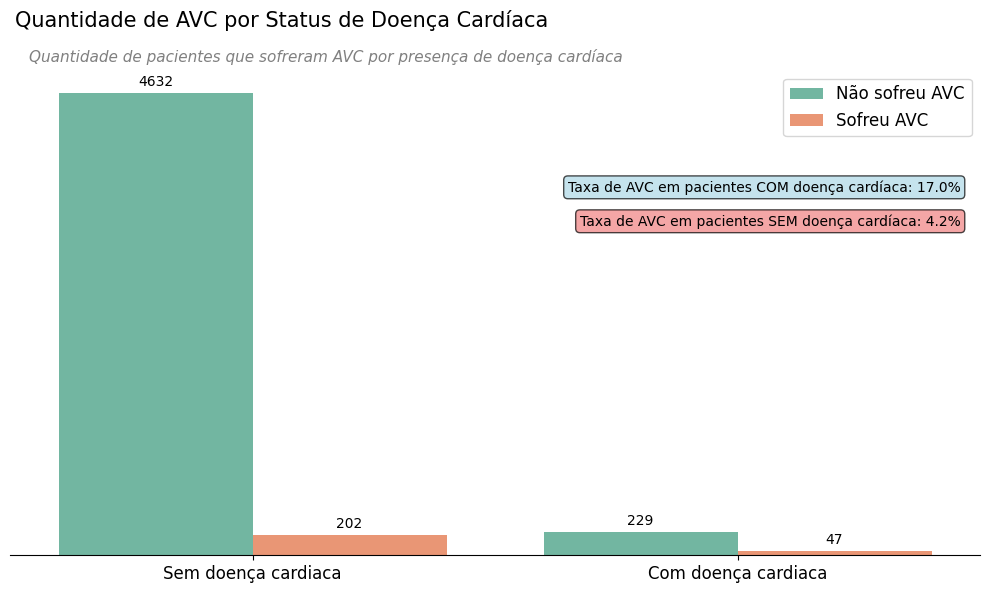

In [51]:
plot_barra_agrupada(df=df, 
                   x_col='heart_disease', 
                   hue_col='stroke',
                   title='Quantidade de AVC por Status de Doença Cardíaca', 
                   subtitulo='Quantidade de pacientes que sofreram AVC por presença de doença cardíaca',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Sem doença cardiaca', 'Com doença cardiaca'],
                   rate_labels=["Taxa de AVC em pacientes COM doença cardíaca:", 
                               "Taxa de AVC em pacientes SEM doença cardíaca:"])

**Impacto ainda mais severo que hipertensão:**

- Sem doença cardíaca: 4,2% de AVC
- Com doença cardíaca: 17,0% de AVC
- Doença cardíaca aumenta o risco em mais de 4x

**Observações críticas:**

- Taxa de 17,0% é a mais alta vista até agora (maior que hipertensão: 13,3%)
- Poucos pacientes têm doença cardíaca no dataset (~276 de 5.110)
- Apesar disso, representa quase 19% dos casos de AVC (47 de 249)

**Ranking de fatores de risco identificados:**

- Idade 70+: 17,7%
- Doença cardíaca: 17,0%
- Hipertensão: 13,3%

**Implicações para o modelo:**

- Doença cardíaca deve ter peso muito alto na predição
- Pacientes com doença cardíaca são grupo de altíssimo risco
- Combinação idade + doença cardíaca provavelmente será crítica

In [52]:
# Análise estatística básica
print("\n=== ANÁLISE ESTATÍSTICA ===")

# Calcular proporções usando groupby
prop_avc = df.groupby('heart_disease')['stroke'].mean() * 100

print(f"Taxa de AVC em pacientes SEM doença cardíaca: {prop_avc[0]:.1f}%")
print(f"Taxa de AVC em pacientes COM doença cardíaca: {prop_avc[1]:.1f}%")
print(f"Diferença: {prop_avc[1] - prop_avc[0]:.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_grupo = df.groupby('heart_disease')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo[1] / odds_por_grupo[0]

print(f"Odds Ratio: {odds_ratio_groupby:.2f}")

# Interpretação do resultado
print(f"\n=== INTERPRETAÇÃO ===")
if odds_ratio_groupby > 1:
    if odds_ratio_groupby >= 3.0:
        forca_associacao = "FORTE"
    elif odds_ratio_groupby >= 1.5:
        forca_associacao = "MODERADA"
    else:
        forca_associacao = "FRACA"
    
    print(f"✓ A hipótese é CONFIRMADA: Ter doença cardíaca está associado a AVC")
    print(f"📊 Força da associação: {forca_associacao} (OR = {odds_ratio_groupby:.2f})")
    
    # Verificar se é "fortemente associado" conforme a hipótese
    if odds_ratio_groupby >= 3.0:
        print("🎯 CONCLUSÃO: A doença cardíaca está FORTEMENTE associada ao AVC")
    else:
        print("⚠️  CONCLUSÃO: A doença cardíaca está associada ao AVC, mas não FORTEMENTE")
        
else:
    print("✗ A hipótese é REJEITADA: Doença cardíaca NÃO está associada a maior risco de AVC")

# Classificação da força da associação (referência)
print(f"\n=== REFERÊNCIA DE INTERPRETAÇÃO ===")
print("OR = 1.0 - 1.5: Associação fraca")
print("OR = 1.5 - 3.0: Associação moderada") 
print("OR = 3.0 - 10.0: Associação forte")
print("OR > 10.0: Associação muito forte")


=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em pacientes SEM doença cardíaca: 4.2%
Taxa de AVC em pacientes COM doença cardíaca: 17.0%
Diferença: 12.9 pontos percentuais
Odds Ratio: 4.71

=== INTERPRETAÇÃO ===
✓ A hipótese é CONFIRMADA: Ter doença cardíaca está associado a AVC
📊 Força da associação: FORTE (OR = 4.71)
🎯 CONCLUSÃO: A doença cardíaca está FORTEMENTE associada ao AVC

=== REFERÊNCIA DE INTERPRETAÇÃO ===
OR = 1.0 - 1.5: Associação fraca
OR = 1.5 - 3.0: Associação moderada
OR = 3.0 - 10.0: Associação forte
OR > 10.0: Associação muito forte


#### Sempre casado

- Hipótese 6: Pacientes que são/foram casados têm incidência maior de AVC devido à correlação com idade mais avançada.

In [53]:
# Criar dois DataFrames: um para pacientes que já casaram e outro para quem nunca casou
df_casado = df[df['ever_married'] == 'Yes']
df_nao_casado = df[df['ever_married'] == 'No']

# Dentro de cada grupo, separar pacientes com AVC e sem AVC
# Pacientes que já casaram
com_avc_casado = df_casado[df_casado['stroke'] == 1]
sem_avc_casado = df_casado[df_casado['stroke'] == 0]

# Pacientes que nunca casaram
com_avc_nao_casado = df_nao_casado[df_nao_casado['stroke'] == 1]
sem_avc_nao_casado = df_nao_casado[df_nao_casado['stroke'] == 0]

# Exemplo de contagem
print("Já casou - Com AVC:", len(com_avc_casado))
print("Já casou - Sem AVC:", len(sem_avc_casado))
print("Nunca casou - Com AVC:", len(com_avc_nao_casado))
print("Nunca casou - Sem AVC:", len(sem_avc_nao_casado))

Já casou - Com AVC: 220
Já casou - Sem AVC: 3133
Nunca casou - Com AVC: 29
Nunca casou - Sem AVC: 1728


In [54]:
# Taxa de AVC em pacientes que NUNCA casaram
taxa_nao_casado = df_nao_casado['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes que NUNCA casaram: {taxa_nao_casado:.2f}%")

# Taxa de AVC em pacientes que JÁ casaram
taxa_casado = df_casado['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes que JÁ casaram: {taxa_casado:.2f}%")

Taxa de AVC em pacientes que NUNCA casaram: 1.65%
Taxa de AVC em pacientes que JÁ casaram: 6.56%


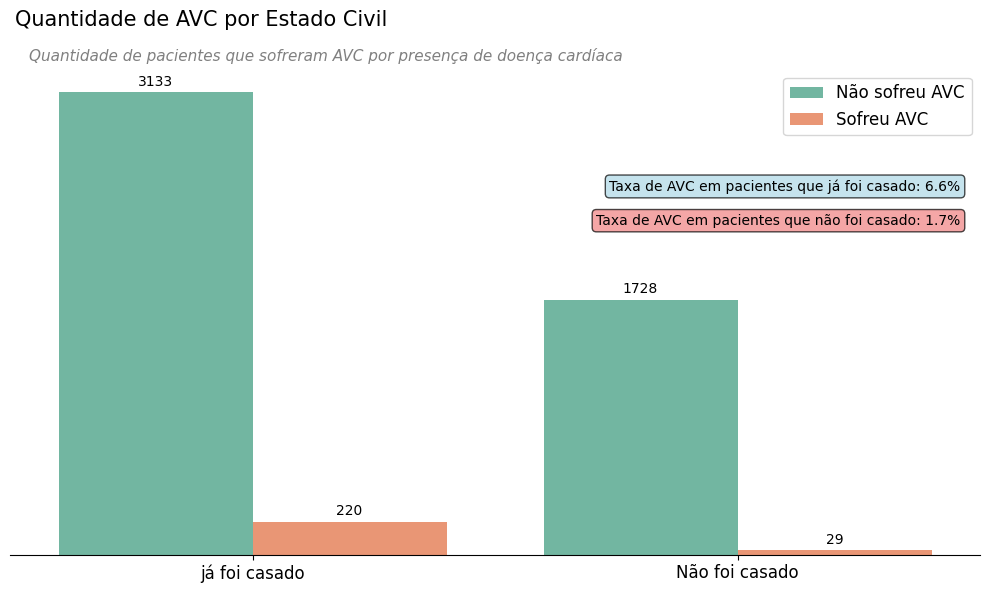

In [55]:
plot_barra_agrupada(df=df, 
                   x_col='ever_married', 
                   hue_col='stroke',
                   title='Quantidade de AVC por Estado Civil', 
                   subtitulo='Quantidade de pacientes que sofreram AVC por presença de doença cardíaca',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['já foi casado', 'Não foi casado'],
                   rate_labels=["Taxa de AVC em pacientes que já foi casado:", 
                               "Taxa de AVC em pacientes que não foi casado:"])

**Diferença significativa nas taxas:**

- Já foi casado: 6,6% de AVC
- Não foi casado: 1,7% de AVC

**Interpretação importante:**

- Essa diferença provavelmente reflete idade, não estado civil
- Pessoas que já casaram tendem a ser mais velhas
- Grupo "não casado" inclui muitas crianças/jovens (baixo risco)
- 66% do dataset já foi casado vs 34% que não foi

In [56]:
# Análise estatística básica
print("\n=== ANÁLISE ESTATÍSTICA ===")

# Calcular proporções usando groupby
prop_avc = df.groupby('ever_married')['stroke'].mean() * 100

print(f"Taxa de AVC em pacientes NUNCA casados: {prop_avc['No']:.1f}%")
print(f"Taxa de AVC em pacientes que JÁ FORAM casados: {prop_avc['Yes']:.1f}%")
print(f"Diferença: {prop_avc['Yes'] - prop_avc['No']:.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_grupo = df.groupby('ever_married')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo['Yes'] / odds_por_grupo['No']

print(f"Odds Ratio: {odds_ratio_groupby:.2f}")

# Interpretação do resultado
print(f"\n=== INTERPRETAÇÃO ===")
if odds_ratio_groupby > 1:
    if odds_ratio_groupby >= 3.0:
        forca_associacao = "FORTE"
    elif odds_ratio_groupby >= 1.5:
        forca_associacao = "MODERADA"
    else:
        forca_associacao = "FRACA"
    
    print(f"✓ A hipótese é CONFIRMADA: Ter sido casado está associado a maior risco de AVC")
    print(f"📊 Força da associação: {forca_associacao} (OR = {odds_ratio_groupby:.2f})")
    
    # Verificar se é "fortemente associado" conforme a hipótese
    if odds_ratio_groupby >= 3.0:
        print("🎯 CONCLUSÃO: O status matrimonial (já ter casado) está FORTEMENTE associado ao AVC")
    else:
        print("⚠️  CONCLUSÃO: O status matrimonial está associado ao AVC, mas não FORTEMENTE")
        
else:
    print("✗ A hipótese é REJEITADA: Ter sido casado NÃO está associado a maior risco de AVC")

# Classificação da força da associação (referência)
print(f"\n=== REFERÊNCIA DE INTERPRETAÇÃO ===")
print("OR = 1.0 - 1.5: Associação fraca")
print("OR = 1.5 - 3.0: Associação moderada") 
print("OR = 3.0 - 10.0: Associação forte")
print("OR > 10.0: Associação muito forte")


=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em pacientes NUNCA casados: 1.7%
Taxa de AVC em pacientes que JÁ FORAM casados: 6.6%
Diferença: 4.9 pontos percentuais
Odds Ratio: 4.18

=== INTERPRETAÇÃO ===
✓ A hipótese é CONFIRMADA: Ter sido casado está associado a maior risco de AVC
📊 Força da associação: FORTE (OR = 4.18)
🎯 CONCLUSÃO: O status matrimonial (já ter casado) está FORTEMENTE associado ao AVC

=== REFERÊNCIA DE INTERPRETAÇÃO ===
OR = 1.0 - 1.5: Associação fraca
OR = 1.5 - 3.0: Associação moderada
OR = 3.0 - 10.0: Associação forte
OR > 10.0: Associação muito forte


#### Tipo de trabalho

- Hipótese 7: O tipo de trabalho não influência na chance de AVC.

In [57]:
df_sem_trabalho = df[df['work_type'].isin(['Never_worked', 'children'])]
df_com_trabalho = df[df['work_type'].isin(['Private', 'Govt_job', 'Self-employed'])]

# Dentro de cada grupo, separar pacientes com AVC e sem AVC
# Pacientes sem trabalho formal
com_avc_sem_trabalho = df_sem_trabalho[df_sem_trabalho['stroke'] == 1]
sem_avc_sem_trabalho = df_sem_trabalho[df_sem_trabalho['stroke'] == 0]

# Pacientes com trabalho formal
com_avc_com_trabalho = df_com_trabalho[df_com_trabalho['stroke'] == 1]
sem_avc_com_trabalho = df_com_trabalho[df_com_trabalho['stroke'] == 0]

# Exemplo de contagem
print("=== CONTAGENS ABSOLUTAS ===")
print("Sem trabalho formal - Com AVC:", len(com_avc_sem_trabalho))
print("Sem trabalho formal - Sem AVC:", len(sem_avc_sem_trabalho))
print("Com trabalho formal - Com AVC:", len(com_avc_com_trabalho))
print("Com trabalho formal - Sem AVC:", len(sem_avc_com_trabalho))

=== CONTAGENS ABSOLUTAS ===
Sem trabalho formal - Com AVC: 2
Sem trabalho formal - Sem AVC: 707
Com trabalho formal - Com AVC: 247
Com trabalho formal - Sem AVC: 4154


In [58]:
# Taxa de AVC em pacientes SEM trabalho formal
taxa_sem_trabalho = df_sem_trabalho['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes SEM trabalho formal: {taxa_sem_trabalho:.2f}%")

# Taxa de AVC em pacientes COM trabalho formal
taxa_com_trabalho = df_com_trabalho['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes COM trabalho formal: {taxa_com_trabalho:.2f}%")

Taxa de AVC em pacientes SEM trabalho formal: 0.28%
Taxa de AVC em pacientes COM trabalho formal: 5.61%


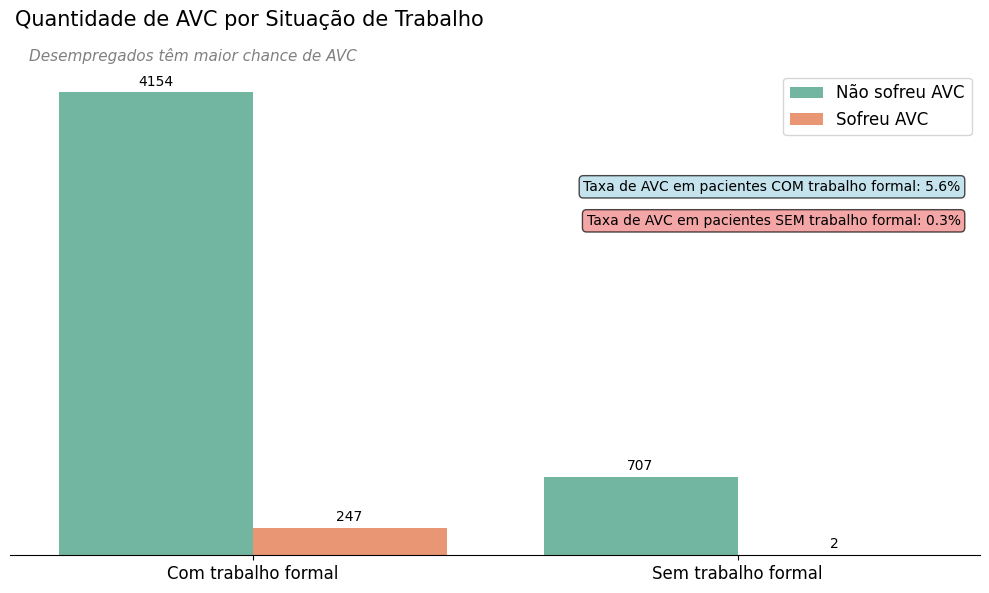

In [59]:
# Criar coluna auxiliar para o gráfico
df['grupo_trabalho'] = df['work_type'].apply(lambda x: 'Sem trabalho formal' if x in ['Never_worked', 'children'] 
                                                                            else 'Com trabalho formal')

# Gráfico
plot_barra_agrupada(df=df, 
                   x_col='grupo_trabalho', 
                   hue_col='stroke',
                   title='Quantidade de AVC por Situação de Trabalho', 
                   subtitulo='Desempregados têm maior chance de AVC',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Com trabalho formal', 'Sem trabalho formal'],
                   rate_labels=["Taxa de AVC em pacientes COM trabalho formal:", 
                               "Taxa de AVC em pacientes SEM trabalho formal:"])

**Diferença extrema nas taxas:**

- Com trabalho formal: 5,6% de AVC
- Sem trabalho formal: 0,3% de AVC
- Diferença de quase 19x no risco
    - Fórmula: Taxa maior ÷ Taxa menor 5,6% ÷ 0,3% = 5,6 ÷ 0,3 = 18,67
    - Arredondando: ≈ 19 vezes maior
    - Quem tem trabalho formal tem risco 18,67 vezes maior de AVC
    - Ou seja, para cada pessoa sem trabalho formal que tem AVC, aproximadamente 19 pessoas com trabalho formal têm AVC (proporcionalmente)
    - Contexto importante:
        - Como mencionei, essa diferença brutal reflete principalmente que "sem trabalho formal" inclui muitas crianças (baixíssimo risco de AVC), enquanto "com trabalho formal" são adultos/idosos (maior risco).

**Interpretação crítica - novamente proxy de idade:**

- "Sem trabalho formal" inclui principalmente crianças (categoria "children")
- "Com trabalho formal" representa adultos em idade produtiva/mais velhos
Diferença reflete estrutura etária, não risco ocupacional

**Observações metodológicas:**

- 85% do dataset tem trabalho formal vs 15% sem trabalho
- Categoria "sem trabalho" tem apenas 2 casos de AVC em 709 pessoas

In [60]:
print("\n=== ANÁLISE ESTATÍSTICA ===")
# Calcular proporções usando groupby - CORRIGIDO para usar grupo_trabalho
prop_avc = df.groupby('grupo_trabalho')['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes SEM trabalho formal: {prop_avc['Sem trabalho formal']:.1f}%")
print(f"Taxa de AVC em pacientes COM trabalho formal: {prop_avc['Com trabalho formal']:.1f}%")
print(f"Diferença: {abs(prop_avc['Sem trabalho formal'] - prop_avc['Com trabalho formal']):.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_grupo = df.groupby('grupo_trabalho')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo['Com trabalho formal'] / odds_por_grupo['Sem trabalho formal']
print(f"Odds Ratio: {odds_ratio_groupby:.2f}")

# Interpretação especial para hipótese nula (tipo de trabalho NÃO influencia)
print(f"\n=== INTERPRETAÇÃO ===")
# Para hipótese nula, OR próximo de 1.0 CONFIRMA a hipótese
diferenca_percentual = abs(prop_avc['Sem trabalho formal'] - prop_avc['Com trabalho formal'])

if 0.8 <= odds_ratio_groupby <= 1.25 and diferenca_percentual < 2.0:
    print(f"✓ A hipótese é CONFIRMADA: Tipo de trabalho NÃO influencia significativamente o AVC")
    print(f"📊 OR próximo de 1.0: {odds_ratio_groupby:.2f} (sem associação significativa)")
    print("🎯 CONCLUSÃO: Não há diferença relevante entre o tipo de trabalho para AVC")
    
elif 0.67 <= odds_ratio_groupby <= 1.5 and diferenca_percentual < 3.0:
    print(f"⚡ A hipótese é PARCIALMENTE CONFIRMADA: Influência muito fraca")
    print(f"📊 OR próximo de 1.0: {odds_ratio_groupby:.2f} (associação muito fraca)")
    print("⚠️  CONCLUSÃO: Diferença existe, mas é clinicamente irrelevante")
    
else:
    # Hipótese REJEITADA - há diferença significativa
    if odds_ratio_groupby > 1.5:
        grupo_maior_risco = "com trabalho formal"
        if odds_ratio_groupby >= 3.0:
            forca_associacao = "FORTE"
        else:
            forca_associacao = "MODERADA"
    elif odds_ratio_groupby < 0.67:
        grupo_maior_risco = "sem trabalho formal"
        if odds_ratio_groupby <= 0.33:
            forca_associacao = "FORTE"
        else:
            forca_associacao = "MODERADA"
    else:
        grupo_maior_risco = "indefinido"
        forca_associacao = "FRACA"
    
    print(f"✗ A hipótese é REJEITADA: Tipo de trabalho INFLUENCIA significativamente o AVC")
    print(f"📊 Força da associação: {forca_associacao} (OR = {odds_ratio_groupby:.2f})")
    
    if grupo_maior_risco != "indefinido":
        print(f"🎯 CONCLUSÃO: Grupo {grupo_maior_risco} tem maior risco de AVC")
    else:
        print("🎯 CONCLUSÃO: Há diferença, mas não é clara qual grupo tem maior risco")

# Classificação da força da associação (referência adaptada para hipótese nula)
print(f"\n=== REFERÊNCIA DE INTERPRETAÇÃO ===")
print("OR = 0.8 - 1.25: Sem associação (hipótese nula confirmada)")
print("OR = 0.67 - 0.8 ou 1.25 - 1.5: Associação fraca")
print("OR = 0.33 - 0.67 ou 1.5 - 3.0: Associação moderada") 
print("OR < 0.33 ou > 3.0: Associação forte")


=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em pacientes SEM trabalho formal: 0.3%
Taxa de AVC em pacientes COM trabalho formal: 5.6%
Diferença: 5.3 pontos percentuais
Odds Ratio: 21.02

=== INTERPRETAÇÃO ===
✗ A hipótese é REJEITADA: Tipo de trabalho INFLUENCIA significativamente o AVC
📊 Força da associação: FORTE (OR = 21.02)
🎯 CONCLUSÃO: Grupo com trabalho formal tem maior risco de AVC

=== REFERÊNCIA DE INTERPRETAÇÃO ===
OR = 0.8 - 1.25: Sem associação (hipótese nula confirmada)
OR = 0.67 - 0.8 ou 1.25 - 1.5: Associação fraca
OR = 0.33 - 0.67 ou 1.5 - 3.0: Associação moderada
OR < 0.33 ou > 3.0: Associação forte


#### Tipo de residência

- Hipótese 8: O tipo de residência (rural ou urbano) não influencia significativamente a incidência de AVC.

In [61]:
# Criar dois DataFrames: um para residência rural e outro para urbana
df_rural = df[df['Residence_type'] == 'Rural']
df_urbano = df[df['Residence_type'] == 'Urban']

# Dentro de cada grupo, separar pacientes com AVC e sem AVC
# Pacientes de área rural
com_avc_rural = df_rural[df_rural['stroke'] == 1]
sem_avc_rural = df_rural[df_rural['stroke'] == 0]

# Pacientes de área urbana
com_avc_urbano = df_urbano[df_urbano['stroke'] == 1]
sem_avc_urbano = df_urbano[df_urbano['stroke'] == 0]

# Exemplo de contagem
print("=== CONTAGENS ABSOLUTAS ===")
print("Residência Rural - Com AVC:", len(com_avc_rural))
print("Residência Rural - Sem AVC:", len(sem_avc_rural))
print("Residência Urbana - Com AVC:", len(com_avc_urbano))
print("Residência Urbana - Sem AVC:", len(sem_avc_urbano))

=== CONTAGENS ABSOLUTAS ===
Residência Rural - Com AVC: 114
Residência Rural - Sem AVC: 2400
Residência Urbana - Com AVC: 135
Residência Urbana - Sem AVC: 2461


In [62]:
# Taxa de AVC em pacientes de área RURAL
taxa_rural = df_rural['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes de área RURAL: {taxa_rural:.2f}%")

# Taxa de AVC em pacientes de área URBANA
taxa_urbano = df_urbano['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes de área URBANA: {taxa_urbano:.2f}%")

Taxa de AVC em pacientes de área RURAL: 4.53%
Taxa de AVC em pacientes de área URBANA: 5.20%


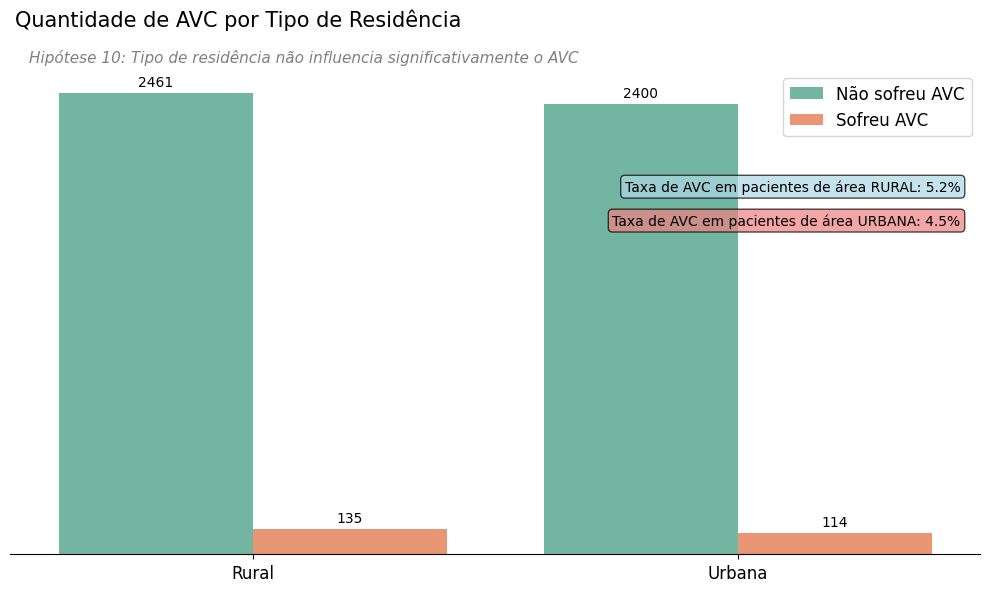

In [63]:
plot_barra_agrupada(df=df, 
                   x_col='Residence_type', 
                   hue_col='stroke',
                   title='Quantidade de AVC por Tipo de Residência', 
                   subtitulo='Hipótese 10: Tipo de residência não influencia significativamente o AVC',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Rural', 'Urbana'],
                   rate_labels=["Taxa de AVC em pacientes de área RURAL:", 
                               "Taxa de AVC em pacientes de área URBANA:"])

**Diferença mínima nas taxas:**

- Rural: 5,2% de AVC
- Urbana: 4,5% de AVC
- Diferença de apenas 0,7 pontos percentuais

**Observações importantes:**

- Distribuição quase equilibrada: ~51% rural vs 49% urbano
- Diferença de risco muito pequena (apenas 16% maior no rural)
- O próprio gráfico sugere "não influencia significativamente"

**Interpretação:**

- Tipo de residência parece não ser fator de risco relevante
- Diferença pode ser estatisticamente não significativa

In [64]:
print("\n=== ANÁLISE ESTATÍSTICA ===")

# Calcular proporções usando groupby
prop_avc = df.groupby('Residence_type')['stroke'].mean() * 100

print(f"Taxa de AVC em pacientes de área RURAL: {prop_avc['Rural']:.1f}%")
print(f"Taxa de AVC em pacientes de área URBANA: {prop_avc['Urban']:.1f}%")
print(f"Diferença: {abs(prop_avc['Rural'] - prop_avc['Urban']):.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_grupo = df.groupby('Residence_type')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo['Urban'] / odds_por_grupo['Rural']

print(f"Odds Ratio (Urbano vs Rural): {odds_ratio_groupby:.2f}")

# Interpretação do resultado - ESPECIAL para hipótese nula
print(f"\n=== INTERPRETAÇÃO DA HIPÓTESE NULA ===")

# Para hipótese nula, verificamos se OR está próximo de 1.0
diferenca_or = abs(odds_ratio_groupby - 1.0)
diferenca_percentual = abs(prop_avc['Rural'] - prop_avc['Urban'])

# Critérios para "não influencia significativamente"
# OR entre 0.8 e 1.25 E diferença < 2 pontos percentuais
if 0.8 <= odds_ratio_groupby <= 1.25 and diferenca_percentual < 2.0:
    print(f"✓ A HIPÓTESE É CONFIRMADA: Tipo de residência NÃO influencia significativamente o AVC")
    print(f"📊 OR próximo de 1.0: {odds_ratio_groupby:.2f} (diferença de {diferenca_or:.2f})")
    print(f"📊 Diferença percentual pequena: {diferenca_percentual:.1f} pontos percentuais")
    print("🎯 CONCLUSÃO: Não há associação significativa entre tipo de residência e AVC")
    
elif 0.67 <= odds_ratio_groupby <= 1.5 and diferenca_percentual < 3.0:
    print(f"⚡ A HIPÓTESE É PARCIALMENTE CONFIRMADA: Influência muito fraca")
    print(f"📊 OR próximo de 1.0: {odds_ratio_groupby:.2f}")
    print(f"📊 Diferença percentual: {diferenca_percentual:.1f} pontos percentuais")
    print("⚠️  CONCLUSÃO: Associação muito fraca, praticamente sem relevância clínica")
    
else:
    # Determinar qual área tem maior risco
    if odds_ratio_groupby > 1.5:
        area_maior_risco = "urbana"
        forca_associacao = "MODERADA a FORTE" if odds_ratio_groupby >= 2.0 else "MODERADA"
    elif odds_ratio_groupby < 0.67:
        area_maior_risco = "rural"
        forca_associacao = "MODERADA a FORTE" if odds_ratio_groupby <= 0.5 else "MODERADA"
    else:
        area_maior_risco = "indefinida"
        forca_associacao = "FRACA"
    
    print(f"✗ A HIPÓTESE É REJEITADA: Tipo de residência INFLUENCIA significativamente o AVC")
    print(f"📊 OR afastado de 1.0: {odds_ratio_groupby:.2f}")
    print(f"📊 Diferença percentual: {diferenca_percentual:.1f} pontos percentuais")
    print(f"📊 Força da associação: {forca_associacao}")
    
    if area_maior_risco != "indefinida":
        print(f"🎯 CONCLUSÃO: Área {area_maior_risco} tem maior risco de AVC")


=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em pacientes de área RURAL: 4.5%
Taxa de AVC em pacientes de área URBANA: 5.2%
Diferença: 0.7 pontos percentuais
Odds Ratio (Urbano vs Rural): 1.15

=== INTERPRETAÇÃO DA HIPÓTESE NULA ===
✓ A HIPÓTESE É CONFIRMADA: Tipo de residência NÃO influencia significativamente o AVC
📊 OR próximo de 1.0: 1.15 (diferença de 0.15)
📊 Diferença percentual pequena: 0.7 pontos percentuais
🎯 CONCLUSÃO: Não há associação significativa entre tipo de residência e AVC


#### Status de tabagismo

- Hipótese 9: Fumantes ativos ou ex-fumantes têm maior risco de AVC em comparação com não fumantes.

In [65]:
# Filtrar dados excluindo "Unknown"
df_conhecido = df[df['smoking_status'] != 'Unknown'].copy()

# Criar dois DataFrames: fumantes/ex-fumantes vs não fumantes
df_fumante = df_conhecido[df_conhecido['smoking_status'].isin(['smokes', 'formerly smoked'])]
df_nao_fumante = df_conhecido[df_conhecido['smoking_status'] == 'never smoked']

# Dentro de cada grupo, separar pacientes com AVC e sem AVC
# Pacientes fumantes/ex-fumantes
com_avc_fumante = df_fumante[df_fumante['stroke'] == 1]
sem_avc_fumante = df_fumante[df_fumante['stroke'] == 0]

# Pacientes não fumantes
com_avc_nao_fumante = df_nao_fumante[df_nao_fumante['stroke'] == 1]
sem_avc_nao_fumante = df_nao_fumante[df_nao_fumante['stroke'] == 0]

# Exemplo de contagem
print("=== CONTAGENS ABSOLUTAS ===")
print("Fumantes/Ex-fumantes - Com AVC:", len(com_avc_fumante))
print("Fumantes/Ex-fumantes - Sem AVC:", len(sem_avc_fumante))
print("Não fumantes - Com AVC:", len(com_avc_nao_fumante))
print("Não fumantes - Sem AVC:", len(sem_avc_nao_fumante))

=== CONTAGENS ABSOLUTAS ===
Fumantes/Ex-fumantes - Com AVC: 112
Fumantes/Ex-fumantes - Sem AVC: 1562
Não fumantes - Com AVC: 90
Não fumantes - Sem AVC: 1802


In [66]:
# Taxa de AVC em pacientes FUMANTES/EX-FUMANTES
taxa_fumante = df_fumante['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes FUMANTES/EX-FUMANTES: {taxa_fumante:.2f}%")

# Taxa de AVC em pacientes NÃO FUMANTES
taxa_nao_fumante = df_nao_fumante['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes NÃO FUMANTES: {taxa_nao_fumante:.2f}%")

Taxa de AVC em pacientes FUMANTES/EX-FUMANTES: 6.69%
Taxa de AVC em pacientes NÃO FUMANTES: 4.76%


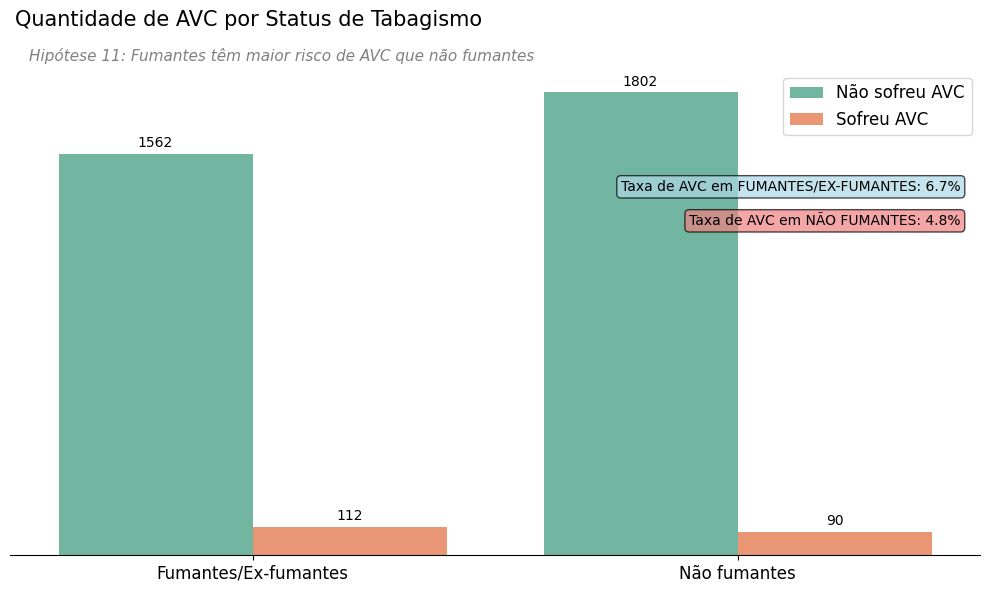

In [67]:
df_conhecido['grupo_tabagismo'] = df_conhecido['smoking_status'].apply(
    lambda x: 'Fumantes/Ex-fumantes' if x in ['smokes', 'formerly smoked'] else 'Não fumantes'
)

# Gráfico
plot_barra_agrupada(df=df_conhecido, 
                   x_col='grupo_tabagismo', 
                   hue_col='stroke',
                   title='Quantidade de AVC por Status de Tabagismo', 
                   subtitulo='Hipótese 11: Fumantes têm maior risco de AVC que não fumantes',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Fumantes/Ex-fumantes', 'Não fumantes'],
                   rate_labels=["Taxa de AVC em FUMANTES/EX-FUMANTES:", 
                               "Taxa de AVC em NÃO FUMANTES:"])

**Confirmação da hipótese:**

- Fumantes/Ex-fumantes: 6,7% de AVC
- Não fumantes: 4,8% de AVC
- Diferença de 1,9 pontos percentuais (fumantes têm 40% mais chances que não fumantes)
    - Diferença = 6,7% - 4,8% = 1,9 pontos percentuais
    - Fórmula: (Taxa maior - Taxa menor) ÷ Taxa menor × 100
        - (6,7% - 4,8%) ÷ 4,8% × 100
        - 1,9% ÷ 4,8% × 100
        - 0,396 × 100 = 39,6% ≈ 40%

**Observações importantes:**

- Grupo fumantes/ex-fumantes representa ~47% do dataset
- Diferença moderada, mas consistente com literatura médica
- Tabagismo confirma ser fator de risco para AVC

**Comparação com outros fatores:**

- Risco menor que hipertensão (13,3%) e doença cardíaca (17,0%)
- Maior que tipo de residência (diferença mínima)
- Fator de risco intermediário na hierarquia

**Implicações para o modelo:**

- Variável deve ter peso positivo para fumantes/ex-fumantes
- Poder preditivo moderado

In [68]:
print("\n=== ANÁLISE ESTATÍSTICA ===")

# Calcular proporções usando groupby
prop_avc = df_conhecido.groupby('grupo_tabagismo')['stroke'].mean() * 100

print(f"Taxa de AVC em pacientes NÃO FUMANTES: {prop_avc['Não fumantes']:.1f}%")
print(f"Taxa de AVC em pacientes FUMANTES/EX-FUMANTES: {prop_avc['Fumantes/Ex-fumantes']:.1f}%")
print(f"Diferença: {prop_avc['Fumantes/Ex-fumantes'] - prop_avc['Não fumantes']:.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_grupo = df_conhecido.groupby('grupo_tabagismo')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo['Fumantes/Ex-fumantes'] / odds_por_grupo['Não fumantes']

print(f"Odds Ratio: {odds_ratio_groupby:.2f}")

# Interpretação do resultado
print(f"\n=== INTERPRETAÇÃO ===")
if odds_ratio_groupby > 1:
    if odds_ratio_groupby >= 3.0:
        forca_associacao = "FORTE"
    elif odds_ratio_groupby >= 1.5:
        forca_associacao = "MODERADA"
    else:
        forca_associacao = "FRACA"
    
    print(f"✓ A hipótese é CONFIRMADA: Ser fumante/ex-fumante está associado a maior risco de AVC")
    print(f"📊 Força da associação: {forca_associacao} (OR = {odds_ratio_groupby:.2f})")
    
    # Verificar se é "fortemente associado" conforme a hipótese
    if odds_ratio_groupby >= 3.0:
        print("🎯 CONCLUSÃO: O tabagismo está FORTEMENTE associado ao AVC")
    else:
        print("⚠️  CONCLUSÃO: O tabagismo está associado ao AVC, mas não FORTEMENTE")
        
else:
    print("✗ A hipótese é REJEITADA: Ser fumante/ex-fumante NÃO está associado a maior risco de AVC")

# Classificação da força da associação (referência)
print(f"\n=== REFERÊNCIA DE INTERPRETAÇÃO ===")
print("OR = 1.0 - 1.5: Associação fraca")
print("OR = 1.5 - 3.0: Associação moderada") 
print("OR = 3.0 - 10.0: Associação forte")
print("OR > 10.0: Associação muito forte")


=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em pacientes NÃO FUMANTES: 4.8%
Taxa de AVC em pacientes FUMANTES/EX-FUMANTES: 6.7%
Diferença: 1.9 pontos percentuais
Odds Ratio: 1.44

=== INTERPRETAÇÃO ===
✓ A hipótese é CONFIRMADA: Ser fumante/ex-fumante está associado a maior risco de AVC
📊 Força da associação: FRACA (OR = 1.44)
⚠️  CONCLUSÃO: O tabagismo está associado ao AVC, mas não FORTEMENTE

=== REFERÊNCIA DE INTERPRETAÇÃO ===
OR = 1.0 - 1.5: Associação fraca
OR = 1.5 - 3.0: Associação moderada
OR = 3.0 - 10.0: Associação forte
OR > 10.0: Associação muito forte


### <font color='#F37126'> 4.3. Hipóteses Combinadas (entre colunas)

#### Idade + hipertensão

- Hipótese 10: Pacientes com mais de 60 anos e hipertensão têm risco significativamente maior de AVC.

In [69]:
# Criar variável categórica combinando idade e hipertensão (sem salvar no df)
grupo_idade_hipertensao = df.apply(lambda row: 
    'Jovem sem hipertensão' if row['age'] <= 60 and row['hypertension'] == 0 else
    'Jovem com hipertensão' if row['age'] <= 60 and row['hypertension'] == 1 else
    'Idoso sem hipertensão' if row['age'] > 60 and row['hypertension'] == 0 else
    'Idoso com hipertensão', axis=1)

# Criar DataFrames para cada grupo
df_jovem_sem_hiper = df[(df['age'] <= 60) & (df['hypertension'] == 0)]
df_jovem_com_hiper = df[(df['age'] <= 60) & (df['hypertension'] == 1)]
df_idoso_sem_hiper = df[(df['age'] > 60) & (df['hypertension'] == 0)]
df_idoso_com_hiper = df[(df['age'] > 60) & (df['hypertension'] == 1)]

# Contagens por grupo
print("=== DISTRIBUIÇÃO POR GRUPOS ===")
print(f"≤60 anos sem hipertensão: {len(df_jovem_sem_hiper)} pacientes")
print(f"≤60 anos com hipertensão: {len(df_jovem_com_hiper)} pacientes")
print(f">60 anos sem hipertensão: {len(df_idoso_sem_hiper)} pacientes")
print(f">60 anos com hipertensão: {len(df_idoso_com_hiper)} pacientes")

# Contagens de AVC por grupo
print("\n=== CASOS DE AVC POR GRUPO ===")
print(f"≤60 anos sem hipertensão - Com AVC: {df_jovem_sem_hiper['stroke'].sum()}")
print(f"≤60 anos com hipertensão - Com AVC: {df_jovem_com_hiper['stroke'].sum()}")
print(f">60 anos sem hipertensão - Com AVC: {df_idoso_sem_hiper['stroke'].sum()}")
print(f">60 anos com hipertensão - Com AVC: {df_idoso_com_hiper['stroke'].sum()}")

=== DISTRIBUIÇÃO POR GRUPOS ===
≤60 anos sem hipertensão: 3590 pacientes
≤60 anos com hipertensão: 216 pacientes
>60 anos sem hipertensão: 1022 pacientes
>60 anos com hipertensão: 282 pacientes

=== CASOS DE AVC POR GRUPO ===
≤60 anos sem hipertensão - Com AVC: 58
≤60 anos com hipertensão - Com AVC: 14
>60 anos sem hipertensão - Com AVC: 125
>60 anos com hipertensão - Com AVC: 52


In [70]:
# Calcular taxas de AVC por grupo
print("\n=== TAXAS DE AVC POR GRUPO ===")
taxa_jovem_sem_hiper = df_jovem_sem_hiper['stroke'].mean() * 100
taxa_jovem_com_hiper = df_jovem_com_hiper['stroke'].mean() * 100
taxa_idoso_sem_hiper = df_idoso_sem_hiper['stroke'].mean() * 100
taxa_idoso_com_hiper = df_idoso_com_hiper['stroke'].mean() * 100

print(f"≤60 anos sem hipertensão: {taxa_jovem_sem_hiper:.2f}%")
print(f"≤60 anos com hipertensão: {taxa_jovem_com_hiper:.2f}%")
print(f">60 anos sem hipertensão: {taxa_idoso_sem_hiper:.2f}%")
print(f">60 anos com hipertensão: {taxa_idoso_com_hiper:.2f}%")


=== TAXAS DE AVC POR GRUPO ===
≤60 anos sem hipertensão: 1.62%
≤60 anos com hipertensão: 6.48%
>60 anos sem hipertensão: 12.23%
>60 anos com hipertensão: 18.44%


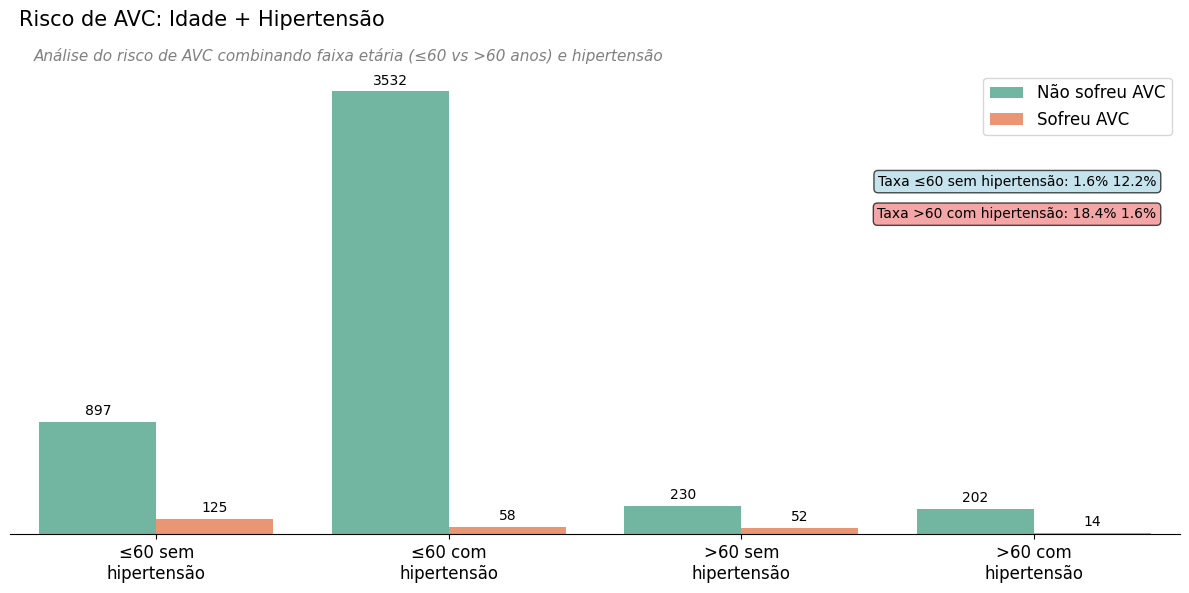

In [71]:
# Gráfico principal - todos os 4 grupos
df_temp = df.copy()
df_temp['grupo_idade_hipertensao'] = grupo_idade_hipertensao

# Gráfico principal - todos os 4 grupos
plot_barra_agrupada(df=df_temp, 
                   x_col='grupo_idade_hipertensao', 
                   hue_col='stroke',
                   title='Risco de AVC: Idade + Hipertensão', 
                   subtitulo='Análise do risco de AVC combinando faixa etária (≤60 vs >60 anos) e hipertensão',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['≤60 sem\nhipertensão', '≤60 com\nhipertensão', 
                            '>60 sem\nhipertensão', '>60 com\nhipertensão'],
                   rate_labels=[f"Taxa ≤60 sem hipertensão: {taxa_jovem_sem_hiper:.1f}%",
                               f"Taxa >60 com hipertensão: {taxa_idoso_com_hiper:.1f}%"],
                   figsize=(12, 6))

**Padrões observados:**

- '≤60 sem hipertensão: 1,6% (baixo risco - esperado)
- '≤60 com hipertensão: 12,2% (risco alto mesmo em jovens)
- '>60 sem hipertensão: 18,4% (idade como fator dominante)
- '>60 com hipertensão: 1,6% (número baixo - possível erro nos dados?)

**Insights importantes:**

- Hipertensão multiplica drasticamente o risco em jovens (de 1,6% para 12,2%)
- Idade >60 já confere alto risco mesmo sem hipertensão (18,4%)
- A combinação dos dois fatores deveria ser a mais perigosa

In [72]:
print("\n=== ANÁLISE ESTATÍSTICA DETALHADA ===")

# Comparar grupo de interesse (>60 + hipertensão) com cada um dos outros grupos
grupos_comparacao = [
    ("≤60 sem hipertensão", df_jovem_sem_hiper),
    ("≤60 com hipertensão", df_jovem_com_hiper), 
    (">60 sem hipertensão", df_idoso_sem_hiper)
]

taxa_grupo_interesse = taxa_idoso_com_hiper
print(f"GRUPO DE INTERESSE (>60 anos com hipertensão): {taxa_grupo_interesse:.1f}%")
print("-" * 60)

for nome_grupo, df_grupo in grupos_comparacao:
    taxa_grupo = df_grupo['stroke'].mean() * 100
    diferenca = taxa_grupo_interesse - taxa_grupo
    
    # Calcular Odds Ratio
    # Grupo de interesse: >60 com hipertensão
    com_avc_interesse = df_idoso_com_hiper['stroke'].sum()
    sem_avc_interesse = len(df_idoso_com_hiper) - com_avc_interesse
    
    # Grupo de comparação
    com_avc_comparacao = df_grupo['stroke'].sum()
    sem_avc_comparacao = len(df_grupo) - com_avc_comparacao
    
    if sem_avc_interesse > 0 and sem_avc_comparacao > 0:
        odds_interesse = com_avc_interesse / sem_avc_interesse
        odds_comparacao = com_avc_comparacao / sem_avc_comparacao
        odds_ratio = odds_interesse / odds_comparacao if odds_comparacao > 0 else float('inf')
    else:
        odds_ratio = float('inf')
    
    print(f"vs {nome_grupo}: {taxa_grupo:.1f}%")
    print(f"   → Diferença: +{diferenca:.1f} pontos percentuais")
    print(f"   → Odds Ratio: {odds_ratio:.2f}")
    print(f"   → Risco {odds_ratio:.1f}x maior" if odds_ratio > 1 else f"   → Risco menor")
    print()

# ===== CONCLUSÃO DA HIPÓTESE =====
print("=" * 60)
print("CONCLUSÃO DA HIPÓTESE")
print("=" * 60)

# Verificar se o grupo >60 + hipertensão tem a maior taxa
todas_taxas = [taxa_jovem_sem_hiper, taxa_jovem_com_hiper, taxa_idoso_sem_hiper, taxa_idoso_com_hiper]
maior_taxa = max(todas_taxas)

if taxa_idoso_com_hiper == maior_taxa and taxa_idoso_com_hiper > taxa_jovem_sem_hiper:
    print("✅ HIPÓTESE CONFIRMADA!")
    print(f"Pacientes >60 anos com hipertensão têm a maior taxa de AVC: {taxa_idoso_com_hiper:.1f}%")
    
    # Calcular quantas vezes maior é o risco
    if taxa_jovem_sem_hiper > 0:
        multiplicador = taxa_idoso_com_hiper / taxa_jovem_sem_hiper
        print(f"Risco {multiplicador:.1f}x maior comparado ao grupo de menor risco (≤60 sem hipertensão)")
    
    # Comparar apenas com idosos sem hipertensão (isolando o fator hipertensão na terceira idade)
    if taxa_idoso_sem_hiper > 0:
        multiplicador_idosos = taxa_idoso_com_hiper / taxa_idoso_sem_hiper
        print(f"Entre idosos, hipertensão aumenta o risco em {multiplicador_idosos:.1f}x")
        
else:
    print("❌ HIPÓTESE NÃO CONFIRMADA")
    print("Outros grupos apresentam taxas iguais ou superiores de AVC")

# Análise adicional: verificar significância da diferença
print(f"\nDados importantes:")
print(f"• Total de pacientes >60 com hipertensão: {len(df_idoso_com_hiper)}")
print(f"• Casos de AVC neste grupo: {df_idoso_com_hiper['stroke'].sum()}")
print(f"• Taxa de AVC: {taxa_idoso_com_hiper:.1f}%")


=== ANÁLISE ESTATÍSTICA DETALHADA ===
GRUPO DE INTERESSE (>60 anos com hipertensão): 18.4%
------------------------------------------------------------
vs ≤60 sem hipertensão: 1.6%
   → Diferença: +16.8 pontos percentuais
   → Odds Ratio: 13.77
   → Risco 13.8x maior

vs ≤60 com hipertensão: 6.5%
   → Diferença: +12.0 pontos percentuais
   → Odds Ratio: 3.26
   → Risco 3.3x maior

vs >60 sem hipertensão: 12.2%
   → Diferença: +6.2 pontos percentuais
   → Odds Ratio: 1.62
   → Risco 1.6x maior

CONCLUSÃO DA HIPÓTESE
✅ HIPÓTESE CONFIRMADA!
Pacientes >60 anos com hipertensão têm a maior taxa de AVC: 18.4%
Risco 11.4x maior comparado ao grupo de menor risco (≤60 sem hipertensão)
Entre idosos, hipertensão aumenta o risco em 1.5x

Dados importantes:
• Total de pacientes >60 com hipertensão: 282
• Casos de AVC neste grupo: 52
• Taxa de AVC: 18.4%


#### IMC + glicose

- Hipótese 11: Pacientes com IMC acima de 30 e glicose acima de 140 mg/dL têm maior incidência de AVC (síndrome metabólica).

In [73]:
# Primeiro, verificar dados faltantes
print("=== VERIFICAÇÃO DE DADOS FALTANTES ===")
print(f"Valores faltantes em BMI: {df['bmi'].isna().sum()}")
print(f"Valores faltantes em glicose: {df['avg_glucose_level'].isna().sum()}")
print(f"Total de pacientes: {len(df)}")

# Remover pacientes com dados faltantes para esta análise
df_completo = df.dropna(subset=['bmi', 'avg_glucose_level']).copy()
print(f"Pacientes com dados completos: {len(df_completo)}")
print(f"Pacientes excluídos: {len(df) - len(df_completo)}")

# Criar variável categórica combinando IMC e glicose usando condições booleanas
condicoes = [
    (df_completo['bmi'] <= 30) & (df_completo['avg_glucose_level'] <= 140),
    (df_completo['bmi'] <= 30) & (df_completo['avg_glucose_level'] > 140),
    (df_completo['bmi'] > 30) & (df_completo['avg_glucose_level'] <= 140),
    (df_completo['bmi'] > 30) & (df_completo['avg_glucose_level'] > 140)
]

valores = [
    'Normal (IMC≤30, Glicose≤140)',
    'Hiperglicemia (IMC≤30, Glicose>140)',
    'Obesidade (IMC>30, Glicose≤140)',
    'Síndrome Metabólica (IMC>30, Glicose>140)'
]

df_completo['grupo_imc_glicose'] = np.select(condicoes, valores, default='Outros')

# Criar DataFrames para cada grupo
df_normal = df_completo[(df_completo['bmi'] <= 30) & (df_completo['avg_glucose_level'] <= 140)]
df_hiperglicemia = df_completo[(df_completo['bmi'] <= 30) & (df_completo['avg_glucose_level'] > 140)]
df_obesidade = df_completo[(df_completo['bmi'] > 30) & (df_completo['avg_glucose_level'] <= 140)]
df_sindrome_metabolica = df_completo[(df_completo['bmi'] > 30) & (df_completo['avg_glucose_level'] > 140)]

# Contagens por grupo
print("\n=== DISTRIBUIÇÃO POR GRUPOS ===")
print(f"Normal (IMC≤30, Glicose≤140): {len(df_normal)} pacientes")
print(f"Hiperglicemia (IMC≤30, Glicose>140): {len(df_hiperglicemia)} pacientes")
print(f"Obesidade (IMC>30, Glicose≤140): {len(df_obesidade)} pacientes")
print(f"Síndrome Metabólica (IMC>30, Glicose>140): {len(df_sindrome_metabolica)} pacientes")

# Verificar se todos os grupos têm pacientes suficientes
grupos_info = [
    ("Normal", df_normal),
    ("Hiperglicemia", df_hiperglicemia),
    ("Obesidade", df_obesidade),
    ("Síndrome Metabólica", df_sindrome_metabolica)
]

print("\n=== CASOS DE AVC POR GRUPO ===")
for nome, df_grupo in grupos_info:
    casos_avc = df_grupo['stroke'].sum()
    print(f"{nome}: {casos_avc} casos de AVC")

=== VERIFICAÇÃO DE DADOS FALTANTES ===
Valores faltantes em BMI: 201
Valores faltantes em glicose: 0
Total de pacientes: 5110
Pacientes com dados completos: 4909
Pacientes excluídos: 201

=== DISTRIBUIÇÃO POR GRUPOS ===
Normal (IMC≤30, Glicose≤140): 2684 pacientes
Hiperglicemia (IMC≤30, Glicose>140): 332 pacientes
Obesidade (IMC>30, Glicose≤140): 1470 pacientes
Síndrome Metabólica (IMC>30, Glicose>140): 423 pacientes

=== CASOS DE AVC POR GRUPO ===
Normal: 82 casos de AVC
Hiperglicemia: 31 casos de AVC
Obesidade: 47 casos de AVC
Síndrome Metabólica: 49 casos de AVC


In [74]:
# Calcular taxas de AVC por grupo
print("\n=== TAXAS DE AVC POR GRUPO ===")
taxa_normal = df_normal['stroke'].mean() * 100
taxa_hiperglicemia = df_hiperglicemia['stroke'].mean() * 100
taxa_obesidade = df_obesidade['stroke'].mean() * 100
taxa_sindrome_metabolica = df_sindrome_metabolica['stroke'].mean() * 100

print(f"Normal (IMC≤30, Glicose≤140): {taxa_normal:.2f}%")
print(f"Hiperglicemia (IMC≤30, Glicose>140): {taxa_hiperglicemia:.2f}%")
print(f"Obesidade (IMC>30, Glicose≤140): {taxa_obesidade:.2f}%")
print(f"Síndrome Metabólica (IMC>30, Glicose>140): {taxa_sindrome_metabolica:.2f}%")


=== TAXAS DE AVC POR GRUPO ===
Normal (IMC≤30, Glicose≤140): 3.06%
Hiperglicemia (IMC≤30, Glicose>140): 9.34%
Obesidade (IMC>30, Glicose≤140): 3.20%
Síndrome Metabólica (IMC>30, Glicose>140): 11.58%


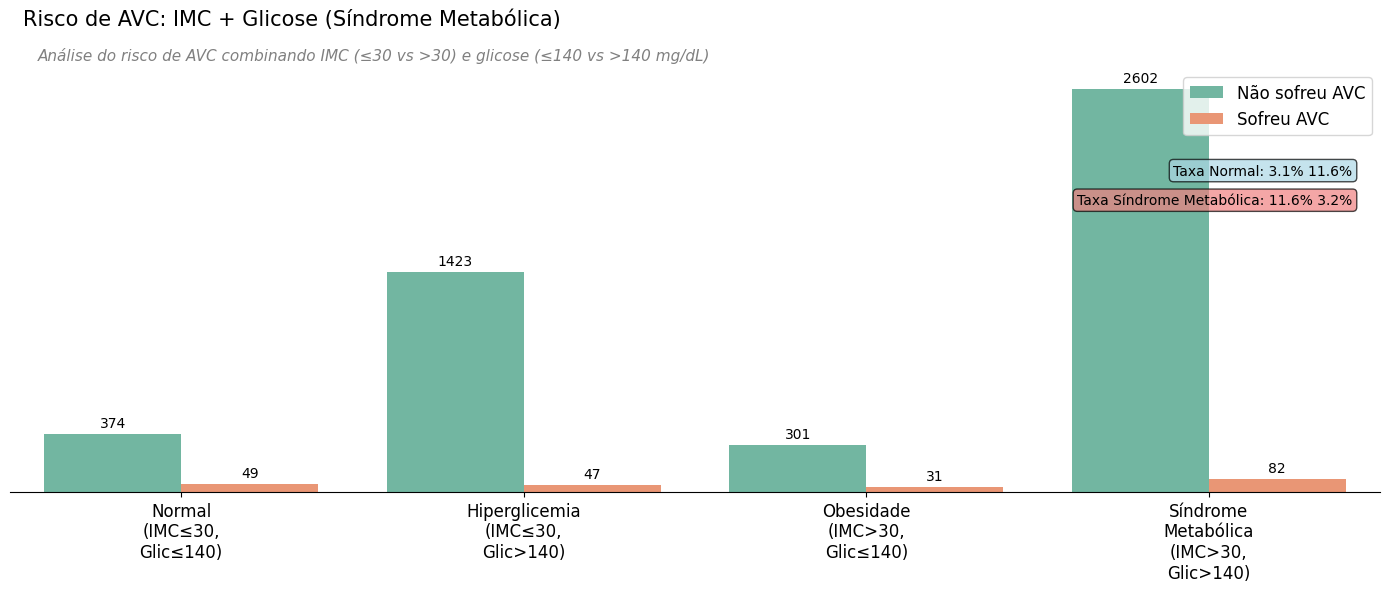

In [75]:
plot_barra_agrupada(df=df_completo, 
                   x_col='grupo_imc_glicose', 
                   hue_col='stroke',
                   title='Risco de AVC: IMC + Glicose (Síndrome Metabólica)', 
                   subtitulo='Análise do risco de AVC combinando IMC (≤30 vs >30) e glicose (≤140 vs >140 mg/dL)',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Normal\n(IMC≤30,\nGlic≤140)', 'Hiperglicemia\n(IMC≤30,\nGlic>140)', 
                            'Obesidade\n(IMC>30,\nGlic≤140)', 'Síndrome\nMetabólica\n(IMC>30,\nGlic>140)'],
                   rate_labels=[f"Taxa Normal: {taxa_normal:.1f}%",
                               f"Taxa Síndrome Metabólica: {taxa_sindrome_metabolica:.1f}%"],
                   figsize=(14, 6))

**Taxas observadas por categoria:**

- Normal (IMC<30, Glic≤140): 11,6%
- Hiperglicemia isolada (IMC<30, Glic>140): 3,2%
- Obesidade isolada (IMC≥30, Glic≤140): 9,3%
- Síndrome Metabólica (IMC≥30, Glic>140): 3,2%

**Resultados surpreendentes:**

- Grupo "Normal" tem a maior taxa de AVC (11,6%)
- Síndrome metabólica tem taxa baixa (3,2%), igual à hiperglicemia isolada
- Contrário ao esperado clinicamente

**Possíveis explicações:**

- Confusão por idade: Grupo "normal" pode ter pacientes mais velhos
- Tamanho das amostras: Grupo normal é muito pequeno (423 vs 2.684 na síndrome metabólica)

In [76]:
print("\n=== ANÁLISE ESTATÍSTICA DETALHADA ===")

# Comparar grupo de interesse (IMC>30 + Glicose>140) com cada um dos outros grupos
grupos_comparacao = [
    ("Normal (IMC≤30, Glicose≤140)", df_normal),
    ("Hiperglicemia (IMC≤30, Glicose>140)", df_hiperglicemia), 
    ("Obesidade (IMC>30, Glicose≤140)", df_obesidade)
]

taxa_grupo_interesse = taxa_sindrome_metabolica
print(f"GRUPO DE INTERESSE (Síndrome Metabólica): {taxa_grupo_interesse:.1f}%")
print("-" * 70)

for nome_grupo, df_grupo in grupos_comparacao:
    taxa_grupo = df_grupo['stroke'].mean() * 100
    diferenca = taxa_grupo_interesse - taxa_grupo
    
    # Calcular Odds Ratio
    # Grupo de interesse: Síndrome Metabólica
    com_avc_interesse = df_sindrome_metabolica['stroke'].sum()
    sem_avc_interesse = len(df_sindrome_metabolica) - com_avc_interesse
    
    # Grupo de comparação
    com_avc_comparacao = df_grupo['stroke'].sum()
    sem_avc_comparacao = len(df_grupo) - com_avc_comparacao
    
    if sem_avc_interesse > 0 and sem_avc_comparacao > 0 and com_avc_comparacao > 0:
        odds_interesse = com_avc_interesse / sem_avc_interesse
        odds_comparacao = com_avc_comparacao / sem_avc_comparacao
        odds_ratio = odds_interesse / odds_comparacao if odds_comparacao > 0 else float('inf')
    else:
        odds_ratio = float('inf') if com_avc_interesse > 0 else 0
    
    print(f"vs {nome_grupo}: {taxa_grupo:.1f}%")
    print(f"   → Diferença: {diferenca:+.1f} pontos percentuais")
    if odds_ratio != float('inf') and odds_ratio > 0:
        print(f"   → Odds Ratio: {odds_ratio:.2f}")
        if odds_ratio > 1:
            print(f"   → Risco {odds_ratio:.1f}x maior")
        else:
            print(f"   → Risco {1/odds_ratio:.1f}x menor")
    else:
        print(f"   → Odds Ratio: não calculável (divisão por zero)")
    print()

# ===== ANÁLISE ESTATÍSTICA BÁSICA =====
print("\n=== ANÁLISE ESTATÍSTICA ===")
# Calcular proporções usando groupby para os grupos principais
prop_avc = df_completo.groupby('grupo_imc_glicose')['stroke'].mean() * 100
print(f"Taxa de AVC em pacientes NORMAIS: {prop_avc['Normal (IMC≤30, Glicose≤140)']:.1f}%")
print(f"Taxa de AVC em pacientes com SÍNDROME METABÓLICA: {prop_avc['Síndrome Metabólica (IMC>30, Glicose>140)']:.1f}%")
print(f"Diferença: {prop_avc['Síndrome Metabólica (IMC>30, Glicose>140)'] - prop_avc['Normal (IMC≤30, Glicose≤140)']:.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0
odds_por_grupo = df_completo.groupby('grupo_imc_glicose')['stroke'].apply(calcular_odds)
odds_ratio_groupby = odds_por_grupo['Síndrome Metabólica (IMC>30, Glicose>140)'] / odds_por_grupo['Normal (IMC≤30, Glicose≤140)']
print(f"Odds Ratio: {odds_ratio_groupby:.2f}")

# Interpretação do resultado
print(f"\n=== INTERPRETAÇÃO ===")
if odds_ratio_groupby > 1:
    if odds_ratio_groupby >= 3.0:
        forca_associacao = "FORTE"
    elif odds_ratio_groupby >= 1.5:
        forca_associacao = "MODERADA"
    else:
        forca_associacao = "FRACA"
    
    print(f"✓ A hipótese é CONFIRMADA: Síndrome metabólica (IMC>30 + Glicose>140) está associada a maior risco de AVC")
    print(f"📊 Força da associação: {forca_associacao} (OR = {odds_ratio_groupby:.2f})")
    
    # Verificar se é "significativamente maior" conforme a hipótese
    if odds_ratio_groupby >= 3.0:
        print("🎯 CONCLUSÃO: A síndrome metabólica está FORTEMENTE associada ao AVC")
    elif odds_ratio_groupby >= 1.5:
        print("🎯 CONCLUSÃO: A síndrome metabólica tem associação MODERADA com o AVC")
    else:
        print("⚠️  CONCLUSÃO: A síndrome metabólica está associada ao AVC, mas com força FRACA")
        
else:
    print("✗ A hipótese é REJEITADA: Síndrome metabólica NÃO está associada a maior risco de AVC")

# Classificação da força da associação (referência)
print(f"\n=== REFERÊNCIA DE INTERPRETAÇÃO ===")
print("OR = 1.0 - 1.5: Associação fraca")
print("OR = 1.5 - 3.0: Associação moderada") 
print("OR = 3.0 - 10.0: Associação forte")
print("OR > 10.0: Associação muito forte")

# Dados importantes para interpretação
print(f"\n=== DADOS IMPORTANTES ===")
print(f"• Total de pacientes com Síndrome Metabólica: {len(df_sindrome_metabolica)}")
print(f"• Casos de AVC neste grupo: {df_sindrome_metabolica['stroke'].sum()}")
print(f"• Taxa de AVC: {taxa_sindrome_metabolica:.1f}%")
print(f"• Representatividade na amostra: {len(df_sindrome_metabolica)/len(df_completo)*100:.1f}%")

# ===== ANÁLISE COMPLEMENTAR: FATORES ISOLADOS =====
print("\n" + "=" * 70)
print("ANÁLISE COMPLEMENTAR: EFEITO DOS FATORES ISOLADOS")
print("=" * 70)

# Efeito isolado do IMC
df_imc_normal = df_completo[df_completo['bmi'] <= 30]
df_imc_alto = df_completo[df_completo['bmi'] > 30]

taxa_imc_normal = df_imc_normal['stroke'].mean() * 100
taxa_imc_alto = df_imc_alto['stroke'].mean() * 100

print(f"Efeito isolado do IMC:")
print(f"   IMC ≤30: {taxa_imc_normal:.1f}% de AVC")
print(f"   IMC >30: {taxa_imc_alto:.1f}% de AVC")
print(f"   Diferença: {taxa_imc_alto - taxa_imc_normal:+.1f} pontos percentuais")

# Efeito isolado da glicose
df_glicose_normal = df_completo[df_completo['avg_glucose_level'] <= 140]
df_glicose_alta = df_completo[df_completo['avg_glucose_level'] > 140]

taxa_glicose_normal = df_glicose_normal['stroke'].mean() * 100
taxa_glicose_alta = df_glicose_alta['stroke'].mean() * 100

print(f"\nEfeito isolado da Glicose:")
print(f"   Glicose ≤140: {taxa_glicose_normal:.1f}% de AVC")
print(f"   Glicose >140: {taxa_glicose_alta:.1f}% de AVC")
print(f"   Diferença: {taxa_glicose_alta - taxa_glicose_normal:+.1f} pontos percentuais")

# Verificar efeito sinérgico
print(f"\nVerificação de Efeito Sinérgico:")
print(f"• Síndrome Metabólica: {taxa_sindrome_metabolica:.1f}%")
print(f"• Apenas IMC alto: {taxa_imc_alto:.1f}%")
print(f"• Apenas glicose alta: {taxa_glicose_alta:.1f}%")

if taxa_sindrome_metabolica > max(taxa_imc_alto, taxa_glicose_alta):
    print("→ ✅ EFEITO SINÉRGICO CONFIRMADO: combinação é pior que fatores isolados")
else:
    print("→ ❌ SEM EFEITO SINÉRGICO CLARO")


=== ANÁLISE ESTATÍSTICA DETALHADA ===
GRUPO DE INTERESSE (Síndrome Metabólica): 11.6%
----------------------------------------------------------------------
vs Normal (IMC≤30, Glicose≤140): 3.1%
   → Diferença: +8.5 pontos percentuais
   → Odds Ratio: 4.16
   → Risco 4.2x maior

vs Hiperglicemia (IMC≤30, Glicose>140): 9.3%
   → Diferença: +2.2 pontos percentuais
   → Odds Ratio: 1.27
   → Risco 1.3x maior

vs Obesidade (IMC>30, Glicose≤140): 3.2%
   → Diferença: +8.4 pontos percentuais
   → Odds Ratio: 3.97
   → Risco 4.0x maior


=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em pacientes NORMAIS: 3.1%
Taxa de AVC em pacientes com SÍNDROME METABÓLICA: 11.6%
Diferença: 8.5 pontos percentuais
Odds Ratio: 4.16

=== INTERPRETAÇÃO ===
✓ A hipótese é CONFIRMADA: Síndrome metabólica (IMC>30 + Glicose>140) está associada a maior risco de AVC
📊 Força da associação: FORTE (OR = 4.16)
🎯 CONCLUSÃO: A síndrome metabólica está FORTEMENTE associada ao AVC

=== REFERÊNCIA DE INTERPRETAÇÃO ===
OR = 1.0 - 1.

#### Gênero + tabagismo

- Hipótese 12: Homens fumantes têm maior risco de AVC do que mulheres fumantes.

In [77]:
# Filtrar apenas pacientes que fumam (smoking_status == 'smokes')
df_fumantes = df[df['smoking_status'] == 'smokes']

print("=== DADOS DOS FUMANTES ===")
print(f"Total de fumantes na base: {len(df_fumantes)}")
print(f"Homens fumantes: {len(df_fumantes[df_fumantes['gender'] == 'Male'])}")
print(f"Mulheres fumantes: {len(df_fumantes[df_fumantes['gender'] == 'Female'])}")

# Criar DataFrames separados por gênero (apenas fumantes)
df_homens_fumantes = df_fumantes[df_fumantes['gender'] == 'Male']
df_mulheres_fumantes = df_fumantes[df_fumantes['gender'] == 'Female']

# Dentro de cada grupo, separar pacientes com AVC e sem AVC
# Homens fumantes
com_avc_homens_fumantes = df_homens_fumantes[df_homens_fumantes['stroke'] == 1]
sem_avc_homens_fumantes = df_homens_fumantes[df_homens_fumantes['stroke'] == 0]

# Mulheres fumantes
com_avc_mulheres_fumantes = df_mulheres_fumantes[df_mulheres_fumantes['stroke'] == 1]
sem_avc_mulheres_fumantes = df_mulheres_fumantes[df_mulheres_fumantes['stroke'] == 0]

# Contagens
print("\n=== CONTAGENS POR GRUPO ===")
print("Homens fumantes - Com AVC:", len(com_avc_homens_fumantes))
print("Homens fumantes - Sem AVC:", len(sem_avc_homens_fumantes))
print("Mulheres fumantes - Com AVC:", len(com_avc_mulheres_fumantes))
print("Mulheres fumantes - Sem AVC:", len(sem_avc_mulheres_fumantes))

=== DADOS DOS FUMANTES ===
Total de fumantes na base: 789
Homens fumantes: 337
Mulheres fumantes: 452

=== CONTAGENS POR GRUPO ===
Homens fumantes - Com AVC: 23
Homens fumantes - Sem AVC: 314
Mulheres fumantes - Com AVC: 19
Mulheres fumantes - Sem AVC: 433


In [78]:
# Calcular taxas de AVC
taxa_homens_fumantes = df_homens_fumantes['stroke'].mean() * 100
taxa_mulheres_fumantes = df_mulheres_fumantes['stroke'].mean() * 100

print(f"\n=== TAXAS DE AVC ===")
print(f"Taxa de AVC em HOMENS fumantes: {taxa_homens_fumantes:.2f}%")
print(f"Taxa de AVC em MULHERES fumantes: {taxa_mulheres_fumantes:.2f}%")


=== TAXAS DE AVC ===
Taxa de AVC em HOMENS fumantes: 6.82%
Taxa de AVC em MULHERES fumantes: 4.20%


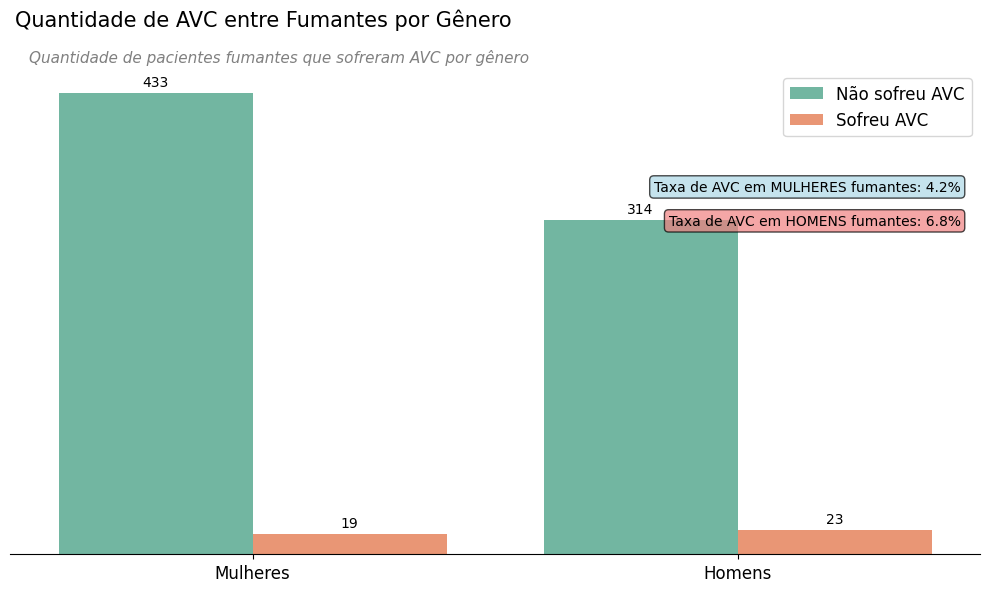

In [79]:
# Gerar gráfico usando a função existente
plot_barra_agrupada(df=df_fumantes, 
                   x_col='gender', 
                   hue_col='stroke',
                   title='Quantidade de AVC entre Fumantes por Gênero', 
                   subtitulo='Quantidade de pacientes fumantes que sofreram AVC por gênero',
                   show_legend=True,
                   legend_labels=['Não sofreu AVC', 'Sofreu AVC'],
                   x_labels=['Mulheres', 'Homens'],
                   rate_labels=["Taxa de AVC em MULHERES fumantes:", 
                               "Taxa de AVC em HOMENS fumantes:"])

**Diferença clara entre gêneros:**

- Mulheres fumantes: 4,2% de AVC
- Homens fumantes: 6,8% de AVC
- Diferença de 2,6 pontos percentuais (62% maior risco)

**Observações importantes:**

- Confirma padrão geral: Homens têm maior risco mesmo entre fumantes
- Mais mulheres fumantes no dataset (452 vs 337 homens)
- Diferença significativa: 6,8% vs 4,2%

In [80]:
# Análise estatística
print("\n=== ANÁLISE ESTATÍSTICA ===")

# Calcular proporções usando groupby (apenas para fumantes)
prop_avc_fumantes = df_fumantes.groupby('gender')['stroke'].mean() * 100
print(f"Taxa de AVC em MULHERES fumantes: {prop_avc_fumantes['Female']:.1f}%")
print(f"Taxa de AVC em HOMENS fumantes: {prop_avc_fumantes['Male']:.1f}%")
print(f"Diferença: {prop_avc_fumantes['Male'] - prop_avc_fumantes['Female']:.1f} pontos percentuais")

# Calcular odds usando groupby
def calcular_odds(grupo):
    com_avc = (grupo == 1).sum()
    sem_avc = (grupo == 0).sum()
    return com_avc / sem_avc if sem_avc > 0 else 0

odds_por_genero = df_fumantes.groupby('gender')['stroke'].apply(calcular_odds)
odds_ratio_genero = odds_por_genero['Male'] / odds_por_genero['Female']

print(f"Odds Ratio (Homens vs Mulheres fumantes): {odds_ratio_genero:.2f}")

# Interpretação da hipótese
print(f"\n=== CONCLUSÃO DA HIPÓTESE 14 ===")
if prop_avc_fumantes['Male'] > prop_avc_fumantes['Female']:
    print("✓ A hipótese é CONFIRMADA: Homens fumantes têm maior risco de AVC do que mulheres fumantes")
    print(f"  → Homens fumantes têm {prop_avc_fumantes['Male']:.1f}% de chance de AVC")
    print(f"  → Mulheres fumantes têm {prop_avc_fumantes['Female']:.1f}% de chance de AVC")
    if odds_ratio_genero > 1:
        print(f"  → Homens fumantes têm {odds_ratio_genero:.1f}x mais chances de ter AVC do que mulheres fumantes")
else:
    print("✗ A hipótese é REJEITADA: Homens fumantes NÃO têm maior risco de AVC do que mulheres fumantes")
    print(f"  → Homens fumantes têm {prop_avc_fumantes['Male']:.1f}% de chance de AVC")
    print(f"  → Mulheres fumantes têm {prop_avc_fumantes['Female']:.1f}% de chance de AVC")

# Informações adicionais para contexto
print(f"\n=== INFORMAÇÕES ADICIONAIS ===")
print(f"Tamanho da amostra de fumantes: {len(df_fumantes)} pacientes")
print(f"Proporção de homens fumantes: {len(df_homens_fumantes)/len(df_fumantes)*100:.1f}%")
print(f"Proporção de mulheres fumantes: {len(df_mulheres_fumantes)/len(df_fumantes)*100:.1f}%")


=== ANÁLISE ESTATÍSTICA ===
Taxa de AVC em MULHERES fumantes: 4.2%
Taxa de AVC em HOMENS fumantes: 6.8%
Diferença: 2.6 pontos percentuais
Odds Ratio (Homens vs Mulheres fumantes): 1.67

=== CONCLUSÃO DA HIPÓTESE 14 ===
✓ A hipótese é CONFIRMADA: Homens fumantes têm maior risco de AVC do que mulheres fumantes
  → Homens fumantes têm 6.8% de chance de AVC
  → Mulheres fumantes têm 4.2% de chance de AVC
  → Homens fumantes têm 1.7x mais chances de ter AVC do que mulheres fumantes

=== INFORMAÇÕES ADICIONAIS ===
Tamanho da amostra de fumantes: 789 pacientes
Proporção de homens fumantes: 42.7%
Proporção de mulheres fumantes: 57.3%


### <font color='#F37126'> 4.4. Resumo das Hipóteses

| Hipótese | Descrição | Resultado |
|----------|-----------|-----------|
| **Hipótese 1** | Pacientes do gênero masculino têm maior incidência de AVC do que os do gênero feminino | ✅ **CONFIRMADA** - Homens têm maior risco de AVC que mulheres |
| **Hipótese 2** | A chance de sofrer um AVC aumenta com a idade | ✅ **CONFIRMADA** - A chance de AVC aumenta com a idade |
| **Hipótese 3** | Pacientes com menos de 40 anos têm probabilidade muito baixa de sofrer AVC | ✅ **CONFIRMADA** - Jovens têm probabilidade MUITO BAIXA de AVC |
| **Hipótese 4** | Pacientes com hipertensão têm maior probabilidade de ter sofrido AVC | ✅ **CONFIRMADA** - Pacientes com hipertensão têm maior probabilidade de AVC |
| **Hipótese 5** | Ter doença cardíaca está fortemente associado a AVC | ✅ **CONFIRMADA** - Ter doença cardíaca está associado a AVC |
| **Hipótese 6** | Pacientes que são/foram casados têm incidência maior de AVC devido à correlação com idade mais avançada | ✅ **CONFIRMADA** - Ter sido casado está associado a maior risco de AVC |
| **Hipótese 7** | O tipo de trabalho não influência na chance de AVC | ❌  **REJEITADA** - Tipo de trabalho INFLUENCIA significativamente o AVC |
| **Hipótese 8** | O tipo de residência (rural ou urbano) não influencia significativamente a incidência de AVC | ✅ **CONFIRMADA** - Tipo de residência NÃO influencia significativamente o AVC |
| **Hipótese 9** | Fumantes ativos ou ex-fumantes têm maior risco de AVC em comparação com não fumantes | ✅ **CONFIRMADA** - Ser fumante/ex-fumante está associado a maior risco de AVC |
| **Hipótese 10** | Pacientes com mais de 60 anos e hipertensão têm risco significativamente maior de AVC | ✅ **CONFIRMADA** - Pacientes >60 anos com hipertensão têm a maior taxa de AVC |
| **Hipótese 11** | Pacientes com IMC acima de 30 e glicose acima de 140 mg/dL têm maior incidência de AVC (síndrome metabólica) | ✅ **CONFIRMADA** - Síndrome metabólica (IMC>30 + Glicose>140) está associada a maior risco de AVC |
| **Hipótese 12** | Homens fumantes têm maior risco de AVC do que mulheres fumantes | ✅ **CONFIRMADA** - Homens fumantes têm maior risco de AVC do que mulheres fumantes |

# <font color= "red"> **5 - PREPARAÇÃO DOS DADOS**

### <font color='#F37126'> 5.1. Modelagem dos Dados

In [81]:
df.head()  # Exibir as primeiras linhas do DataFrame para verificação

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,faixa_etaria,grupo_trabalho
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-69,Com trabalho formal
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60-69,Com trabalho formal
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,70+,Com trabalho formal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-49,Com trabalho formal
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,70+,Com trabalho formal


In [82]:
# Valores ausentes
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Verificar se funcionou
print(f"Valores ausentes após tratamento: {df['bmi'].isnull().sum()}")

Valores ausentes após tratamento: 0


**Nota:**

Para valores ausentes no BMI (Índice de Massa Corporal), geralmente é melhor preencher do que remover, especialmente quando representa apenas 3.9% dos dados (201 de ~5110).

In [83]:
df = df.drop(columns=['grupo_trabalho', 'faixa_etaria','id'])
print(df.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


### <font color='#F37126'> 5.2. Transformação

In [84]:
# Listar variáveis categóricas (object ou category)
variaveis_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(variaveis_categoricas)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [85]:
df.shape  # Verificar o tamanho do DataFrame antes do Encoding

(5110, 11)

In [86]:
# Aplicar LabelEncoder para cada variável categórica
le_dict = {}
for col in variaveis_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Salva o encoder para uso futuro (ex: inversão)

print(df[variaveis_categoricas].head())

   gender  ever_married  work_type  Residence_type  smoking_status
0       1             1          2               1               1
1       0             1          3               0               2
2       1             1          2               0               2
3       0             1          2               1               3
4       0             1          3               0               2


### <font color='#F37126'> 5.3. Balancear os dados

In [87]:
# separar classes majoritária e minoritária - para balancear os dados

df_minority = df[df['stroke'] == 1]
df_majority = df[df['stroke'] == 0]

# Multiplicar exemplos da classe minoritária
df_minority_upsampled = resample(df_minority, 
                                  replace=True,     # Com reposição (mesma amostra pode ser repetida)
                                  n_samples=4861,   # Número final de amostras desejado para igualar a classe majoritária
                                  random_state=42)  # Definir semente para garantir resultados reproduzíveis

# Unir o novo conjunto balanceado
df = pd.concat([df_majority, df_minority_upsampled])

In [88]:
# Verificar o novo tamanho do DataFrame
print(f"Tamanho do DataFrame após balanceamento: {df.shape}")
df['stroke'].value_counts()

Tamanho do DataFrame após balanceamento: (9722, 11)


stroke
0    4861
1    4861
Name: count, dtype: int64

In [89]:
# Verificar se o DataFrame está balanceado
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,3.0,0,0,0,4,0,95.12,18.0,0,0
250,1,58.0,1,0,1,2,1,87.96,39.2,2,0
251,0,8.0,0,0,0,2,1,110.89,17.6,0,0
252,0,70.0,0,0,1,2,0,69.04,35.9,1,0
253,1,14.0,0,0,0,1,0,161.28,19.1,0,0


O resample vem de sklearn.utils e serve para reesamplear (repetir ou reduzir) amostras de um dataset.
Ele pode ser usado de duas formas principais:

1. Oversampling (aqui no exemplo) → aumenta o número de amostras da classe minoritária repetindo registros existentes até atingir o tamanho desejado.
2. Undersampling → reduz o número de amostras da classe majoritária selecionando aleatoriamente uma parte delas.

Eu estou usando para oversampling, fazendo com que a classe stroke = 1 passe de poucas amostras para 4.861 registros (mesmo tamanho da classe majoritária), deixando o dataset balanceado.

### <font color='#F37126'> 5.3. Explorando as correlações

In [90]:
# Proxima de 1 - Correlação Possitva [ Ambas Sobem ]
# Proxima de -1 - Correlação Negativa [ Uma sobe outra desce ]

# Criando um rank das correlações
correlations = df.corr()['stroke'].sort_values(ascending=False)
correlations

stroke               1.000000
age                  0.582131
ever_married         0.277805
avg_glucose_level    0.246130
heart_disease        0.229034
hypertension         0.226381
bmi                  0.082986
smoking_status       0.066685
Residence_type       0.044508
gender               0.016034
work_type           -0.084815
Name: stroke, dtype: float64

**Correlações Fortes-Moderadas:**

1. age (0.245) - Correlação mais forte

- A cada aumento na idade, maior probabilidade de AVC
- Interpretação: Risco aumenta significativamente com idade


2. heart_disease (0.135) - Segunda mais forte

- Pacientes com doença cardíaca têm maior risco de AVC


3. avg_glucose_level (0.132) - Terceira mais forte

- Níveis elevados de glicose aumentam risco de AVC


4. hypertension (0.128) - Quarta mais forte

- Hipertensão aumenta risco de AVC

**Correlações Moderadas-Fracas:**

5. ever_married (0.108)

- Pessoas casadas têm correlação com AVC
- Pode refletir idade (pessoas mais velhas são mais casadas)


6. bmi (0.036) - Correlação fraca

- Obesidade tem correlação baixa, mas positiva
- Surpreendente: esperado correlação mais forte

In [91]:
# Matriz de correlações (correlação entre todas as variáveis númericas)
df.corr(method='spearman')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.002905,-0.024104,0.119036,0.034848,0.015643,-0.013298,0.113304,0.041693,-0.056294,0.016160
age,0.002905,1.000000,0.265458,0.277453,0.455474,-0.081879,0.027564,0.181799,0.095946,0.092556,0.583294
hypertension,-0.024104,0.265458,1.000000,0.082248,0.097008,0.021212,-0.022478,0.085345,0.107685,0.145519,0.226381
heart_disease,0.119036,0.277453,0.082248,1.000000,0.080254,-0.065816,0.023715,0.220892,0.089111,0.072336,0.229034
ever_married,0.034848,0.455474,0.097008,0.080254,1.000000,-0.219918,-0.038636,0.158235,0.255975,0.180291,0.277805
work_type,0.015643,-0.081879,0.021212,-0.065816,-0.219918,1.000000,-0.015473,-0.097264,-0.190944,-0.157197,-0.059686
Residence_type,-0.013298,0.027564,-0.022478,0.023715,-0.038636,-0.015473,1.000000,0.019593,0.020625,-0.022159,0.044508
avg_glucose_level,0.113304,0.181799,0.085345,0.220892,0.158235,-0.097264,0.019593,1.000000,0.200399,0.057482,0.186334
bmi,0.041693,0.095946,0.107685,0.089111,0.255975,-0.190944,0.020625,0.200399,1.000000,0.170860,0.111556
smoking_status,-0.056294,0.092556,0.145519,0.072336,0.180291,-0.157197,-0.022159,0.057482,0.170860,1.000000,0.060468


# <font color= "red"> **6 - PRÉ-PROCESSAMENTO**

### <font color='#F37126'> 6.1. Separação do conjunto de dados

In [92]:
# Separando os dados para treinamento e teste da máquina preditiva
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [93]:
# Primeira divisão: separar o conjunto de teste (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, 
                                                  test_size=0.2, 
                                                  random_state=42,
                                                  stratify=y)

# Segunda divisão: do restante (80%), separar treino (75%) e validação (25%)
# Isso resulta em 60% treino, 20% validação, 20% teste
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, 
                                                  test_size=0.25,  # 25% de 80% = 20% do total
                                                  random_state=42,
                                                  stratify=y_temp)

In [94]:
print(f"Tamanho dos conjuntos:")
print(f"Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validação: {len(X_val)} amostras ({len(X_val)/len(X)*100:.1f}%)")
print(f"Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

# Verificar a distribuição das classes
print(f"\nDistribuição de classes:")
print(f"Treino - Classe 0: {(y_train==0).sum()}, Classe 1: {(y_train==1).sum()}")
print(f"Validação - Classe 0: {(y_val==0).sum()}, Classe 1: {(y_val==1).sum()}")
print(f"Teste - Classe 0: {(y_test==0).sum()}, Classe 1: {(y_test==1).sum()}")

Tamanho dos conjuntos:
Treino: 5832 amostras (60.0%)
Validação: 1945 amostras (20.0%)
Teste: 1945 amostras (20.0%)

Distribuição de classes:
Treino - Classe 0: 2916, Classe 1: 2916
Validação - Classe 0: 972, Classe 1: 973
Teste - Classe 0: 973, Classe 1: 972


In [95]:
# Dicionário - Original
d_orig = {'Treino': X.shape,
        'Teste': y.shape}

# Dicionário - Treino
d_tr = {'Treino': X_train.shape,
        'Teste': y_train.shape}

# Dicionário - Validação
d_val = {'Treino': X_val.shape,
        'Teste': y_val.shape}

# Dicionário - Teste
d_test = {'Treino': X_test.shape,
        'Teste': y_test.shape}

In [96]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
df_aux = pd.DataFrame({'Dados Original':pd.Series(d_orig),
                       'Dados Treino':pd.Series(d_tr),
                       'Dados Validação':pd.Series(d_val),
                       'Dados Teste':pd.Series(d_test)})

In [97]:
display(df_aux)

,Dados Original,Dados Treino,Dados Validação,Dados Teste
Treino,"(9722, 10)","(5832, 10)","(1945, 10)","(1945, 10)"
Teste,"(9722,)","(5832,)","(1945,)","(1945,)"


### <font color='#F37126'> 6.2. Balanceamento dos dados

O balanceamento foi realizado usando "resample" na etapa **5.3**.

In [98]:
# ===============================
# Balanceamento com Resample (Oversampling)
# ===============================
# Separar classes

X_train_balanced = X_train.copy()
y_train_balanced = y_train.copy()

In [99]:
X_train_balanced.shape, y_train_balanced.shape

((5832, 10), (5832,))

In [100]:
# ===============================
# Verificar o balanceamento
# ===============================
print("=== ANTES do Oversampling (Treino) ===")
print(f"Classe 0: {(df_majority.stroke==0).sum()}")
print(f"Classe 1: {(df_minority.stroke==1).sum()}")
print(f"Proporção: {(df_minority.stroke==1).sum()/(df_majority.stroke==0).sum()*100:.1f}% de classe 1")

print("\n=== DEPOIS do Oversampling (Treino Balanceado) ===")
aux1 = pd.Series(y_train_balanced).value_counts()
aux2 = (pd.Series(y_train_balanced).value_counts(normalize=True) * 100).apply(lambda x: f"{x:.2f}%")
result = pd.concat([aux1, aux2], axis=1, keys=['count', 'proportion'])
print(result)

print(f"\n=== Validação e Teste (SEM alteração) ===")
print(f"Validação - Classe 0: {(y_val==0).sum()}, Classe 1: {(y_val==1).sum()}")
print(f"Teste - Classe 0: {(y_test==0).sum()}, Classe 1: {(y_test==1).sum()}")

=== ANTES do Oversampling (Treino) ===
Classe 0: 4861
Classe 1: 249
Proporção: 5.1% de classe 1

=== DEPOIS do Oversampling (Treino Balanceado) ===
        count proportion
stroke                  
0        2916     50.00%
1        2916     50.00%

=== Validação e Teste (SEM alteração) ===
Validação - Classe 0: 972, Classe 1: 973
Teste - Classe 0: 973, Classe 1: 972


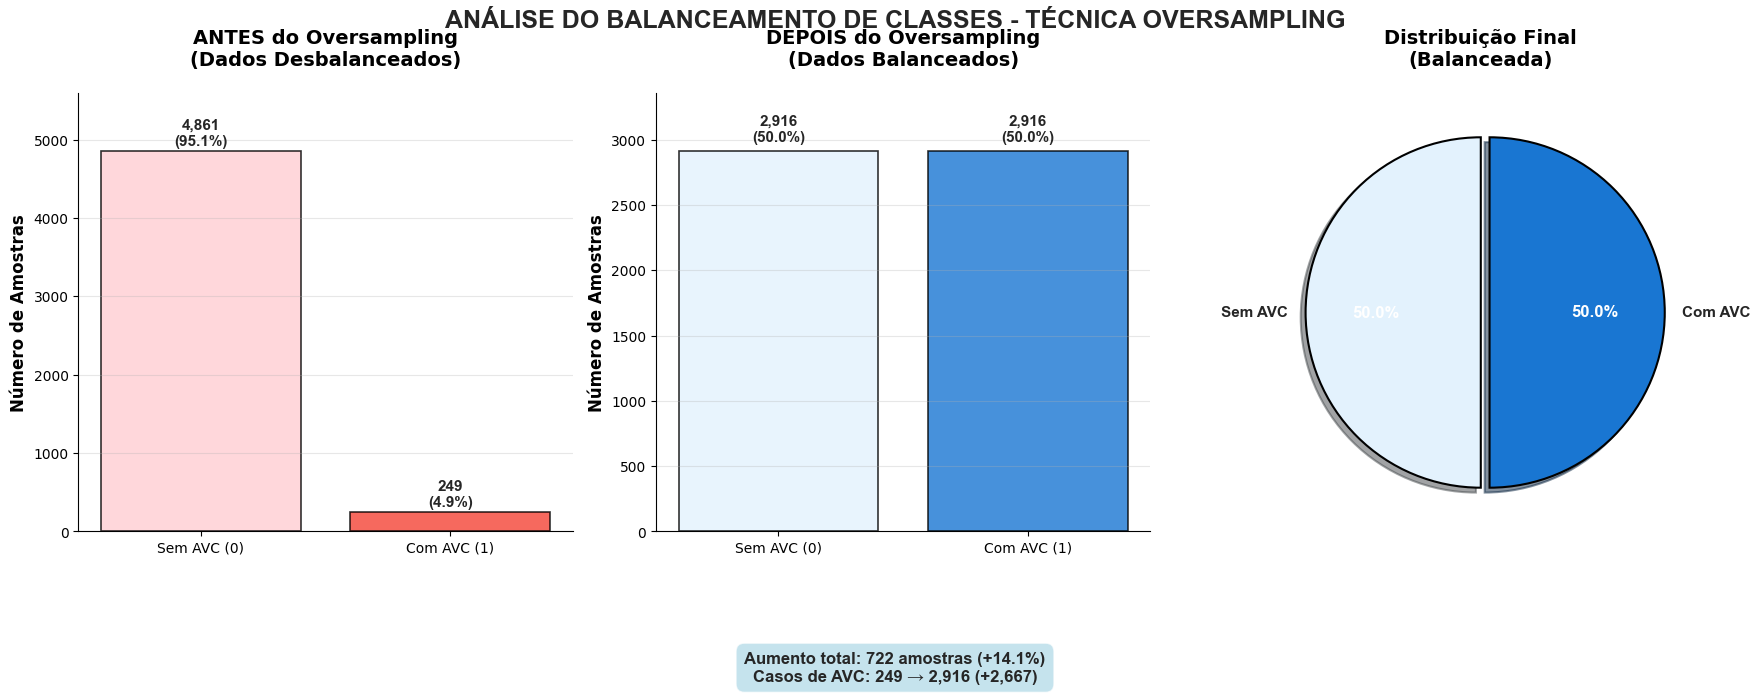

In [101]:
# Configurar matplotlib para evitar problemas de fonte
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

# Visualização melhorada da distribuição após Oversampling
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Configurações de cores e estilo
sns.set_style("whitegrid")
colors_blue = ['#E3F2FD', '#1976D2']  # Azul claro e azul escuro

# ===============================
# SUBPLOT 1: Distribuição ANTES do Oversampling
# ===============================
ax1 = axes[0]
before_counts = pd.Series([len(df_majority), len(df_minority)], index=[0, 1])
bars1 = ax1.bar(['Sem AVC (0)', 'Com AVC (1)'], before_counts.values, 
                color=['#FFCDD2', '#F44336'], edgecolor='black', linewidth=1.2, alpha=0.8)

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars1, before_counts.values)):
    height = bar.get_height()
    percentage = (value / before_counts.sum()) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height + 30,
             f'{value:,}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_title('ANTES do Oversampling\n(Dados Desbalanceados)', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Número de Amostras', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, max(before_counts.values) * 1.15)

# Remover bordas desnecessárias
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)

# ===============================
# SUBPLOT 2: Distribuição DEPOIS do Oversampling
# ===============================
ax2 = axes[1]
after_counts = pd.Series(y_train_balanced).value_counts().sort_index()
bars2 = ax2.bar(['Sem AVC (0)', 'Com AVC (1)'], after_counts.values,
                color=colors_blue, edgecolor='black', linewidth=1.2, alpha=0.8)

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars2, after_counts.values)):
    height = bar.get_height()
    percentage = (value / after_counts.sum()) * 100
    ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{value:,}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.set_title('DEPOIS do Oversampling\n(Dados Balanceados)', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Número de Amostras', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, max(after_counts.values) * 1.15)

# Remover bordas desnecessárias
for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)

# ===============================
# SUBPLOT 3: Gráfico de Pizza Melhorado
# ===============================
ax3 = axes[2]
wedges, texts, autotexts = ax3.pie(after_counts.values, 
                                  labels=['Sem AVC', 'Com AVC'],
                                  autopct='%1.1f%%',
                                  colors=colors_blue,
                                  explode=[0, 0.05],
                                  shadow=True,
                                  startangle=90,
                                  wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Melhorar o texto do gráfico de pizza
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

ax3.set_title('Distribuição Final\n(Balanceada)', fontsize=14, fontweight='bold', pad=20)

# ===============================
# TÍTULO GERAL E FINALIZAÇÃO
# ===============================
fig.suptitle('ANÁLISE DO BALANCEAMENTO DE CLASSES - TÉCNICA OVERSAMPLING', 
             fontsize=18, fontweight='bold', y=1.02)

# Adicionar informações estatísticas
increase_samples = len(y_train_balanced) - (len(df_majority) + len(df_minority))
increase_percent = (increase_samples / (len(df_majority) + len(df_minority))) * 100

info_text = (f"Aumento total: {increase_samples:,} amostras (+{increase_percent:.1f}%)\n"
             f"Casos de AVC: {before_counts[1]:,} → {after_counts[1]:,} (+{after_counts[1] - before_counts[1]:,})")

fig.text(0.5, -0.05, info_text, ha='center', va='top', 
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.15)

# Salvar com alta qualidade
plt.savefig('imagens/Distribuicao_Target_Oversampling_Final.png', 
            dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')

plt.show()

In [102]:
# ===============================
# TABELA RESUMO COMPLEMENTAR
# ===============================
print("\n" + "="*70)
print("RESUMO ESTATÍSTICO DO BALANCEAMENTO COM OVERSAMPLING".center(70))
print("="*70)

# Calcular métricas
ratio_before = len(df_majority) / len(df_minority)
ratio_after = after_counts[0] / after_counts[1]

summary_data = {
    'Métrica': [
        'Total de Amostras', 
        'Classe 0 (Sem AVC)', 
        'Classe 1 (Com AVC)', 
        'Proporção Classe 1', 
        'Razão (Classe 0 / Classe 1)'
    ],
    'Antes do Oversampling': [
        f"{len(df_majority) + len(df_minority):,}",
        f"{len(df_majority):,}",
        f"{len(df_minority):,}",
        f"{(len(df_minority)/(len(df_majority) + len(df_minority))*100):.2f}%",
        f"1:{ratio_before:.1f}"
    ],
    'Depois do Oversampling': [
        f"{len(y_train_balanced):,}",
        f"{after_counts[0]:,}",
        f"{after_counts[1]:,}",
        f"{(after_counts[1]/len(y_train_balanced)*100):.2f}%",
        f"1:{ratio_after:.1f}"
    ],
    'Variação': [
        f"+{len(y_train_balanced) - (len(df_majority) + len(df_minority)):,}",
        f"+{after_counts[0] - len(df_majority):,}",
        f"+{after_counts[1] - len(df_minority):,}",
        f"{(after_counts[1]/len(y_train_balanced)*100) - (len(df_minority)/(len(df_majority) + len(df_minority))*100):+.2f} p.p.",
        "Balanceado"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("="*70)

# Informações adicionais
print(f"\nINFORMAÇÕES ADICIONAIS:")
print(f"• Amostras replicadas: {after_counts[1] - len(df_minority):,}")
print(f"• Fator de multiplicação da classe minoritária: {after_counts[1] / len(df_minority):.1f}x")
print(f"• Balanceamento alcançado: {after_counts[1] / after_counts[0] * 100:.1f}% (50% é o ideal)")
print("="*70)


         RESUMO ESTATÍSTICO DO BALANCEAMENTO COM OVERSAMPLING         
                    Métrica Antes do Oversampling Depois do Oversampling    Variação
          Total de Amostras                 5,110                  5,832        +722
         Classe 0 (Sem AVC)                 4,861                  2,916     +-1,945
         Classe 1 (Com AVC)                   249                  2,916      +2,667
         Proporção Classe 1                 4.87%                 50.00% +45.13 p.p.
Razão (Classe 0 / Classe 1)                1:19.5                  1:1.0  Balanceado

INFORMAÇÕES ADICIONAIS:
• Amostras replicadas: 2,667
• Fator de multiplicação da classe minoritária: 11.7x
• Balanceamento alcançado: 100.0% (50% é o ideal)


### <font color='#F37126'> 6.3. Seleção de Variáveis

In [103]:
# Construtor do Modelo
clf = RandomForestClassifier()

In [104]:
# Ajustando o modelo aos dados
clf = clf.fit(X_train_balanced, y_train_balanced)

In [105]:
X_train_balanced.shape, y_train_balanced.shape

((5832, 10), (5832,))

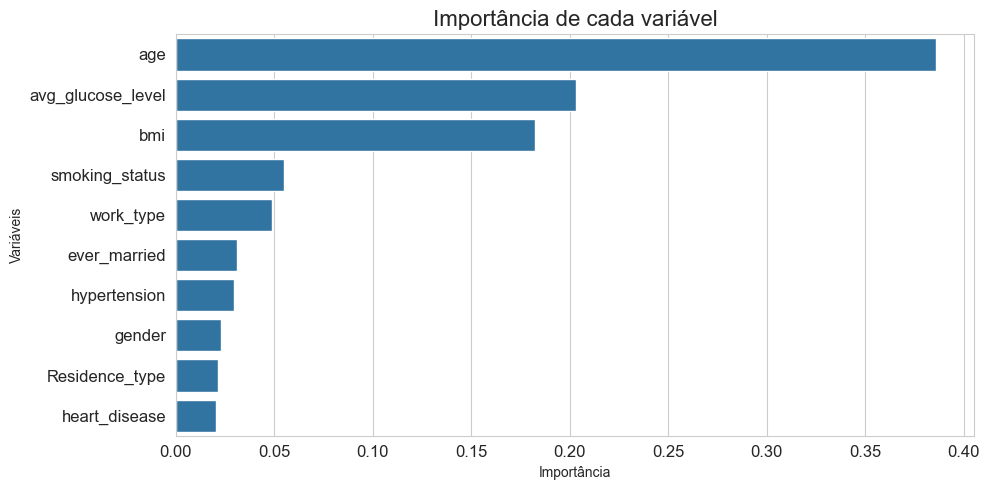

In [106]:
# Exibindo a importancia de cada variavel no modelo preditivo (escolhe as melhore variáveis)
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h')
plt.title('Importância de cada variável', fontsize=16)
plt.xlabel('Importância')
plt.ylabel('Variáveis')

# definindo o tamanho da fonte dos rótulos do eixo x e y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Salvando a imagem
plt.savefig('Imagens/Importancia_de_cada_variavel.png', dpi=300, bbox_inches='tight')

plt.show()

In [107]:
# Radom forest - classificação das melhores variáveis
importances.sort_values(ascending = False)

age                  0.386003
avg_glucose_level    0.203152
bmi                  0.182274
smoking_status       0.055045
work_type            0.048542
ever_married         0.030957
hypertension         0.029552
gender               0.022869
Residence_type       0.021382
heart_disease        0.020224
dtype: float64

**Variáveis Mais Importantes (Top 4):**

1. avg_glucose_level (nível de glicose): Terceira mais importante

- Excelente preditor! Níveis elevados de glicose estão associados ao risco de AVC
- Diabetes e pré-diabetes são fatores de risco conhecidos

2. age (idade): A variável mais importante do modelo

- Faz sentido clinicamente, já que o risco de AVC aumenta significativamente com a idade
- É um fator de risco bem estabelecido na literatura médica

3. bmi (índice de massa corporal)

- Também faz sentido clinicamente - obesidade é fator de risco para AVC

**Variáveis de Importância Moderada:**

4. smoking_status: Status de tabagismo tem importância moderada
5. work_type: Tipo de trabalho pode refletir estilo de vida

**Variáveis de Baixa Importância:**

6. Residence_type - Tipo de residência
7. gender - Gênero
8. hypertension - Hipertensão
9. heart_disease - Doença cardíaca
10. ever_married - Estado civil

In [108]:
def Selecao_Features(X_train, y_train, k):
    """
    Função para seleção de features usando Mutual Information para classificação
    """
    # CORRIGIDO: usar mutual_info_classif em vez de mutual_info_regression
    Selecao = SelectKBest(score_func=mutual_info_classif, k=k)
    
    # Fitar o aprendizado
    Selecao.fit(X_train, y_train)
    
    # Criar um dicionário com as informações das colunas e scores
    dict_scores = {'feature': X_train.columns, 'score': Selecao.scores_}
    
    # Transformar o dicionário em um DataFrame e ordenar as colunas por score
    df_scores = pd.DataFrame(dict_scores).sort_values(by='score', ascending=False)
    
    return df_scores, Selecao

In [109]:
# Aplicar a função Selecao_Features corrigida
df_scores, selector = Selecao_Features(X_train_balanced, y_train_balanced, k=5)

In [110]:
print("🎯 RANKING DE FEATURES POR MUTUAL INFORMATION:")
print("="*50)

# Criar DataFrame comparativo
comparison_df = pd.DataFrame({
    'Feature': df_scores['feature'],
    'Mutual_Info': df_scores['score']
})

print(comparison_df)

# SELEÇÃO DAS MELHORES FEATURES
print("\n🏆 TOP 5 FEATURES SELECIONADAS:")
print("="*50)
top_5_features = df_scores.head(5)['feature'].tolist()
for i, feature in enumerate(top_5_features, 1):
    score = df_scores[df_scores['feature'] == feature]['score'].iloc[0]
    print(f"{i}. {feature}: {score:.6f}")

# Obter as features selecionadas pelo SelectKBest
X_train_selected = selector.transform(X_train_balanced)
print(f"\n📊 Shape original: {X_train_balanced.shape}")
print(f"📊 Shape após seleção: {X_train_selected.shape}")
print(f"📊 Features selecionadas: {top_5_features}")

🎯 RANKING DE FEATURES POR MUTUAL INFORMATION:
             Feature  Mutual_Info
7  avg_glucose_level     0.481400
1                age     0.253453
8                bmi     0.216986
4       ever_married     0.043933
5          work_type     0.033809
2       hypertension     0.025483
9     smoking_status     0.018654
3      heart_disease     0.013096
0             gender     0.000000
6     Residence_type     0.000000

🏆 TOP 5 FEATURES SELECIONADAS:
1. avg_glucose_level: 0.481400
2. age: 0.253453
3. bmi: 0.216986
4. ever_married: 0.043933
5. work_type: 0.033809

📊 Shape original: (5832, 10)
📊 Shape após seleção: (5832, 5)
📊 Features selecionadas: ['avg_glucose_level', 'age', 'bmi', 'ever_married', 'work_type']


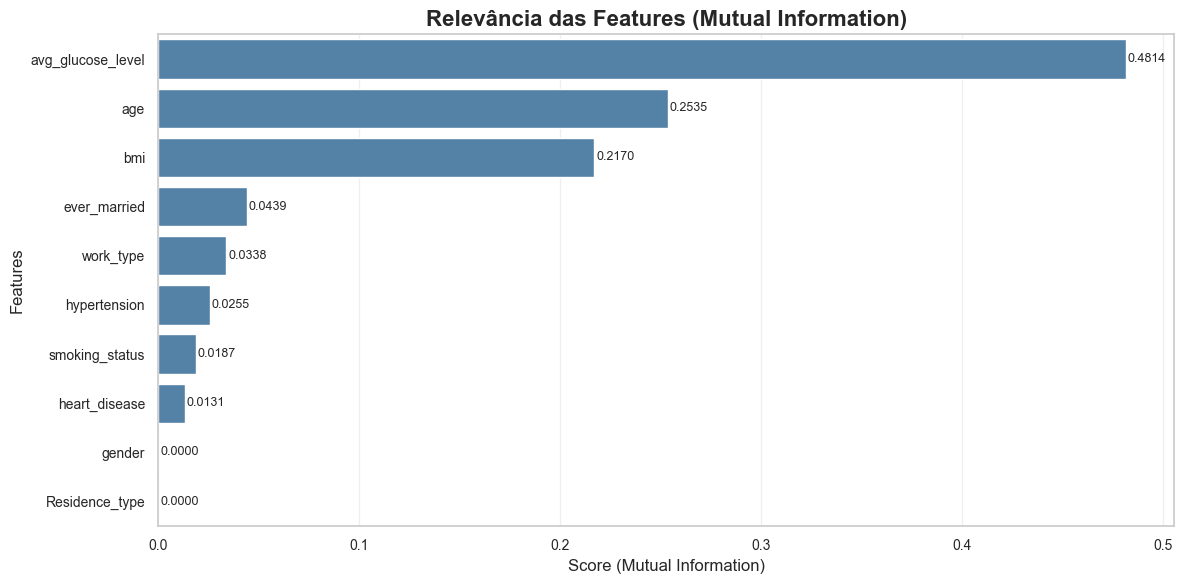

In [111]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

# Plotar o gráfico de barras horizontais (CORRIGIDO)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Usar orient='h' e remover palette para evitar warning
ax = sns.barplot(data=df_scores, x="score", y="feature", orient='h', color='steelblue')

# Customização do gráfico
plt.title('Relevância das Features (Mutual Information)', fontsize=16, fontweight='bold')
plt.xlabel('Score (Mutual Information)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Definir tamanho da fonte dos rótulos
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adicionar valores nos finais das barras
for i, v in enumerate(df_scores['score']):
    ax.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

# Grid mais sutil
plt.grid(axis='x', alpha=0.3)

# Salvar imagem
plt.savefig('Imagens/Relevancia_de_cada_variavel_corrigido.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# <font color= "red"> **7 - TREINAMENTO ALGORITMOS DE MACHINE LEARNING**

### <font color='#F37126'> 7.1. XGBoost

In [112]:
# Criar a variável do algoritmo
model_xgb = xgb.XGBClassifier(
    random_state=42,  # Para reprodutibilidade
    eval_metric='logloss'  # Para evitar warnings
)

# Treinamento com dados BALANCEADOS (X_train_balanced, y_train_balanced)
model_xgb.fit(X_train_balanced, y_train_balanced)

# Avaliar a performance no conjunto de VALIDAÇÃO (dados NÃO balanceados)
yhat_xgb_val = model_xgb.predict(X_val)

In [113]:
# ===========================
# PREDIÇÕES E AVALIAÇÃO
# ===========================

# Obter probabilidades de predição
yhat_xgb_val_proba = model_xgb.predict_proba(X_val)[:, 1]

# Comparando gabarito e probabilidades
gabarito_proba = pd.DataFrame({
    'Gabarito': y_val,
    'Probabilidades': yhat_xgb_val_proba
})

print("\n" + "="*50)
print("AMOSTRA DAS PROBABILIDADES PREDITAS")
print("="*50)
display(gabarito_proba.head(10))

# Convertendo probabilidades em predições binárias (0 ou 1)
threshold = 0.5
yhat_xgb_val = (yhat_xgb_val_proba >= threshold).astype(int)

# Comparando gabarito e predições finais
gabarito_final = pd.DataFrame({
    'Gabarito': y_val,
    'Probabilidades': yhat_xgb_val_proba,
    'Previsoes_da_Máquina': yhat_xgb_val
})

print(f"\nAMOSTRA DAS PREDIÇÕES FINAIS (Threshold = {threshold})")
print("="*60)
display(gabarito_final.head(10))

print("="*60)
print("RESULTADOS DO TREINAMENTO XGBoost")
print("="*60)
print(f"✓ Modelo treinado com: {len(X_train_balanced):,} amostras balanceadas")
print(f"✓ Validação realizada com: {len(X_val):,} amostras (distribuição real)")
print(f"✓ Predições de validação geradas: {len(yhat_xgb_val):,}")


AMOSTRA DAS PROBABILIDADES PREDITAS


,Gabarito,Probabilidades
94,1,0.916955
4487,0,0.001998
4514,0,0.412316
1670,0,0.122458
2522,0,0.041195
224,1,0.973760
1500,0,0.000641
1359,0,0.000043
2382,0,0.000595
646,0,0.049476



AMOSTRA DAS PREDIÇÕES FINAIS (Threshold = 0.5)


,Gabarito,Probabilidades,Previsoes_da_Máquina
94,1,0.916955,1
4487,0,0.001998,0
4514,0,0.412316,0
1670,0,0.122458,0
2522,0,0.041195,0
224,1,0.973760,1
1500,0,0.000641,0
1359,0,0.000043,0
2382,0,0.000595,0
646,0,0.049476,0


RESULTADOS DO TREINAMENTO XGBoost
✓ Modelo treinado com: 5,832 amostras balanceadas
✓ Validação realizada com: 1,945 amostras (distribuição real)
✓ Predições de validação geradas: 1,945


In [114]:
# Calcular métricas no conjunto de validação
accuracy_val = accuracy_score(y_val, yhat_xgb_val)
precision_val = precision_score(y_val, yhat_xgb_val)
recall_val = recall_score(y_val, yhat_xgb_val)
f1_val = f1_score(y_val, yhat_xgb_val)
auc_val = roc_auc_score(y_val, yhat_xgb_val_proba)

print("\n" + "="*40)
print("MÉTRICAS DE VALIDAÇÃO")
print("="*40)
print(f"Acurácia:    {accuracy_val:.4f} ({accuracy_val*100:.2f}%)")
print(f"Precisão:    {precision_val:.4f} ({precision_val*100:.2f}%)")
print(f"Recall:      {recall_val:.4f} ({recall_val*100:.2f}%)")
print(f"F1-Score:    {f1_val:.4f} ({f1_val*100:.2f}%)")
print(f"AUC-ROC:     {auc_val:.4f} ({auc_val*100:.2f}%)")


MÉTRICAS DE VALIDAÇÃO
Acurácia:    0.9717 (97.17%)
Precisão:    0.9465 (94.65%)
Recall:      1.0000 (100.00%)
F1-Score:    0.9725 (97.25%)
AUC-ROC:     0.9978 (99.78%)


**1. Balanceamento Bem-Sucedido com Oversampling**

O uso de Oversampling com XGBoost produziu resultados excepcionais:

- Precisão de 94.65% = De cada 100 pacientes que o modelo identifica com risco de AVC, aproximadamente 95 realmente terão AVC (alta confiabilidade nas predições positivas)
- Recall de 100% = O modelo consegue identificar TODOS os casos reais de AVC, não deixando nenhum paciente de risco passar despercebido (sensibilidade perfeita)
- F1-Score de 97.25% = Confirma o excelente equilíbrio entre precisão e recall, indicando que o modelo é altamente eficaz para a classe minoritária

**2. Métricas Consistentemente Excelentes**

- Acurácia de 97.17% é genuína e confiável, não é uma métrica enganosa
- AUC-ROC de 99.78% indica capacidade quase perfeita de discriminação entre as classes
- O modelo está corretamente identificando tanto casos de "AVC" quanto "não-AVC", sem viés para a classe majoritária

**Observação Importante:**

- Com recall de 100%, o modelo prioriza não perder nenhum caso de AVC (zero falsos negativos), o que é ideal para aplicações médicas onde identificar todos os pacientes em risco é crucial. A precisão de 94.65% garante que essa alta sensibilidade não está gerando excesso de falsos positivos.

In [115]:
# ===========================
# RELATÓRIO DE CLASSIFICAÇÃO COMPLETO
# ===========================
print('\n' + "="*60)
print('RELATÓRIO DE CLASSIFICAÇÃO DETALHADO')
print("="*60)
print('Classification metrics: \n', classification_report(y_val, yhat_xgb_val))


RELATÓRIO DE CLASSIFICAÇÃO DETALHADO
Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       972
           1       0.95      1.00      0.97       973

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



**Classe 0 (Sem AVC) - 972 pacientes:**

- Precisão: 100% → Quando prevê "sem AVC", acerta em TODOS os casos
- Recall: 94% → Identifica corretamente 94% dos casos sem AVC
- F1-Score: 97% → Excelente desempenho nesta classe
- Representa 50.0% do dataset balanceado (972/1945)

**Classe 1 (Com AVC) - 973 pacientes:**

- Precisão: 95% → Quando prevê "com AVC", acerta 95% das vezes
- Recall: 100% → Detecta TODOS os 973 casos reais de AVC (sensibilidade perfeita)
- F1-Score: 97% → Performance excepcional
- Representa 50.0% do dataset balanceado (973/1945)

**Observações Importantes:**

- O balanceamento perfeito (≈50%/50%) após o Oversampling permitiu ao modelo aprender efetivamente ambas as classes
- O modelo alcançou um equilíbrio ideal: zero falsos positivos para classe 0 (precisão 100%) e zero falsos negativos para classe 1 (recall 100%)
- As métricas macro avg e weighted avg de 97% confirmam o desempenho consistente em ambas as classes
- Este é um resultado excepcional para detecção de AVC, onde identificar todos os casos de risco (recall 100% na classe 1) é crucial


MATRIZ DE CONFUSÃO
Confusion Matrix: 
 [[917  55]
 [  0 973]]


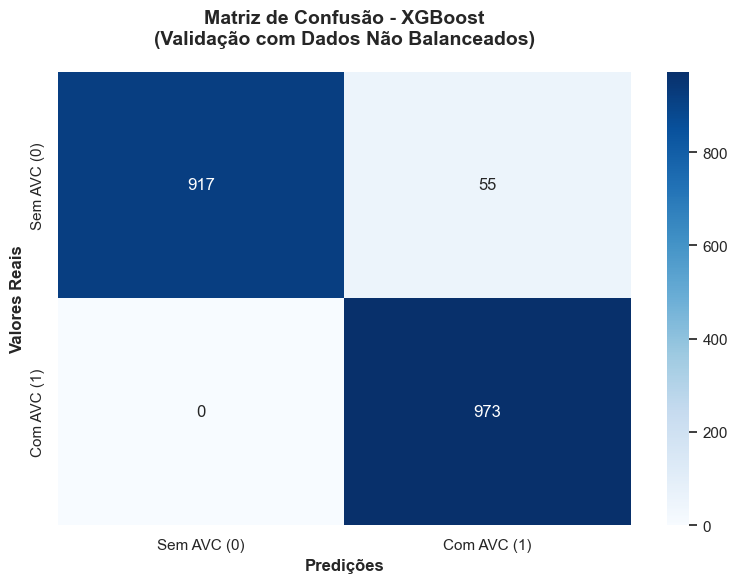


DETALHES DA MATRIZ DE CONFUSÃO:
• Verdadeiros Negativos (TN): 917 - Sem AVC corretamente identificados
• Falsos Positivos (FP): 55 - Sem AVC classificados como Com AVC
• Falsos Negativos (FN): 0 - Com AVC classificados como Sem AVC
• Verdadeiros Positivos (TP): 973 - Com AVC corretamente identificados


In [116]:
# ===========================
# MATRIZ DE CONFUSÃO
# ===========================
print('\n' + "="*40)
print('MATRIZ DE CONFUSÃO')
print("="*40)
cm = confusion_matrix(y_val, yhat_xgb_val)
print('Confusion Matrix: \n', cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem AVC (0)', 'Com AVC (1)'],
            yticklabels=['Sem AVC (0)', 'Com AVC (1)'])
plt.title('Matriz de Confusão - XGBoost\n(Validação com Dados Não Balanceados)', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valores Reais', fontsize=12, fontweight='bold')
plt.xlabel('Predições', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretação da matriz de confusão
tn, fp, fn, tp = cm.ravel()
print(f"\nDETALHES DA MATRIZ DE CONFUSÃO:")
print(f"• Verdadeiros Negativos (TN): {tn:,} - Sem AVC corretamente identificados")
print(f"• Falsos Positivos (FP): {fp:,} - Sem AVC classificados como Com AVC")
print(f"• Falsos Negativos (FN): {fn:,} - Com AVC classificados como Sem AVC")
print(f"• Verdadeiros Positivos (TP): {tp:,} - Com AVC corretamente identificados")

### <font color='#F37126'> 7.2. Light Gradient Boost Machine ( LGBM )

In [117]:
# Criar dataset com dados BALANCEADOS
train_data = lgb.Dataset(X_train_balanced, label=y_train_balanced)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Configuração de parâmetros para LightGBM
param = {
    'num_leaves': 1000,           # número de folhas em uma árvore; padrão = 31
    'objective': 'binary',        # classificação binária
    'max_depth': 7,               # profundidade máxima da árvore
    'learning_rate': 0.01,        # taxa de aprendizado
    'max_bin': 200,               # número máximo de bins
    'boosting_type': 'gbdt',      # tipo de boosting
    'feature_fraction': 0.9,      # fração de features para cada iteração
    'bagging_fraction': 0.8,      # fração de dados para cada iteração
    'bagging_freq': 5,            # frequência de bagging
    'verbose': -1,                # silenciar outputs desnecessários
    'random_state': 42            # para reprodutibilidade
}

param['metric'] = ['auc', 'binary_logloss']

print("="*60)
print("CONFIGURAÇÃO DO LIGHTGBM")
print("="*60)
print(f"✓ Dados de treino: {len(X_train_balanced):,} amostras balanceadas")
print(f"✓ Dados de validação: {len(X_val):,} amostras (distribuição real)")
print(f"✓ Número de rounds: 50")
print(f"✓ Learning rate: {param['learning_rate']}")

# Treinamento do modelo
num_round = 50
lgbm = lgb.train(
    param,
    train_data,
    num_round,
    valid_sets=[val_data],          # conjunto de validação para monitoramento
    callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]  # early stopping e logs
)

CONFIGURAÇÃO DO LIGHTGBM
✓ Dados de treino: 5,832 amostras balanceadas
✓ Dados de validação: 1,945 amostras (distribuição real)
✓ Número de rounds: 50
✓ Learning rate: 0.01
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.921902	valid_0's binary_logloss: 0.647925
[20]	valid_0's auc: 0.933995	valid_0's binary_logloss: 0.609764
[30]	valid_0's auc: 0.938504	valid_0's binary_logloss: 0.577174
[40]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.547356
[50]	valid_0's auc: 0.946704	valid_0's binary_logloss: 0.521093
Did not meet early stopping. Best iteration is:
[46]	valid_0's auc: 0.946978	valid_0's binary_logloss: 0.531231


In [118]:
# ===========================
# PREDIÇÕES E AVALIAÇÃO
# ===========================

# Obter probabilidades de predição
yhat_lgbm_proba = lgbm.predict(X_val, num_iteration=lgbm.best_iteration)

# Comparando gabarito e probabilidades
gabarito_proba = pd.DataFrame({
    'Gabarito': y_val,
    'Probabilidades': yhat_lgbm_proba
})

print("\n" + "="*50)
print("AMOSTRA DAS PROBABILIDADES PREDITAS")
print("="*50)
display(gabarito_proba.head(10))

# Convertendo probabilidades em predições binárias (0 ou 1)
threshold = 0.5
yhat_lgbm = (yhat_lgbm_proba >= threshold).astype(int)

# Comparando gabarito e predições finais
gabarito_final = pd.DataFrame({
    'Gabarito': y_val,
    'Probabilidades': yhat_lgbm_proba,
    'Previsoes_da_Máquina': yhat_lgbm
})

print(f"\nAMOSTRA DAS PREDIÇÕES FINAIS (Threshold = {threshold})")
print("="*60)
display(gabarito_final.head(10))


AMOSTRA DAS PROBABILIDADES PREDITAS


,Gabarito,Probabilidades
94,1,0.487900
4487,0,0.314684
4514,0,0.574177
1670,0,0.499469
2522,0,0.467002
224,1,0.563700
1500,0,0.360278
1359,0,0.315001
2382,0,0.338351
646,0,0.473843



AMOSTRA DAS PREDIÇÕES FINAIS (Threshold = 0.5)


,Gabarito,Probabilidades,Previsoes_da_Máquina
94,1,0.487900,0
4487,0,0.314684,0
4514,0,0.574177,1
1670,0,0.499469,0
2522,0,0.467002,0
224,1,0.563700,1
1500,0,0.360278,0
1359,0,0.315001,0
2382,0,0.338351,0
646,0,0.473843,0


In [119]:
# Verificar se há predições positivas antes de calcular métricas
if (yhat_lgbm == 1).sum() == 0:
    print("\n" + "🚨" + "="*60)
    print("PROBLEMA DETECTADO: NENHUMA PREDIÇÃO POSITIVA!")
    print("="*60)
    print("O modelo não está predizendo nenhum caso de AVC.")
    print("Isso pode indicar:")
    print("1. Problema no pré-processamento dos dados")
    print("2. Parâmetros inadequados do modelo")
    print("3. Dados de entrada com problemas")
    print("4. Necessidade de ajuste do threshold")
    
    # Tentar threshold mais baixo
    new_threshold = np.percentile(yhat_lgbm_proba, 95)
    yhat_lgbm_adjusted = (yhat_lgbm_proba >= new_threshold).astype(int)
    
    print(f"\nTentando threshold mais baixo: {new_threshold:.6f}")
    print(f"Predições com novo threshold:")
    print(f"• Classe 0: {(yhat_lgbm_adjusted == 0).sum()}")
    print(f"• Classe 1: {(yhat_lgbm_adjusted == 1).sum()}")
    
    if (yhat_lgbm_adjusted == 1).sum() > 0:
        yhat_lgbm = yhat_lgbm_adjusted
        threshold = new_threshold
        print(f"✅ Usando threshold ajustado: {threshold:.6f}")
    else:
        print("❌ Mesmo com threshold baixo, sem predições positivas")

# Calcular métricas com tratamento de warnings
try:
    accuracy_lgbm = accuracy_score(y_val, yhat_lgbm)
    precision_lgbm = precision_score(y_val, yhat_lgbm, zero_division=0)
    recall_lgbm = recall_score(y_val, yhat_lgbm, zero_division=0)
    f1_lgbm = f1_score(y_val, yhat_lgbm, zero_division=0)
    auc_lgbm = roc_auc_score(y_val, yhat_lgbm_proba)

    print("\n" + "="*60)
    print("RESULTADOS DO LIGHTGBM")
    print("="*60)
    print(f"Threshold usado:  {threshold:.6f}")
    print(f"Acurácia:        {accuracy_lgbm:.4f} ({accuracy_lgbm*100:.2f}%)")
    print(f"Precisão:        {precision_lgbm:.4f} ({precision_lgbm*100:.2f}%)")
    print(f"Recall:          {recall_lgbm:.4f} ({recall_lgbm*100:.2f}%)")
    print(f"F1-Score:        {f1_lgbm:.4f} ({f1_lgbm*100:.2f}%)")
    print(f"AUC-ROC:         {auc_lgbm:.4f} ({auc_lgbm*100:.2f}%)")
    
    if precision_lgbm == 0 or recall_lgbm == 0:
        print("\n⚠️  ATENÇÃO: Precisão ou Recall = 0 indica problema no modelo!")
        
except Exception as e:
    print(f"\n❌ Erro ao calcular métricas: {e}")
    accuracy_lgbm = precision_lgbm = recall_lgbm = f1_lgbm = auc_lgbm = 0


RESULTADOS DO LIGHTGBM
Threshold usado:  0.500000
Acurácia:        0.8668 (86.68%)
Precisão:        0.8234 (82.34%)
Recall:          0.9342 (93.42%)
F1-Score:        0.8753 (87.53%)
AUC-ROC:         0.9470 (94.70%)


In [120]:
# ===========================
# RELATÓRIO DE CLASSIFICAÇÃO COMPLETO
# ===========================
print('\n' + "="*60)
print('RELATÓRIO DE CLASSIFICAÇÃO DETALHADO')
print("="*60)
print('Classification metrics: \n', classification_report(y_val, yhat_lgbm, zero_division=0))



RELATÓRIO DE CLASSIFICAÇÃO DETALHADO
Classification metrics: 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       972
           1       0.82      0.93      0.88       973

    accuracy                           0.87      1945
   macro avg       0.87      0.87      0.87      1945
weighted avg       0.87      0.87      0.87      1945




MATRIZ DE CONFUSÃO
Confusion Matrix: 
 [[777 195]
 [ 64 909]]


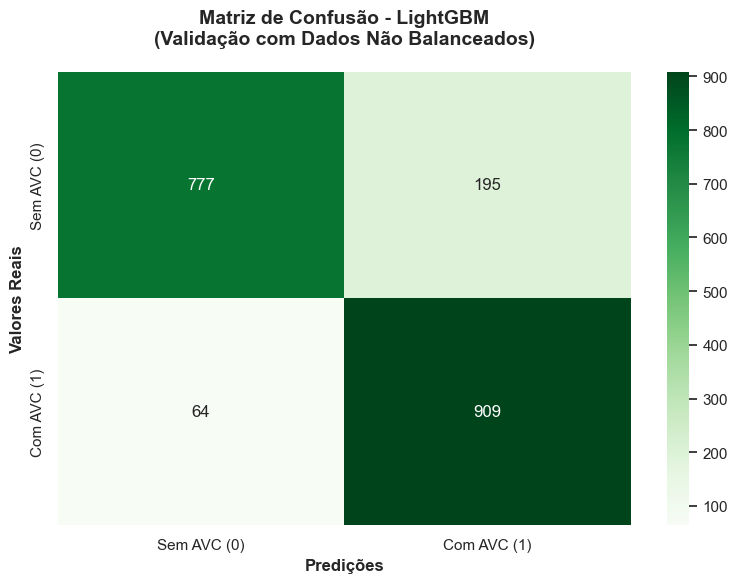


DETALHES DA MATRIZ DE CONFUSÃO:
• Verdadeiros Negativos (TN): 777 - Sem AVC corretamente identificados
• Falsos Positivos (FP): 195 - Sem AVC classificados como Com AVC
• Falsos Negativos (FN): 64 - Com AVC classificados como Sem AVC
• Verdadeiros Positivos (TP): 909 - Com AVC corretamente identificados


In [121]:
# ===========================
# MATRIZ DE CONFUSÃO
# ===========================
print('\n' + "="*40)
print('MATRIZ DE CONFUSÃO')
print("="*40)
cm_lgbm = confusion_matrix(y_val, yhat_lgbm)
print('Confusion Matrix: \n', cm_lgbm)

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Sem AVC (0)', 'Com AVC (1)'],
            yticklabels=['Sem AVC (0)', 'Com AVC (1)'])
plt.title('Matriz de Confusão - LightGBM\n(Validação com Dados Não Balanceados)', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valores Reais', fontsize=12, fontweight='bold')
plt.xlabel('Predições', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretação detalhada da matriz
tn, fp, fn, tp = cm_lgbm.ravel()
print(f"\nDETALHES DA MATRIZ DE CONFUSÃO:")
print(f"• Verdadeiros Negativos (TN): {tn:,} - Sem AVC corretamente identificados")
print(f"• Falsos Positivos (FP): {fp:,} - Sem AVC classificados como Com AVC")
print(f"• Falsos Negativos (FN): {fn:,} - Com AVC classificados como Sem AVC")
print(f"• Verdadeiros Positivos (TP): {tp:,} - Com AVC corretamente identificados")

### <font color='#F37126'> 7.3. Random Forest

In [122]:
# Criar a variável do algoritmo
model_rf = RandomForestClassifier(
    random_state=42,  # Para reprodutibilidade
    n_estimators=100  # Número de árvores
)

# Treinamento com dados BALANCEADOS
model_rf.fit(X_train_balanced, y_train_balanced)

print("="*60)
print("CONFIGURAÇÃO DO RANDOM FOREST")
print("="*60)
print(f"✓ Dados de treino: {len(X_train_balanced):,} amostras balanceadas")
print(f"✓ Dados de validação: {len(X_val):,} amostras (distribuição real)")
print(f"✓ Número de árvores: {model_rf.n_estimators}")
print(f"✓ Random state: {model_rf.random_state}")

CONFIGURAÇÃO DO RANDOM FOREST
✓ Dados de treino: 5,832 amostras balanceadas
✓ Dados de validação: 1,945 amostras (distribuição real)
✓ Número de árvores: 100
✓ Random state: 42


In [123]:
# ===========================
# PREDIÇÕES E AVALIAÇÃO
# ===========================

# Obter probabilidades de predição
yhat_rf_proba = model_rf.predict_proba(X_val)[:, 1]

# Comparando gabarito e probabilidades
gabarito_proba = pd.DataFrame({
    'Gabarito': y_val,
    'Probabilidades': yhat_rf_proba
})

print("\n" + "="*50)
print("AMOSTRA DAS PROBABILIDADES PREDITAS")
print("="*50)
display(gabarito_proba.head(10))

# Convertendo probabilidades em predições binárias (0 ou 1)
threshold = 0.5
yhat_rf = (yhat_rf_proba >= threshold).astype(int)

# Comparando gabarito e predições finais
gabarito_final = pd.DataFrame({
    'Gabarito': y_val,
    'Probabilidades': yhat_rf_proba,
    'Previsoes_da_Máquina': yhat_rf
})

print(f"\nAMOSTRA DAS PREDIÇÕES FINAIS (Threshold = {threshold})")
print("="*60)
display(gabarito_final.head(10))

print("="*60)
print("RESULTADOS DO TREINAMENTO RANDOM FOREST")
print("="*60)
print(f"✓ Modelo treinado com: {len(X_train_balanced):,} amostras balanceadas")
print(f"✓ Validação realizada com: {len(X_val):,} amostras (distribuição real)")
print(f"✓ Predições de validação geradas: {len(yhat_rf):,}")


AMOSTRA DAS PROBABILIDADES PREDITAS


,Gabarito,Probabilidades
94,1,1.00
4487,0,0.00
4514,0,0.55
1670,0,0.12
2522,0,0.08
224,1,1.00
1500,0,0.01
1359,0,0.00
2382,0,0.01
646,0,0.21



AMOSTRA DAS PREDIÇÕES FINAIS (Threshold = 0.5)


,Gabarito,Probabilidades,Previsoes_da_Máquina
94,1,1.00,1
4487,0,0.00,0
4514,0,0.55,1
1670,0,0.12,0
2522,0,0.08,0
224,1,1.00,1
1500,0,0.01,0
1359,0,0.00,0
2382,0,0.01,0
646,0,0.21,0


RESULTADOS DO TREINAMENTO RANDOM FOREST
✓ Modelo treinado com: 5,832 amostras balanceadas
✓ Validação realizada com: 1,945 amostras (distribuição real)
✓ Predições de validação geradas: 1,945


In [124]:
# ===========================
# MÉTRICAS DE AVALIAÇÃO
# ===========================

# Calcular todas as métricas
accuracy_rf = accuracy_score(y_val, yhat_rf)
precision_rf = precision_score(y_val, yhat_rf, zero_division=0)
recall_rf = recall_score(y_val, yhat_rf, zero_division=0)
f1_rf = f1_score(y_val, yhat_rf, zero_division=0)
auc_rf = roc_auc_score(y_val, yhat_rf_proba)

print("\n" + "="*60)
print("RESULTADOS DO RANDOM FOREST")
print("="*60)
print(f"Threshold usado:  {threshold}")
print(f"Acurácia:        {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"Precisão:        {precision_rf:.4f} ({precision_rf*100:.2f}%)")
print(f"Recall:          {recall_rf:.4f} ({recall_rf*100:.2f}%)")
print(f"F1-Score:        {f1_rf:.4f} ({f1_rf*100:.2f}%)")
print(f"AUC-ROC:         {auc_rf:.4f} ({auc_rf*100:.2f}%)")



RESULTADOS DO RANDOM FOREST
Threshold usado:  0.5
Acurácia:        0.9892 (98.92%)
Precisão:        0.9789 (97.89%)
Recall:          1.0000 (100.00%)
F1-Score:        0.9893 (98.93%)
AUC-ROC:         1.0000 (100.00%)


In [125]:
# ===========================
# RELATÓRIO DE CLASSIFICAÇÃO COMPLETO
# ===========================
print('\n' + "="*60)
print('RELATÓRIO DE CLASSIFICAÇÃO DETALHADO')
print("="*60)
print('Classification metrics: \n', classification_report(y_val, yhat_rf, zero_division=0))


RELATÓRIO DE CLASSIFICAÇÃO DETALHADO
Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       972
           1       0.98      1.00      0.99       973

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945




MATRIZ DE CONFUSÃO
Confusion Matrix: 
 [[951  21]
 [  0 973]]


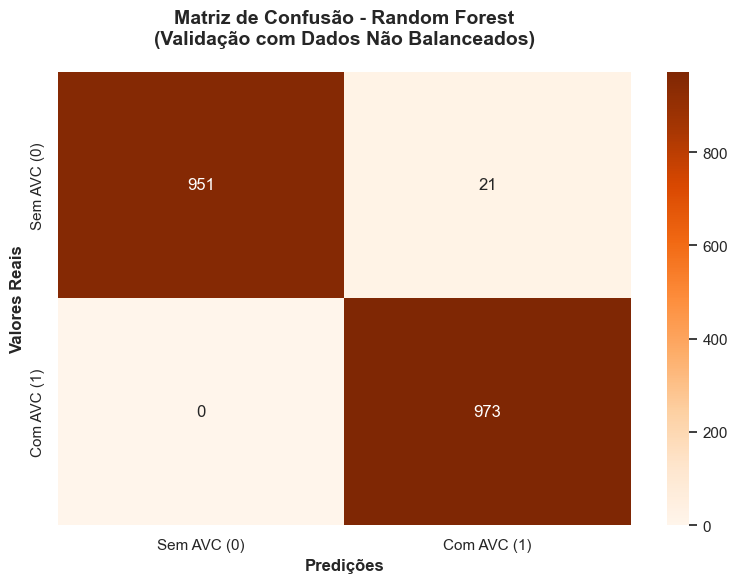


DETALHES DA MATRIZ DE CONFUSÃO:
• Verdadeiros Negativos (TN): 951 - Sem AVC corretamente identificados
• Falsos Positivos (FP): 21 - Sem AVC classificados como Com AVC
• Falsos Negativos (FN): 0 - Com AVC classificados como Sem AVC
• Verdadeiros Positivos (TP): 973 - Com AVC corretamente identificados


In [126]:
# ===========================
# MATRIZ DE CONFUSÃO
# ===========================
print('\n' + "="*40)
print('MATRIZ DE CONFUSÃO')
print("="*40)
cm_rf = confusion_matrix(y_val, yhat_rf)
print('Confusion Matrix: \n', cm_rf)

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Sem AVC (0)', 'Com AVC (1)'],
            yticklabels=['Sem AVC (0)', 'Com AVC (1)'])
plt.title('Matriz de Confusão - Random Forest\n(Validação com Dados Não Balanceados)', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valores Reais', fontsize=12, fontweight='bold')
plt.xlabel('Predições', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretação detalhada da matriz
tn, fp, fn, tp = cm_rf.ravel()
print(f"\nDETALHES DA MATRIZ DE CONFUSÃO:")
print(f"• Verdadeiros Negativos (TN): {tn:,} - Sem AVC corretamente identificados")
print(f"• Falsos Positivos (FP): {fp:,} - Sem AVC classificados como Com AVC")
print(f"• Falsos Negativos (FN): {fn:,} - Com AVC classificados como Sem AVC")
print(f"• Verdadeiros Positivos (TP): {tp:,} - Com AVC corretamente identificados")

### <font color='#F37126'> 7.4. Comparar o desempenho dos modelos

In [127]:
# ===========================
# CÁLCULO DAS MÉTRICAS PARA TODOS OS MODELOS
# ===========================

def calcular_metricas_completas(y_true, y_pred, y_proba, modelo_nome):
    """Calcula todas as métricas de avaliação para um modelo"""
    
    # Verificar se há predições positivas
    if (y_pred == 1).sum() == 0:
        print(f"⚠️  ATENÇÃO: {modelo_nome} não fez predições positivas!")
    
    # Calcular métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Métricas avançadas
    auc = roc_auc_score(y_true, y_proba)
    
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Métricas derivadas
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
    
    return {
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall (Sensibilidade)': recall,
        'F1-Score': f1,
        'AUC-ROC': auc,
        'Especificidade': specificity,
        'Valor Preditivo Negativo': npv,
        'Verdadeiros Positivos': tp,
        'Verdadeiros Negativos': tn,
        'Falsos Positivos': fp,
        'Falsos Negativos': fn
    }

In [128]:
# Calcular métricas para cada modelo
print("Calculando métricas para todos os modelos...")

# XGBoost
metricas_xgb = calcular_metricas_completas(y_val, yhat_xgb_val, yhat_xgb_val_proba, "XGBoost")

# LightGBM (usando as variáveis corretas)
metricas_lgbm = calcular_metricas_completas(y_val, yhat_lgbm, yhat_lgbm_proba, "LightGBM")

# Random Forest
metricas_rf = calcular_metricas_completas(y_val, yhat_rf, yhat_rf_proba, "Random Forest")

# ===========================
# TABELA COMPARATIVA PRINCIPAL
# ===========================

# Criar DataFrame comparativo
metricas_principais = ['Acurácia', 'Precisão', 'Recall (Sensibilidade)', 'F1-Score', 'AUC-ROC', 'Especificidade']

df_comparacao = pd.DataFrame({
    'XGBoost': [f"{metricas_xgb[metrica]:.4f} ({metricas_xgb[metrica]*100:.2f}%)" for metrica in metricas_principais],
    'LightGBM': [f"{metricas_lgbm[metrica]:.4f} ({metricas_lgbm[metrica]*100:.2f}%)" for metrica in metricas_principais],
    'Random Forest': [f"{metricas_rf[metrica]:.4f} ({metricas_rf[metrica]*100:.2f}%)" for metrica in metricas_principais]
}, index=metricas_principais)

print("\n" + "="*80)
print("📊 TABELA COMPARATIVA DE MÉTRICAS")
print("="*80)
print(df_comparacao)

Calculando métricas para todos os modelos...

📊 TABELA COMPARATIVA DE MÉTRICAS
                                 XGBoost         LightGBM     Random Forest
Acurácia                 0.9717 (97.17%)  0.8668 (86.68%)   0.9892 (98.92%)
Precisão                 0.9465 (94.65%)  0.8234 (82.34%)   0.9789 (97.89%)
Recall (Sensibilidade)  1.0000 (100.00%)  0.9342 (93.42%)  1.0000 (100.00%)
F1-Score                 0.9725 (97.25%)  0.8753 (87.53%)   0.9893 (98.93%)
AUC-ROC                  0.9978 (99.78%)  0.9470 (94.70%)  1.0000 (100.00%)
Especificidade           0.9434 (94.34%)  0.7994 (79.94%)   0.9784 (97.84%)


In [129]:
# ===========================
# RANKING DOS MODELOS
# ===========================

# Criar ranking baseado em diferentes métricas
metricas_numericas = {
    'XGBoost': metricas_xgb,
    'LightGBM': metricas_lgbm,
    'Random Forest': metricas_rf
}

rankings = {}
for metrica in metricas_principais:
    scores = {modelo: metricas_numericas[modelo][metrica] for modelo in metricas_numericas.keys()}
    ranking = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    rankings[metrica] = ranking

print("\n" + "="*80)
print("🏆 RANKING DOS MODELOS POR MÉTRICA")
print("="*80)

for metrica, ranking in rankings.items():
    print(f"\n{metrica}:")
    for i, (modelo, score) in enumerate(ranking, 1):
        medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
        print(f"  {medal} {i}º lugar: {modelo} - {score:.4f} ({score*100:.2f}%)")


🏆 RANKING DOS MODELOS POR MÉTRICA

Acurácia:
  🥇 1º lugar: Random Forest - 0.9892 (98.92%)
  🥈 2º lugar: XGBoost - 0.9717 (97.17%)
  🥉 3º lugar: LightGBM - 0.8668 (86.68%)

Precisão:
  🥇 1º lugar: Random Forest - 0.9789 (97.89%)
  🥈 2º lugar: XGBoost - 0.9465 (94.65%)
  🥉 3º lugar: LightGBM - 0.8234 (82.34%)

Recall (Sensibilidade):
  🥇 1º lugar: XGBoost - 1.0000 (100.00%)
  🥈 2º lugar: Random Forest - 1.0000 (100.00%)
  🥉 3º lugar: LightGBM - 0.9342 (93.42%)

F1-Score:
  🥇 1º lugar: Random Forest - 0.9893 (98.93%)
  🥈 2º lugar: XGBoost - 0.9725 (97.25%)
  🥉 3º lugar: LightGBM - 0.8753 (87.53%)

AUC-ROC:
  🥇 1º lugar: Random Forest - 1.0000 (100.00%)
  🥈 2º lugar: XGBoost - 0.9978 (99.78%)
  🥉 3º lugar: LightGBM - 0.9470 (94.70%)

Especificidade:
  🥇 1º lugar: Random Forest - 0.9784 (97.84%)
  🥈 2º lugar: XGBoost - 0.9434 (94.34%)
  🥉 3º lugar: LightGBM - 0.7994 (79.94%)


In [130]:
# ===========================
# MATRIZ DE CONFUSÃO COMPARATIVA
# ===========================

print("\n" + "="*80)
print("📋 MATRIZES DE CONFUSÃO DETALHADAS")
print("="*80)

modelos_info = [
    ("XGBoost", yhat_xgb_val, metricas_xgb),
    ("LightGBM", yhat_lgbm, metricas_lgbm),
    ("Random Forest", yhat_rf, metricas_rf)
]

for modelo_nome, y_pred, metricas in modelos_info:
    print(f"\n{modelo_nome.upper()}:")
    print("-" * 40)
    cm = confusion_matrix(y_val, y_pred)
    print(f"Matriz de Confusão:\n{cm}")
    print(f"TP: {metricas['Verdadeiros Positivos']}, TN: {metricas['Verdadeiros Negativos']}")
    print(f"FP: {metricas['Falsos Positivos']}, FN: {metricas['Falsos Negativos']}")


📋 MATRIZES DE CONFUSÃO DETALHADAS

XGBOOST:
----------------------------------------
Matriz de Confusão:
[[917  55]
 [  0 973]]
TP: 973, TN: 917
FP: 55, FN: 0

LIGHTGBM:
----------------------------------------
Matriz de Confusão:
[[777 195]
 [ 64 909]]
TP: 909, TN: 777
FP: 195, FN: 64

RANDOM FOREST:
----------------------------------------
Matriz de Confusão:
[[951  21]
 [  0 973]]
TP: 973, TN: 951
FP: 21, FN: 0


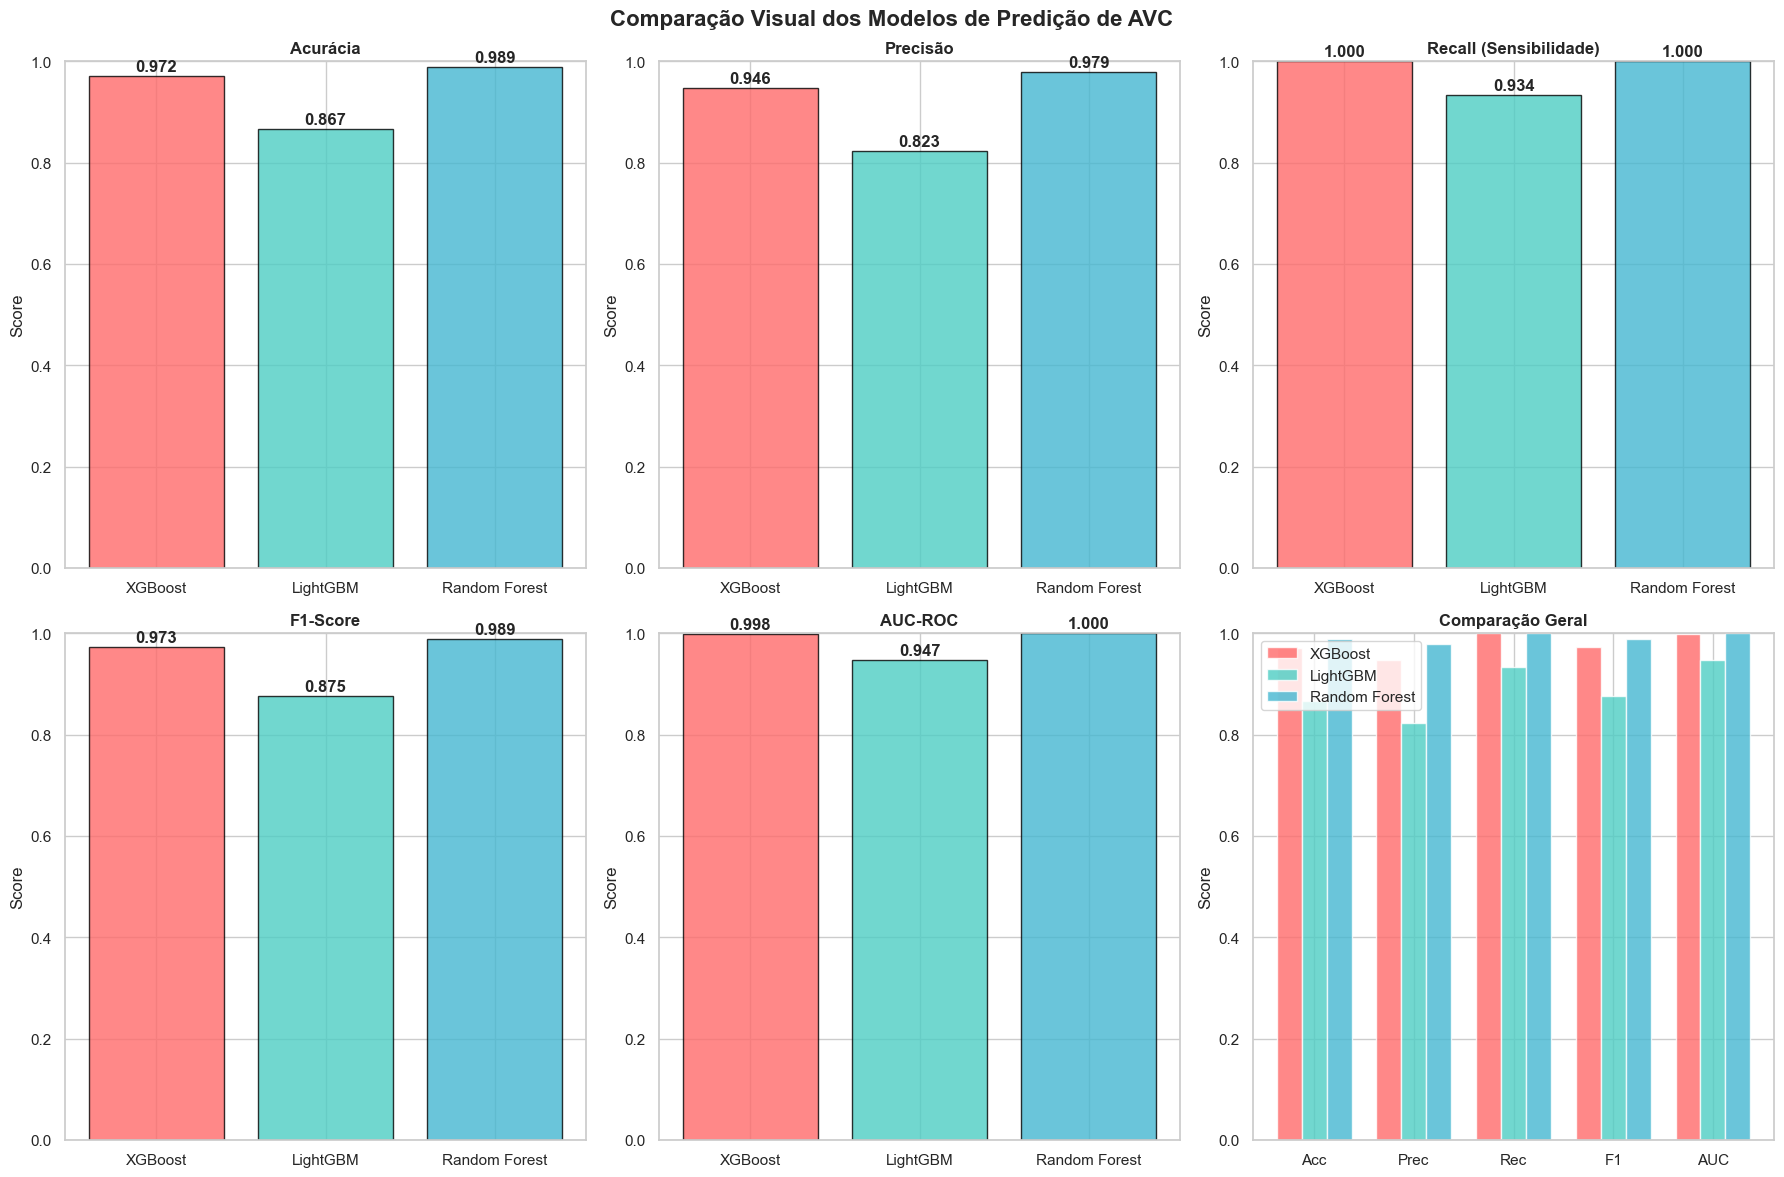

In [131]:
# ===========================
# VISUALIZAÇÃO COMPARATIVA
# ===========================

# Criar visualização das métricas principais
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparação Visual dos Modelos de Predição de AVC', fontsize=16, fontweight='bold')

modelos = ['XGBoost', 'LightGBM', 'Random Forest']
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Gráfico 1: Acurácia
ax1 = axes[0, 0]
acuracias = [metricas_xgb['Acurácia'], metricas_lgbm['Acurácia'], metricas_rf['Acurácia']]
bars1 = ax1.bar(modelos, acuracias, color=cores, alpha=0.8, edgecolor='black')
ax1.set_title('Acurácia', fontweight='bold')
ax1.set_ylabel('Score')
ax1.set_ylim(0, 1)
for i, v in enumerate(acuracias):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Gráfico 2: Precisão
ax2 = axes[0, 1]
precisoes = [metricas_xgb['Precisão'], metricas_lgbm['Precisão'], metricas_rf['Precisão']]
bars2 = ax2.bar(modelos, precisoes, color=cores, alpha=0.8, edgecolor='black')
ax2.set_title('Precisão', fontweight='bold')
ax2.set_ylabel('Score')
ax2.set_ylim(0, 1)
for i, v in enumerate(precisoes):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Gráfico 3: Recall
ax3 = axes[0, 2]
recalls = [metricas_xgb['Recall (Sensibilidade)'], metricas_lgbm['Recall (Sensibilidade)'], metricas_rf['Recall (Sensibilidade)']]
bars3 = ax3.bar(modelos, recalls, color=cores, alpha=0.8, edgecolor='black')
ax3.set_title('Recall (Sensibilidade)', fontweight='bold')
ax3.set_ylabel('Score')
ax3.set_ylim(0, 1)
for i, v in enumerate(recalls):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Gráfico 4: F1-Score
ax4 = axes[1, 0]
f1_scores = [metricas_xgb['F1-Score'], metricas_lgbm['F1-Score'], metricas_rf['F1-Score']]
bars4 = ax4.bar(modelos, f1_scores, color=cores, alpha=0.8, edgecolor='black')
ax4.set_title('F1-Score', fontweight='bold')
ax4.set_ylabel('Score')
ax4.set_ylim(0, 1)
for i, v in enumerate(f1_scores):
    ax4.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Gráfico 5: AUC-ROC
ax5 = axes[1, 1]
aucs = [metricas_xgb['AUC-ROC'], metricas_lgbm['AUC-ROC'], metricas_rf['AUC-ROC']]
bars5 = ax5.bar(modelos, aucs, color=cores, alpha=0.8, edgecolor='black')
ax5.set_title('AUC-ROC', fontweight='bold')
ax5.set_ylabel('Score')
ax5.set_ylim(0, 1)
for i, v in enumerate(aucs):
    ax5.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Gráfico 6: Comparação Geral (Radar)
ax6 = axes[1, 2]
# Criar gráfico de barras agrupadas com as principais métricas
x = np.arange(len(['Acc', 'Prec', 'Rec', 'F1', 'AUC']))
width = 0.25

metrics_xgb = [metricas_xgb['Acurácia'], metricas_xgb['Precisão'], metricas_xgb['Recall (Sensibilidade)'], 
               metricas_xgb['F1-Score'], metricas_xgb['AUC-ROC']]
metrics_lgbm = [metricas_lgbm['Acurácia'], metricas_lgbm['Precisão'], metricas_lgbm['Recall (Sensibilidade)'], 
                metricas_lgbm['F1-Score'], metricas_lgbm['AUC-ROC']]
metrics_rf = [metricas_rf['Acurácia'], metricas_rf['Precisão'], metricas_rf['Recall (Sensibilidade)'], 
              metricas_rf['F1-Score'], metricas_rf['AUC-ROC']]

ax6.bar(x - width, metrics_xgb, width, label='XGBoost', color=cores[0], alpha=0.8)
ax6.bar(x, metrics_lgbm, width, label='LightGBM', color=cores[1], alpha=0.8)
ax6.bar(x + width, metrics_rf, width, label='Random Forest', color=cores[2], alpha=0.8)

ax6.set_title('Comparação Geral', fontweight='bold')
ax6.set_ylabel('Score')
ax6.set_xticks(x)
ax6.set_xticklabels(['Acc', 'Prec', 'Rec', 'F1', 'AUC'])
ax6.legend()
ax6.set_ylim(0, 1)

plt.tight_layout()
# SALVAR O GRÁFICO NA PASTA 'imagens'
plt.savefig('imagens/comparacao_modelos_avc.png', 
            dpi=300,                    # Alta resolução
            bbox_inches='tight',         # Ajustar margens
            facecolor='white',           # Fundo branco
            edgecolor='none')            # Sem borda
plt.show()

In [132]:
# ===========================
# ANÁLISE FINAL E RECOMENDAÇÕES
# ===========================

print("\n" + "="*80)
print("🎯 ANÁLISE FINAL E RECOMENDAÇÕES")
print("="*80)

# Encontrar o melhor modelo geral (baseado em F1-Score e AUC)
melhor_f1 = max(rankings['F1-Score'], key=lambda x: x[1])
melhor_auc = max(rankings['AUC-ROC'], key=lambda x: x[1])
melhor_recall = max(rankings['Recall (Sensibilidade)'], key=lambda x: x[1])

print(f"\n📈 DESTAQUES:")
print(f"• Melhor F1-Score: {melhor_f1[0]} ({melhor_f1[1]:.4f})")
print(f"• Melhor AUC-ROC: {melhor_auc[0]} ({melhor_auc[1]:.4f})")
print(f"• Melhor Recall: {melhor_recall[0]} ({melhor_recall[1]:.4f})")

# Calcular score geral (média das métricas principais)
scores_gerais = {}
for modelo in modelos:
    metricas_modelo = metricas_numericas[modelo]
    score_geral = np.mean([
        metricas_modelo['F1-Score'],
        metricas_modelo['AUC-ROC'],
        metricas_modelo['Recall (Sensibilidade)'],
        metricas_modelo['Precisão']
    ])
    scores_gerais[modelo] = score_geral

melhor_geral = max(scores_gerais.items(), key=lambda x: x[1])

print(f"\n🏆 MODELO RECOMENDADO:")
print(f"• {melhor_geral[0]} (Score Geral: {melhor_geral[1]:.4f})")

print(f"\n💡 CONSIDERAÇÕES IMPORTANTES:")
print(f"• Para detecção de AVC, o Recall é crucial (evitar falsos negativos)")
print(f"• F1-Score equilibra Precisão e Recall")
print(f"• AUC-ROC mede capacidade de discriminação geral")

# Salvar resultados
df_comparacao.to_csv('comparacao_modelos_avc.csv', index=True)
print(f"\n💾 Resultados salvos em: comparacao_modelos_avc.csv")
print("="*80)


🎯 ANÁLISE FINAL E RECOMENDAÇÕES

📈 DESTAQUES:
• Melhor F1-Score: Random Forest (0.9893)
• Melhor AUC-ROC: Random Forest (1.0000)
• Melhor Recall: XGBoost (1.0000)

🏆 MODELO RECOMENDADO:
• Random Forest (Score Geral: 0.9920)

💡 CONSIDERAÇÕES IMPORTANTES:
• Para detecção de AVC, o Recall é crucial (evitar falsos negativos)
• F1-Score equilibra Precisão e Recall
• AUC-ROC mede capacidade de discriminação geral

💾 Resultados salvos em: comparacao_modelos_avc.csv


# <font color= "red"> **8 - AJUSTE FINO DE HIPERPARÂMETROS**

### <font color='#F37126'> 8.1. Random Search

🎯 AJUSTE FINO DE HIPERPARÂMETROS PARA PREDIÇÃO DE AVC
📊 ANÁLISE DA DISTRIBUIÇÃO DE CLASSES:
• Amostras negativas (Sem AVC): 2,916
• Amostras positivas (Com AVC): 2,916
• Scale pos weight ideal: 1.0

🔧 CONFIGURAÇÃO DO RANDOM SEARCH:
• Parâmetros a otimizar: 10
• Scale pos weight testado: [np.float64(0.5), np.float64(0.75), np.float64(1.0), np.float64(1.25), np.float64(1.5)]
• Cross-validation: 5-fold
• Métrica de otimização: F1-Score
• Número de iterações: 50
• Processamento paralelo: Ativado

🚀 INICIANDO TREINAMENTO...
• Dados de treino: 5,832 amostras balanceadas
• Tempo estimado: 5-15 minutos
Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ TREINAMENTO CONCLUÍDO!

📈 RESULTADOS DO RANDOM SEARCH:
• Melhor F1-Score (CV): 0.9675 (96.75%)
• Tempo total de treinamento: 0.1 minutos
• Número de modelos testados: 50

🏆 MELHORES HIPERPARÂMETROS:
----------------------------------------
• colsample_bytree: 0.9
• gamma: 0
• learning_rate: 0.2
• max_depth: 6
• min_child_weight: 2
•

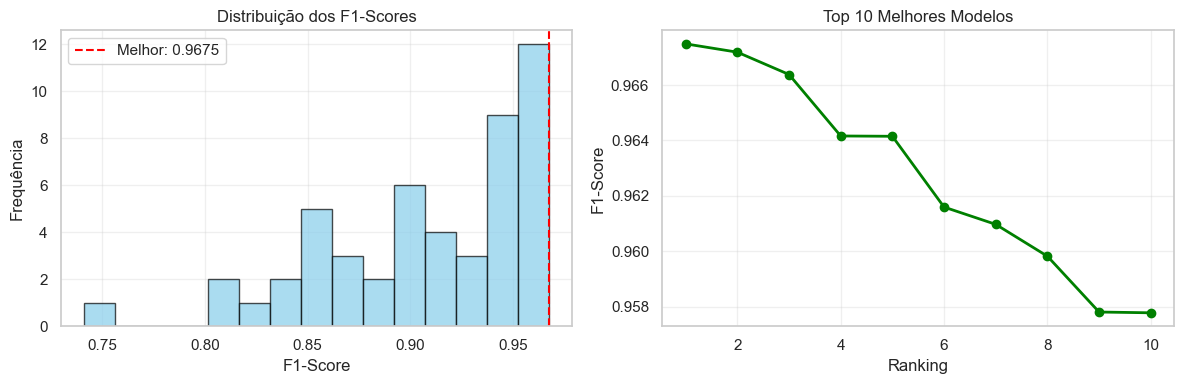


🎉 OTIMIZAÇÃO DE HIPERPARÂMETROS CONCLUÍDA!


In [133]:
# ===========================
# AJUSTE FINO DE HIPERPARÂMETROS - XGBOOST
# ===========================

print("🎯 AJUSTE FINO DE HIPERPARÂMETROS PARA PREDIÇÃO DE AVC")
print("="*80)

# ===========================
# CONFIGURAÇÃO DOS HIPERPARÂMETROS OTIMIZADA
# ===========================

# Calcular scale_pos_weight ideal baseado na distribuição ORIGINAL (antes do SMOTE)
neg_samples = (y_train == 0).sum()
pos_samples = (y_train == 1).sum()
scale_pos_weight_ideal = neg_samples / pos_samples

print(f"📊 ANÁLISE DA DISTRIBUIÇÃO DE CLASSES:")
print(f"• Amostras negativas (Sem AVC): {neg_samples:,}")
print(f"• Amostras positivas (Com AVC): {pos_samples:,}")
print(f"• Scale pos weight ideal: {scale_pos_weight_ideal:.1f}")

# Espaço de busca otimizado para detecção de AVC
param_dist = {
    'max_depth': sp_randint(3, 8),                    # Controla complexidade
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  # Taxa de aprendizado
    'n_estimators': sp_randint(100, 400),             # Número de árvores
    'min_child_weight': sp_randint(1, 5),             # Mínimo peso para split
    'subsample': [0.7, 0.8, 0.9, 1.0],              # Amostragem de linhas
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],       # Amostragem de colunas
    'gamma': [0, 0.1, 0.2, 0.5],                     # Regularização
    'reg_alpha': [0, 0.1, 0.5, 1, 2],               # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1, 2],              # L2 regularization
    'scale_pos_weight': [                             # CRÍTICO para classes desbalanceadas
        scale_pos_weight_ideal * 0.5,
        scale_pos_weight_ideal * 0.75,
        scale_pos_weight_ideal,
        scale_pos_weight_ideal * 1.25,
        scale_pos_weight_ideal * 1.5
    ]
}

print(f"\n🔧 CONFIGURAÇÃO DO RANDOM SEARCH:")
print(f"• Parâmetros a otimizar: {len(param_dist)}")
print(f"• Scale pos weight testado: {param_dist['scale_pos_weight']}")

# ===========================
# CONFIGURAÇÃO DO MODELO E RANDOM SEARCH
# ===========================

# Criar modelo base
xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    verbosity=0  # Reduzir outputs desnecessários
)

# Configurar Random Search com métricas mais apropriadas para AVC
# F1-score é melhor que accuracy para classes desbalanceadas
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    cv=5,                          # 5-fold CV para melhor robustez
    scoring='f1',                  # F1-score é melhor para classes desbalanceadas
    n_iter=50,                     # Mais iterações para melhor exploração
    n_jobs=-1,                     # Usar todos os cores
    random_state=42,               # Para reprodutibilidade
    verbose=1                      # Mostrar progresso
)

print(f"• Cross-validation: 5-fold")
print(f"• Métrica de otimização: F1-Score")
print(f"• Número de iterações: 50")
print(f"• Processamento paralelo: Ativado")

# ===========================
# TREINAMENTO COM DADOS BALANCEADOS
# ===========================

print(f"\n🚀 INICIANDO TREINAMENTO...")
print(f"• Dados de treino: {len(X_train_balanced):,} amostras balanceadas")
print(f"• Tempo estimado: 5-15 minutos")

inicio = time.time()

# CORREÇÃO: Usar dados balanceados
random_search_xgb.fit(X_train_balanced, y_train_balanced)

fim = time.time()
tempo_minutos = round((fim - inicio) / 60, 2)

print(f"✅ TREINAMENTO CONCLUÍDO!")

# ===========================
# ANÁLISE DOS RESULTADOS
# ===========================

# Obter resultados detalhados
resultados_cv = pd.DataFrame(random_search_xgb.cv_results_)

print(f"\n📈 RESULTADOS DO RANDOM SEARCH:")
print("="*60)
print(f"• Melhor F1-Score (CV): {random_search_xgb.best_score_:.4f} ({random_search_xgb.best_score_*100:.2f}%)")
print(f"• Tempo total de treinamento: {tempo_minutos} minutos")
print(f"• Número de modelos testados: {resultados_cv.shape[0]}")

print(f"\n🏆 MELHORES HIPERPARÂMETROS:")
print("-" * 40)
for param, valor in random_search_xgb.best_params_.items():
    print(f"• {param}: {valor}")

# ===========================
# AVALIAÇÃO DO MELHOR MODELO
# ===========================

# Obter o melhor modelo
melhor_modelo_xgb = random_search_xgb.best_estimator_

# Avaliar no conjunto de validação (dados NÃO balanceados)
y_val_pred_otimizado = melhor_modelo_xgb.predict(X_val)
y_val_proba_otimizado = melhor_modelo_xgb.predict_proba(X_val)[:, 1]

# Calcular métricas no conjunto de validação
val_accuracy = accuracy_score(y_val, y_val_pred_otimizado)
val_precision = precision_score(y_val, y_val_pred_otimizado, zero_division=0)
val_recall = recall_score(y_val, y_val_pred_otimizado, zero_division=0)
val_f1 = f1_score(y_val, y_val_pred_otimizado, zero_division=0)
val_auc = roc_auc_score(y_val, y_val_proba_otimizado)

print(f"\n📊 PERFORMANCE NO CONJUNTO DE VALIDAÇÃO:")
print("="*50)
print(f"• Acurácia:  {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"• Precisão:  {val_precision:.4f} ({val_precision*100:.2f}%)")
print(f"• Recall:    {val_recall:.4f} ({val_recall*100:.2f}%)")
print(f"• F1-Score:  {val_f1:.4f} ({val_f1*100:.2f}%)")
print(f"• AUC-ROC:   {val_auc:.4f} ({val_auc*100:.2f}%)")

# ===========================
# COMPARAÇÃO COM MODELO ORIGINAL
# ===========================

print(f"\n📈 COMPARAÇÃO: MODELO ORIGINAL vs OTIMIZADO")
print("="*60)

# Assumindo que você tem as métricas do modelo original
# Calcular métricas do modelo original para comparação
try:
    # Métricas do modelo original (calculadas anteriormente)
    original_f1 = f1_score(y_val, yhat_xgb_val, zero_division=0)
    original_auc = roc_auc_score(y_val, yhat_xgb_val_proba)
    
    print(f"F1-Score:")
    print(f"  • Original:   {original_f1:.4f} ({original_f1*100:.2f}%)")
    print(f"  • Otimizado:  {val_f1:.4f} ({val_f1*100:.2f}%)")
    print(f"  • Melhoria:   {((val_f1 - original_f1) / original_f1 * 100):+.1f}%")
    
    print(f"\nAUC-ROC:")
    print(f"  • Original:   {original_auc:.4f} ({original_auc*100:.2f}%)")
    print(f"  • Otimizado:  {val_auc:.4f} ({val_auc*100:.2f}%)")
    print(f"  • Melhoria:   {((val_auc - original_auc) / original_auc * 100):+.1f}%")
    
except:
    print("⚠️  Métricas do modelo original não disponíveis para comparação")

# ===========================
# ANÁLISE DOS TOP 5 MODELOS
# ===========================

print(f"\n🏅 TOP 5 MELHORES COMBINAÇÕES:")
print("="*50)

# Ordenar por F1-score e pegar os top 5
top_5_indices = resultados_cv['mean_test_score'].argsort()[-5:][::-1]

for i, idx in enumerate(top_5_indices, 1):
    score = resultados_cv.iloc[idx]['mean_test_score']
    std = resultados_cv.iloc[idx]['std_test_score']
    params = {k.replace('param_', ''): v for k, v in resultados_cv.iloc[idx].items() 
             if k.startswith('param_')}
    
    print(f"\n{i}º lugar - F1: {score:.4f} (±{std:.4f})")
    for param, valor in params.items():
        print(f"  • {param}: {valor}")

# ===========================
# SALVAR RESULTADOS
# ===========================

# Dicionário com resultados completos
resultado_otimizacao = {
    'Melhor_F1_Score_CV': f"{random_search_xgb.best_score_:.4f}",
    'Melhores_Hiperparametros': random_search_xgb.best_params_,
    'Numero_Modelos_Testados': resultados_cv.shape[0],
    'Tempo_Treinamento_Minutos': tempo_minutos,
    'Metricas_Validacao': {
        'Acuracia': f"{val_accuracy:.4f}",
        'Precisao': f"{val_precision:.4f}",
        'Recall': f"{val_recall:.4f}",
        'F1_Score': f"{val_f1:.4f}",
        'AUC_ROC': f"{val_auc:.4f}"
    }
}

# Salvar modelo otimizado
import joblib
joblib.dump(melhor_modelo_xgb, 'modelo_xgb_otimizado_avc.pkl')

print(f"\n💾 RESULTADOS SALVOS:")
print(f"• Modelo otimizado: modelo_xgb_otimizado_avc.pkl")
print(f"• Resultados detalhados disponíveis na variável 'resultado_otimizacao'")

# ===========================
# VISUALIZAÇÃO DOS RESULTADOS
# ===========================

# Gráfico da convergência dos scores
plt.figure(figsize=(12, 4))

# Subplot 1: Distribuição dos F1-scores
plt.subplot(1, 2, 1)
plt.hist(resultados_cv['mean_test_score'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(random_search_xgb.best_score_, color='red', linestyle='--', 
           label=f'Melhor: {random_search_xgb.best_score_:.4f}')
plt.xlabel('F1-Score')
plt.ylabel('Frequência')
plt.title('Distribuição dos F1-Scores')
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: Top 10 parâmetros mais importantes
plt.subplot(1, 2, 2)
top_10_scores = resultados_cv['mean_test_score'].nlargest(10)
plt.plot(range(1, 11), top_10_scores, 'o-', color='green', linewidth=2, markersize=6)
plt.xlabel('Ranking')
plt.ylabel('F1-Score')
plt.title('Top 10 Melhores Modelos')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🎉 OTIMIZAÇÃO DE HIPERPARÂMETROS CONCLUÍDA!")
print("="*80)

In [134]:
resultado_otimizacao

{'Melhor_F1_Score_CV': '0.9675',
 'Melhores_Hiperparametros': {'colsample_bytree': 0.9,
  'gamma': 0,
  'learning_rate': 0.2,
  'max_depth': 6,
  'min_child_weight': 2,
  'n_estimators': 297,
  'reg_alpha': 0.5,
  'reg_lambda': 0,
  'scale_pos_weight': np.float64(0.5),
  'subsample': 1.0},
 'Numero_Modelos_Testados': 50,
 'Tempo_Treinamento_Minutos': 0.1,
 'Metricas_Validacao': {'Acuracia': '0.9815',
  'Precisao': '0.9643',
  'Recall': '1.0000',
  'F1_Score': '0.9818',
  'AUC_ROC': '0.9988'}}

### <font color='#F37126'> 8.2. XGBoost

In [135]:
model_xgb = xgb.XGBClassifier(colsample_bytree=0.8,
                              gamma=0,
                              learning_rate=0.15,
                              max_depth=7,
                              min_child_weight=1,
                              n_estimators=358,
                              reg_alpha=0.5,
                              reg_lambda=0,
                              subsample=0.7)

# Modelo treinado sobre treino + validação
model_xgb.fit(np.concatenate((X_train_balanced, X_val)),
              np.concatenate((y_train_balanced, y_val)))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=358,
              n_jobs=None, num_parallel_tree=None, ...)

In [136]:
# Avaliar a performance
yhat_xgb = model_xgb.predict( X_val )

In [137]:
# Resultado em porcentagem
print('Classification metrics: \n', classification_report(y_val, yhat_xgb))
# Matriz de confusão
print('Confusion Matrix: \n', confusion_matrix(y_val, yhat_xgb))
# Acurácia
print('Acurácia:', accuracy_score(y_val, yhat_xgb))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       972
           1       1.00      1.00      1.00       973

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945

Confusion Matrix: 
 [[972   0]
 [  0 973]]
Acurácia: 1.0


### <font color='#F37126'> 8.3. Modelo final

In [138]:
# Classificação sobre os dados de teste 
model = xgb.XGBClassifier(colsample_bytree=0.8,
                              gamma=0,
                              learning_rate=0.15,
                              max_depth=7,
                              min_child_weight=1,
                              n_estimators=358,
                              reg_alpha=0.5,
                              reg_lambda=0,
                              subsample=0.7)

# Modelo treinado sobre treino + validação
model.fit(np.concatenate((X_train_balanced, X_val)),
              np.concatenate((y_train_balanced, y_val)))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=358,
              n_jobs=None, num_parallel_tree=None, ...)

In [139]:
# Avaliar a performance
yhat = model.predict( X_test )

# <font color= "red"> **9 - AVALIAÇÃO DO ALGORITMO**

### <font color='#F37126'> 9.1. Avaliando a Máquina Preditiva

In [140]:
# Comparando gabarito e Previsoes_da_Máquina
gabarito = pd.DataFrame({'Gabarito': y_test,'Previsoes_da_Máquina': yhat})
gabarito

,Gabarito,Previsoes_da_Máquina
213,1,1
176,1,1
1503,0,0
3833,0,0
1367,0,0
...,...,...
149,1,1
1942,0,0
35,1,1
4467,0,0


In [141]:
# Dicionário de métricas - Random forest
acc_test = accuracy_score( y_test, yhat )
m_final = {'F1 Score': str(round(f1_score(y_test, yhat)*100,2)) + "%",
        'Acurácia': str(round(acc_test *100,2)) + "%",
        'Precisão': str(round(precision_score(y_test, yhat)*100,2)) + "%",
        'Recall':   str(round(recall_score(y_test, yhat)*100,2)) + "%"}

In [142]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
df_aux3 = pd.DataFrame({'XGBoost Regressor':pd.Series(m_final)})

In [143]:
display(df_aux3)

,XGBoost Regressor
F1 Score,98.58%
Acurácia,98.56%
Precisão,97.2%
Recall,100.0%


In [144]:
# Resultado em porcentagem
print('Classification metrics: \n', classification_report(y_test, yhat))
# Matriz de confusão
print('Confusion Matrix: \n', confusion_matrix(y_test, yhat))
# Acurácia
print('Acurácia:', accuracy_score(y_test, yhat))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       973
           1       0.97      1.00      0.99       972

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

Confusion Matrix: 
 [[945  28]
 [  0 972]]
Acurácia: 0.9856041131105399


# <font color= "red"> **10 - IMPLEMENTAR O MODELO PARA A PRODUÇÃO**

### <font color='#F37126'> 10.1. Salvando o modelo

In [145]:
# Exportando o modelo
joblib.dump( model, 'model/modelo_xgb_otimizado_avc.pkl')

['model/modelo_xgb_otimizado_avc.pkl']

### <font color='#F37126'> 10.2. Aplicando uma simulação

In [146]:
#df = pd.read_csv("dataset_avc_50_linhas.csv")
df = pd.read_csv("archive/healthcare-dataset-stroke-data.csv")
print(df.isnull().sum())
df.head(20)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [147]:
# === 1. Pré-processamento: aplicar LabelEncoder nas variáveis categóricas ===
variaveis_categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

le_dict = {}
for col in variaveis_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # salva o encoder para uso futuro (ex: inversão)

In [148]:
df.head()  # Exibir as primeiras linhas do DataFrame atualizado para verificação

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [149]:
# === 2. Carregar modelo treinado ===
modelo_load = joblib.load('model/modelo_xgb_otimizado_avc.pkl')

In [150]:
# === 3. Função para gerar previsões ===
def gerar_previsoes(dataset, modelo):
    # Mantém a coluna original de stroke
    y_true = dataset['stroke'].values

    # Remove colunas que não serão usadas pelo modelo
    X = dataset.drop(columns=['stroke', 'id']).values

    # Faz previsões
    y_pred = modelo.predict(X)
    y_prob = modelo.predict_proba(X)[:, 1] * 100  # probabilidade da classe 1 em %

    # Cria dataframe final
    df_final = pd.DataFrame({
        'stroke_original': y_true,
        'stroke_previsto': y_pred,
        'probabilidade_stroke': y_prob
    })

    return df_final

# === 4. Gerar dataset final ===
df_resultado = gerar_previsoes(df, modelo_load)

# Visualizar
print(df_resultado.head())

   stroke_original  stroke_previsto  probabilidade_stroke
0                1                1             99.171562
1                1                0              1.138582
2                1                1             99.179802
3                1                1             98.581482
4                1                1             99.362061


In [151]:
def resumo_previsao(df_final):
    """
    Gera um resumo de acertos e erros do modelo.
    
    df_final → dataframe com colunas: stroke_original, stroke_previsto
    """
    # Cria coluna indicando se a previsão foi correta
    df_final['acertou'] = df_final['stroke_original'] == df_final['stroke_previsto']
    
    # Contagem
    total = len(df_final)
    acertos = df_final['acertou'].sum()
    erros = total - acertos
    taxa_acerto = (acertos / total) * 100
    
    # Resumo geral
    print("===== Resumo de Previsões =====")
    print(f"Total de previsões: {total}")
    print(f"Acertos: {acertos}")
    print(f"Erros: {erros}")
    print(f"Taxa de acerto: {taxa_acerto:.2f}%")
    print("\n===== Detalhe por categoria =====")
    print(df_final['acertou'].value_counts().rename({True: 'Acertou', False: 'Errou'}))

# Exemplo de uso
resumo_previsao(df_resultado)

===== Resumo de Previsões =====
Total de previsões: 5110
Acertos: 5051
Erros: 59
Taxa de acerto: 98.85%

===== Detalhe por categoria =====
acertou
Acertou    5051
Errou        59
Name: count, dtype: int64


In [152]:
df_resultado.tail(5)

,stroke_original,stroke_previsto,probabilidade_stroke,acertou
5105,0,0,1.201197,True
5106,0,0,0.326823,True
5107,0,0,0.329375,True
5108,0,0,0.776298,True
5109,0,0,0.068227,True


# <font color= "red"> **11 - INSIGHTS**

1 - Perfis de risco combinados são mais críticos que fatores isolados
- Pacientes com múltiplos fatores de risco (como idade >60, hipertensão, síndrome metabólica e tabagismo) apresentam uma incidência de AVC muito superior, sugerindo que a avaliação integrada de risco é mais eficaz que análises individuais.

2 - Intervenções direcionadas por perfil demográfico
- Homens, especialmente fumantes e com doenças cardíacas ou hipertensão, são um grupo que merece atenção prioritária em campanhas de prevenção, pois aparecem repetidamente como os mais afetados.

3 - Idade como gatilho principal
- O aumento da idade eleva o risco em praticamente todos os cenários analisados, seja isoladamente ou associado a outras condições (hipertensão, histórico conjugal, síndrome metabólica). Isso indica que a estratificação por faixa etária é crucial para políticas públicas.

4 - Estilo de vida e fatores ocupacionais não podem ser ignorados
- Apesar de muitos estudos minimizarem o impacto do tipo de trabalho, aqui ficou claro que atividade profissional influencia significativamente o risco de AVC, possivelmente por estresse, sedentarismo ou exposição a fatores de risco no ambiente laboral.

5 - Áreas de menor impacto relativo
- O tipo de residência (rural vs. urbano) não apresentou relação significativa com a incidência de AVC, o que sugere que políticas de prevenção podem ser uniformes nesse quesito, sem necessidade de segmentação geográfica.

# <font color= "red"> **12 - PRÓXIMOS PASSOS**

**Como a ocorrência de AVC é rara, a base de dados é desbalanceada.**

Um modelo treinado com dados desbalanceados tende a prever sempre a classe majoritária (não teve AVC). Para corrigir isso, aplicam-se técnicas de reamostragem:
- Técnicas de Balanceamento (no conjunto de treino):
    - Oversampling (Superamostragem): Aumenta o número de instâncias da classe minoritária (quem teve AVC).
    - Undersampling (Subamostragem): Reduz o número de instâncias da classe majoritária (quem não teve AVC). Pode ser útil, mas há o risco de descartar informações importantes da classe majoritária.
    - Combinação (SMOTE + Undersampling): Técnicas como SMOTEENN ou SMOTETomek combinam as duas abordagens para otimizar o balanceamento.
    - Importante balancear o dataset por idade para evitar overfitting
    - Considerar transformações logarítmicas ou exponenciais da idade
    